<a href="https://colab.research.google.com/github/count-im/test/blob/main/Motercycle_LaneNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 데이터 로드 및 데이터 파악

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sadhliroomyprime/motorcycle-night-ride-semantic-segmentation")

print("Path to dataset files:", path)

100%|██████████| 325M/325M [00:16<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sadhliroomyprime/motorcycle-night-ride-semantic-segmentation/versions/2


In [4]:
# 데이터 로드
import os
DATA_ROOT = path # 이전 셀에서 다운로드된 경로를 사용합니다.
print(os.listdir(DATA_ROOT))

# COCO JSON 구조 분석
import json, os, math
from collections import Counter, defaultdict

import numpy as np
import pandas as pd

# ann_path 수정: 'www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset' 하위 디렉토리 추가
ann_path = os.path.join(DATA_ROOT, "www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset", "COCO_motorcycle (pixel).json")

with open(ann_path, "r") as f:
    coco_data = json.load(f)

print("keys:", coco_data.keys())

['www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset', 'www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset.pdf']
keys: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [5]:
# ===============================
# COCO Dataset EDA (통합 셀)
# ===============================

import json
import pandas as pd

# ---- COCO JSON 로드 ----
with open(ann_path, "r", encoding="utf-8") as f:
    coco_data = json.load(f)

print("===== COCO STRUCTURE =====")
print("keys:", coco_data.keys())

# ---- 카테고리 매핑 ----
cat_id_to_name = {c["id"]: c["name"] for c in coco_data["categories"]}
cat_name_to_id = {c["name"]: c["id"] for c in coco_data["categories"]}


# ==========================================================
# 1) INFO
# ==========================================================
print("\n===== DATASET INFO =====")

info = coco_data.get("info", {})
display(pd.DataFrame([info]))


# ==========================================================
# 2) LICENSES
# ==========================================================
print("\n===== LICENSES =====")

licenses = coco_data.get("licenses", [])
print("num_licenses:", len(licenses))
display(pd.DataFrame(licenses))


# ==========================================================
# 3) IMAGES 분석
# ==========================================================
print("\n===== IMAGES ANALYSIS =====")

images = coco_data["images"]
print("num_images:", len(images))

img_df = pd.DataFrame(images)

print("image columns:", img_df.columns.tolist())
display(img_df.head(3))

# ---- 해상도 통계 ----
if "width" in img_df.columns and "height" in img_df.columns:

    print("\n[Resolution stats]")
    print("width  min/mean/median/max:",
          int(img_df["width"].min()),
          round(img_df["width"].mean(), 2),
          img_df["width"].median(),
          int(img_df["width"].max()))

    print("height min/mean/median/max:",
          int(img_df["height"].min()),
          round(img_df["height"].mean(), 2),
          img_df["height"].median(),
          int(img_df["height"].max()))

    res_counts = (
        img_df.groupby(["width", "height"])
        .size()
        .sort_values(ascending=False)
        .head(5)
    )

    print("\nTop resolutions:")
    display(res_counts)


# ---- 파일명 패턴 ----
if "file_name" in img_df.columns:

    print("\n[file_name examples]")
    display(img_df["file_name"].head(10))

    has_subdir = img_df["file_name"].str.contains("/").mean()
    print(f"file_name에 하위 폴더 포함 비율: {has_subdir*100:.1f}%")


# ==========================================================
# 4) CATEGORIES 분석
# ==========================================================
print("\n===== CATEGORY ANALYSIS =====")

cat_df = pd.DataFrame(coco_data["categories"]).sort_values("id")
display(cat_df)

print("\n[Category list]")
for c in coco_data["categories"]:
    print(f"{c['id']} : {c['name']}")

===== COCO STRUCTURE =====
keys: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

===== DATASET INFO =====


description                       url version  year       contributor  \
0  This is dataset.  https://superannotate.ai     1.0  2022  Superannotate AI   

  date_created  
0   15/09/2022


===== LICENSES =====
num_licenses: 1


url  id              name
0  https://superannotate.ai   1  Superannotate AI


===== IMAGES ANALYSIS =====
num_images: 200
image columns: ['id', 'file_name', 'height', 'width', 'license']


id            file_name  height  width  license
0   1   night ride (8).png    1080   1920        1
1   2  night ride (14).png    1080   1920        1
2   3  night ride (11).png    1080   1920        1


[Resolution stats]
width  min/mean/median/max: 1920 1920.0 1920.0 1920
height min/mean/median/max: 1080 1080.0 1080.0 1080

Top resolutions:


width  height
1920   1080      200
dtype: int64


[file_name examples]


0     night ride (8).png
1    night ride (14).png
2    night ride (11).png
3    night ride (24).png
4    night ride (23).png
5    night ride (10).png
6     night ride (9).png
7    night ride (20).png
8    night ride (12).png
9    night ride (17).png
Name: file_name, dtype: object

file_name에 하위 폴더 포함 비율: 0.0%

===== CATEGORY ANALYSIS =====


id        name supercategory  isthing          color
5  1323880  Undrivable    Undrivable        1  [104, 51, 20]
4  1323881        Road          Road        1  [105, 51, 20]
3  1323882   Lane Mark     Lane Mark        1  [106, 51, 20]
2  1323884    Moveable      Moveable        1  [108, 51, 20]
1  1323885     My bike       My bike        1  [109, 51, 20]
0  1329681       Rider         Rider        1   [17, 74, 20]


[Category list]
1329681 : Rider
1323885 : My bike
1323884 : Moveable
1323882 : Lane Mark
1323881 : Road
1323880 : Undrivable


In [7]:
# ===============================
# 5) ANNOTATIONS EDA
# ===============================

import numpy as np
import pandas as pd

annotations = coco_data["annotations"]
print("\n===== ANNOTATIONS ANALYSIS =====")
print("num_annotations:", len(annotations))

ann_df = pd.DataFrame(annotations)
print("annotation columns:", ann_df.columns.tolist())
display(ann_df.head(3))


# ==========================================================
# 5-2) 클래스별 annotation 개수 (category_id 기준)
# ==========================================================
print("\n===== PER-CLASS ANNOTATION COUNT =====")

cat_counts = ann_df["category_id"].value_counts()

summary_df = pd.DataFrame({
    "category_id": cat_counts.index.astype(int),
    "category_name": [cat_id_to_name.get(int(cid), "UNKNOWN") for cid in cat_counts.index],
    "ann_count": cat_counts.values.astype(int),
    "ann_ratio(%)": (cat_counts.values / len(ann_df) * 100)
})

display(summary_df)


# ==========================================================
# 5-3) 이미지당 annotation 개수 분포
# ==========================================================
print("\n===== ANNOTATIONS PER IMAGE =====")

ann_per_img = ann_df.groupby("image_id").size()
print("images with annotations:", ann_per_img.shape[0], "/", len(images))
print("anns per image: min/mean/median/max =",
      int(ann_per_img.min()),
      round(float(ann_per_img.mean()), 3),
      float(ann_per_img.median()),
      int(ann_per_img.max()))

display(ann_per_img.describe())


# ==========================================================
# 5-4) area / bbox 통계
# ==========================================================
print("\n===== AREA / BBOX STATS =====")

# ---- area ----
if "area" in ann_df.columns:
    print("\n[Area stats]")
    print("area min/mean/median/max =",
          float(ann_df["area"].min()),
          round(float(ann_df["area"].mean()), 3),
          float(ann_df["area"].median()),
          float(ann_df["area"].max()))

    area_by_cat = (
        ann_df.groupby("category_id")["area"]
        .agg(["count","mean","median","min","max"])
        .reset_index()
    )
    area_by_cat["category_name"] = area_by_cat["category_id"].map(cat_id_to_name)
    area_by_cat = area_by_cat.sort_values("mean")

    print("\n[Area stats by category (sorted by mean)]")
    display(area_by_cat)

else:
    print("⚠️ 'area' column not found in annotations.")


# ---- bbox ----
if "bbox" in ann_df.columns:
    # bbox = [x, y, w, h]
    wh = np.array([
        b[2:4] for b in ann_df["bbox"].values
        if isinstance(b, list) and len(b) >= 4
    ])

    if len(wh) > 0:
        w = wh[:, 0]
        h = wh[:, 1]

        print("\n[BBox width/height stats]")
        print("w min/mean/median/max:",
              float(w.min()), round(float(w.mean()), 3), float(np.median(w)), float(w.max()))
        print("h min/mean/median/max:",
              float(h.min()), round(float(h.mean()), 3), float(np.median(h)), float(h.max()))

        bbox_df = pd.DataFrame({
            "w": w,
            "h": h,
            "bbox_area(w*h)": w*h
        })
        display(bbox_df.describe())

    else:
        print("⚠️ bbox는 존재하지만, 파싱 가능한 bbox 리스트가 없습니다.")
else:
    print("⚠️ 'bbox' column not found in annotations.")


===== ANNOTATIONS ANALYSIS =====
num_annotations: 2305
annotation columns: ['id', 'image_id', 'segmentation', 'iscrowd', 'bbox', 'area', 'category_id']


id  image_id                                       segmentation  iscrowd  \
0   1         1  [[0, 0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0, 6, 0,...        0   
1   2         1  [[1383, 932, 1382, 933, 1381, 934, 1380, 934, ...        0   
2   3         1  [[884, 524, 883, 525, 882, 525, 881, 525, 880,...        0   

                          bbox    area  category_id  
0    [0.0, 0.0, 1920.0, 551.0]  586530      1323880  
1  [0.0, 243.0, 1920.0, 837.0]  819509      1323881  
2  [0.0, 280.0, 1659.0, 277.0]   17414      1323882


===== PER-CLASS ANNOTATION COUNT =====


category_id category_name  ann_count  ann_ratio(%)
0      1323884      Moveable       1298     56.312364
1      1323882     Lane Mark        207      8.980477
2      1323881          Road        200      8.676790
3      1323880    Undrivable        200      8.676790
4      1323885       My bike        200      8.676790
5      1329681         Rider        200      8.676790


===== ANNOTATIONS PER IMAGE =====
images with annotations: 200 / 200
anns per image: min/mean/median/max = 5 11.525 11.0 26


count    200.000000
mean      11.525000
std        4.504534
min        5.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       26.000000
dtype: float64


===== AREA / BBOX STATS =====

[Area stats]
area min/mean/median/max = 5.0 179919.144 14907.0 1515454.0

[Area stats by category (sorted by mean)]


category_id  count           mean    median     min      max category_name
3      1323884   1298   15041.065485    1692.0       5   424086      Moveable
2      1323882    207   28824.676329   22196.0     103   170137     Lane Mark
5      1329681    200  167151.545000  181064.5   40709   269838         Rider
4      1323885    200  327562.445000  319764.0  108350   711443       My bike
1      1323881    200  562131.875000  593954.0  146843  1035064          Road
0      1323880    200  889272.210000  893769.5  351188  1515454    Undrivable


[BBox width/height stats]
w min/mean/median/max: 1.0 792.071 259.0 1920.0
h min/mean/median/max: 2.0 293.641 162.0 1080.0


w            h  bbox_area(w*h)
count  2305.000000  2305.000000    2.305000e+03
mean    792.070716   293.640781    4.353286e+05
std     817.403358   286.571006    5.629247e+05
min       1.000000     2.000000    5.000000e+00
25%      47.000000    42.000000    1.960000e+03
50%     259.000000   162.000000    4.006800e+04
75%    1920.000000   533.000000    8.198400e+05
max    1920.000000  1080.000000    2.073600e+06

In [8]:
!pip install opencv-python
!pip install pycocotools-windows
!pip install segmentation-models-pytorch
!pip install wandb
!pip install tqdm
!pip install pycocotools

ERROR: Could not find a version that satisfies the requirement pycocotools-windows (from versions: none)
ERROR: No matching distribution found for pycocotools-windows
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 17.0 MB/s eta 0:00:00


===== FILE MATCH CHECK ====
missing files: 0

===== BASIC COUNTS ====
이미지 수: 200
annotation 수: 2305

===== SAMPLE VISUALIZATION ====
loading annotations into memory...
Done (t=2.41s)
creating index...
index created!


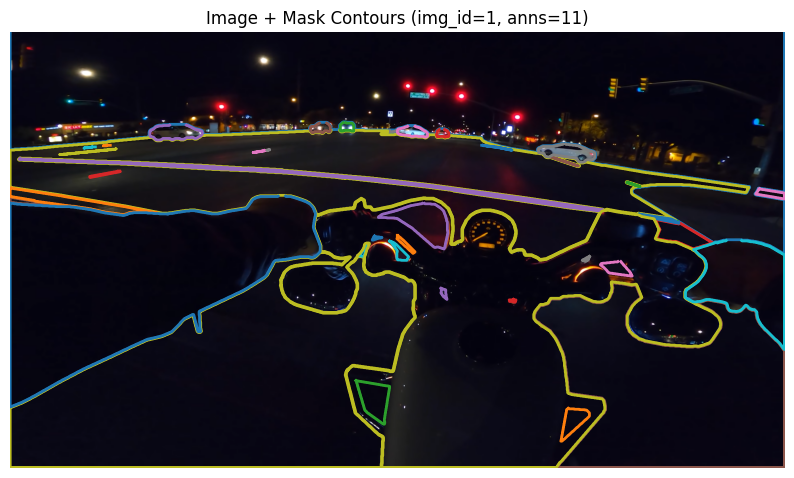

In [10]:
# ===============================
# 6) 파일 매칭 체크 + 샘플 시각화 (통합 셀)
# ===============================

import os, json
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ---- 1) images 폴더와 JSON 매칭 체크 ----
# img_dir 경로 수정: 'www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset' 하위 디렉토리 추가
img_dir = os.path.join(DATA_ROOT, "www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset", "images")

missing = []
for im in images:
    fp = os.path.join(img_dir, im["file_name"])
    if not os.path.exists(fp):
        missing.append(im["file_name"])

print("===== FILE MATCH CHECK ====")
print("missing files:", len(missing))
if len(missing) > 0:
    print("ex) missing sample:", missing[:5])

# ---- 2) 이미지/annotation 수 ----
print("\n===== BASIC COUNTS ====")
print("이미지 수:", len(coco_data["images"]))
print("annotation 수:", len(coco_data["annotations"]))

# ---- 3) 샘플 이미지 + 마스크 윤곽선 시각화 ----
print("\n===== SAMPLE VISUALIZATION ====")

# OpenCV / pycocotools import (없으면 설치 필요)
import cv2
from pycocotools.coco import COCO

coco = COCO(ann_path)

# 첫 샘플 선택
img_id = coco.getImgIds()[0]
img_info = coco.loadImgs(img_id)[0]
img_path = os.path.join(img_dir, img_info["file_name"])

# 이미지 읽기
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"cv2.imread failed: {img_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# annotation 가져오기
ann_ids = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(ann_ids)

plt.figure(figsize=(10, 8))
plt.imshow(image)
ax = plt.gca()

# 윤곽선 그리기
for ann in anns:
    mask = coco.annToMask(ann).astype(np.uint8)  # (H,W) 0/1

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        cnt = cnt.squeeze()
        if cnt.ndim == 2 and len(cnt) >= 3:
            ax.plot(cnt[:, 0], cnt[:, 1], linewidth=2)

plt.title(f"Image + Mask Contours (img_id={img_id}, anns={len(anns)})")
plt.axis("off")
plt.show()


===== CLASS DISTRIBUTION (Annotation 기준) =====


category_id category_name  annotation_count  ratio(%)
0      1323884      Moveable              1298     56.31
1      1323882     Lane Mark               207      8.98
2      1323881          Road               200      8.68
3      1323880    Undrivable               200      8.68
4      1323885       My bike               200      8.68
5      1329681         Rider               200      8.68

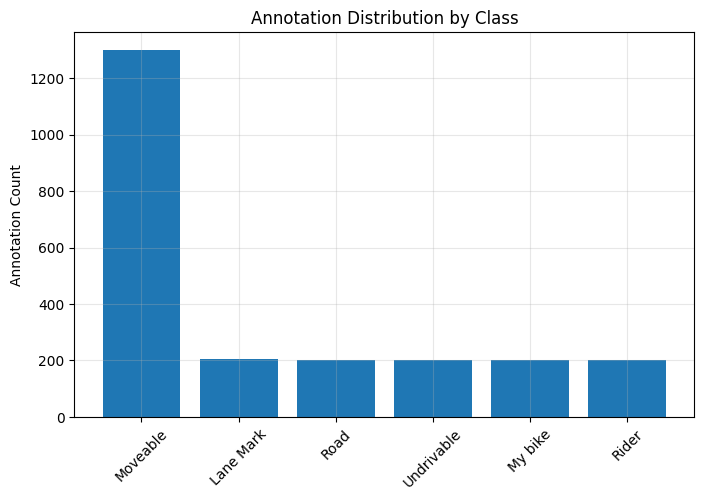

In [11]:
# ===============================
# CLASS DISTRIBUTION + NIGHT BRIGHTNESS ANALYSIS
# ===============================

from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


# ==========================================================
# 1) 클래스 분포 분석 (annotation 기준)
# ==========================================================
print("\n===== CLASS DISTRIBUTION (Annotation 기준) =====")

cls_counter = Counter(ann["category_id"] for ann in coco_data["annotations"])
total = sum(cls_counter.values())

df_cls = (
    pd.DataFrame([
        {
            "category_id": cid,
            "category_name": cat_id_to_name.get(cid, "UNKNOWN"),
            "annotation_count": int(cnt),
            "ratio(%)": round(cnt / total * 100, 2),
        }
        for cid, cnt in cls_counter.items()
    ])
    .sort_values("annotation_count", ascending=False)
    .reset_index(drop=True)
)

display(df_cls)


# ---- 클래스 분포 시각화 ----
plt.figure(figsize=(8,5))
plt.bar(df_cls["category_name"], df_cls["annotation_count"])
plt.title("Annotation Distribution by Class")
plt.ylabel("Annotation Count")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()



===== NIGHT BRIGHTNESS ANALYSIS ====
이미지 수 (Number of Images): 200  (읽기 실패: 0)
평균 픽셀 밝기 (Mean Pixel Intensity): 45.66
중앙값 픽셀 밝기 (Median Pixel Intensity): 33.61
픽셀 밝기 표준편차 (Pixel Intensity Std): 26.01
최소 픽셀 밝기 (Min Pixel Intensity): 10.35
최대 픽셀 밝기 (Max Pixel Intensity): 120.78


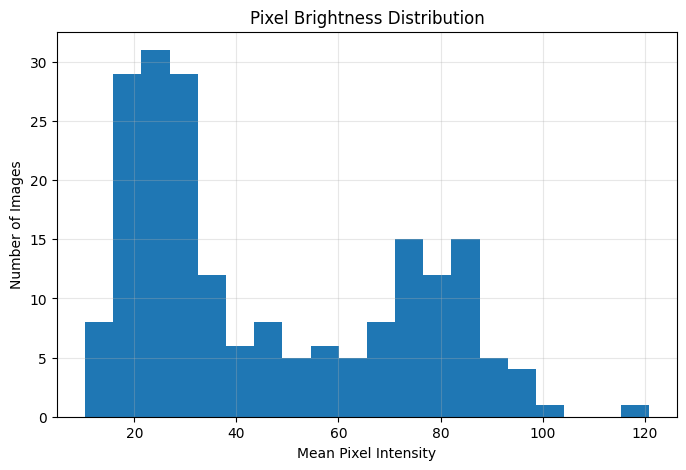

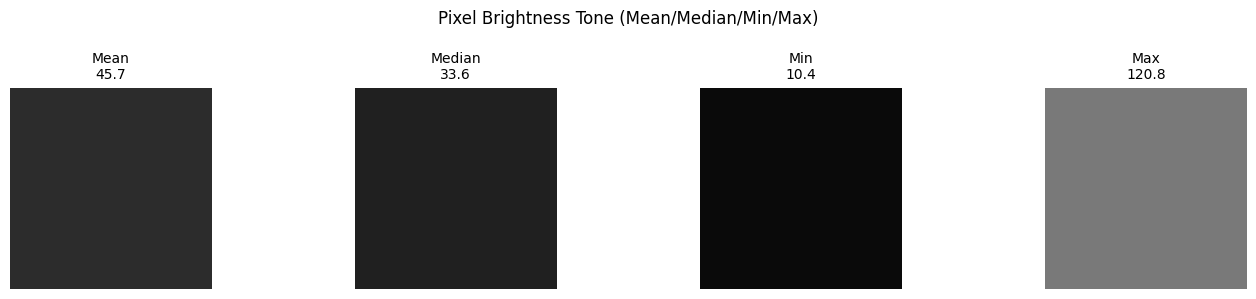

In [14]:

# ----------------------------------------------------------
# 2) 야간 밝기 특성 분석 (Mean Pixel Intensity per Image)
# ----------------------------------------------------------
print("\n===== NIGHT BRIGHTNESS ANALYSIS ====")

brightness = []
bad_files = 0

# 이미지 경로 수정: 'www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset' 하위 디렉토리 추가
img_sub_dir = os.path.join(DATA_ROOT, "www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset", "images")

for img in coco_data["images"]:
    img_path = os.path.join(img_sub_dir, img["file_name"])
    im = cv2.imread(img_path)
    if im is None:
        bad_files += 1
        continue
    brightness.append(im.mean())

brightness_np = np.array(brightness)

print(f"이미지 수 (Number of Images): {len(brightness_np)}  (읽기 실패: {bad_files})")
print(f"평균 픽셀 밝기 (Mean Pixel Intensity): {brightness_np.mean():.2f}")
print(f"중앙값 픽셀 밝기 (Median Pixel Intensity): {np.median(brightness_np):.2f}")
print(f"픽셀 밝기 표준편차 (Pixel Intensity Std): {brightness_np.std():.2f}")
print(f"최소 픽셀 밝기 (Min Pixel Intensity): {brightness_np.min():.2f}")
print(f"최대 픽셀 밝기 (Max Pixel Intensity): {brightness_np.max():.2f}")

plt.figure(figsize=(8, 5))
plt.hist(brightness_np, bins=20)
plt.title("Pixel Brightness Distribution")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Number of Images")
plt.grid(alpha=0.3)
plt.show()


# ----------------------------------------------------------
# 3) 밝기 통계(Mean/Median/Min/Max)를 회색 Tone으로 표시
#    (Std는 톤으로 표현해도 직관성이 떨어져서 제외)
# ----------------------------------------------------------
values = [
    brightness_np.mean(),
    np.median(brightness_np),
    brightness_np.min(),
    brightness_np.max()
]
labels = ["Mean", "Median", "Min", "Max"]

plt.figure(figsize=(14, 3))  # 톤 이미지를 좀 더 크게
for i, val in enumerate(values):
    gray = float(val) / 255.0  # 0~1 정규화
    ax = plt.subplot(1, len(values), i + 1)
    ax.imshow([[gray]], cmap="gray", vmin=0, vmax=1)
    ax.set_title(f"{labels[i]}\n{val:.1f}", fontsize=10)
    ax.axis("off")

plt.suptitle("Pixel Brightness Tone (Mean/Median/Min/Max)", fontsize=12)
plt.tight_layout()
plt.show()

## 2. Baseline 선택 (DeepLabV3+ vs U-Net)
### 기준: 동일한 backbone(ResNet 50)을 기준으로 성능이 좋은 모델 선택

### 2.1.1. DeepLab V3

In [28]:
pip install wandb

In [31]:
import wandb
wandb.login(key="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")

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: [wandb.login()] Using explicit session credentials for https://api.wandb.ai.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: brad114 (brad114-count-ai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [33]:
import os, random
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset

class COCOSemSeg(Dataset):
    """
    COCO instance/pixel annotations -> semantic mask (H,W) with train ids.
    공정 비교(DeepLabV3+ vs U-Net, backbone=ResNet50)를 위해:
      - 동일한 resize
      - 동일한 normalize(외부 주입 가능)
      - train에만 augmentation
    """
    def __init__(
        self,
        coco,                 # COCO object
        img_dir: str,
        img_ids,
        id2train: dict,
        size=(512, 512),
        train=True,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        hflip_p=0.5,
        priority_order=None,   # 예: [Undrivable, Moveable, ...] 처럼 "위험 우선" 덮어쓰기 순서 지정 가능
    ):
        self.coco = coco
        self.img_dir = img_dir
        self.img_ids = list(img_ids)
        self.id2train = id2train
        self.size = size
        self.train = train
        self.hflip_p = hflip_p

        self.to_tensor = transforms.ToTensor()
        self.normalize = transforms.Normalize(mean=list(mean), std=list(std))

        # priority_order가 들어오면 category_id 기준으로 덮어쓰기 우선순위를 정함
        # (기본 None이면 기존처럼 COCO anns 순서대로 덮어쓰기)
        self.priority_order = priority_order
        if self.priority_order is not None:
            # priority_order는 category_id 리스트라고 가정
            self._prio_rank = {cid: i for i, cid in enumerate(self.priority_order)}

    def __len__(self):
        return len(self.img_ids)

    def _build_mask(self, img_id, H, W):
        mask = np.zeros((H, W), dtype=np.uint8)

        ann_ids = self.coco.getAnnIds(imgIds=[img_id])
        anns = self.coco.loadAnns(ann_ids)

        # (옵션) 위험 우선순위 덮어쓰기: priority_order 앞쪽/뒤쪽 중 무엇이 우선인지 실험 가능
        if self.priority_order is not None:
            # rank가 작은 것부터 먼저 칠하고, rank 큰 것이 마지막에 덮어쓰도록(=우선)
            anns = sorted(
                anns,
                key=lambda a: self._prio_rank.get(a["category_id"], -1)
            )

        for ann in anns:
            cid = ann["category_id"]
            if cid not in self.id2train:
                continue
            m = self.coco.annToMask(ann).astype(bool)
            mask[m] = self.id2train[cid]

        return mask

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]
        fp = os.path.join(self.img_dir, img_info["file_name"])

        img = Image.open(fp).convert("RGB")
        W, H = img.size

        mask = self._build_mask(img_id, H, W)
        mask = Image.fromarray(mask)

        # ---- 공정 비교를 위한 동일 resize ----
        img = TF.resize(img, self.size, interpolation=Image.BILINEAR)
        mask = TF.resize(mask, self.size, interpolation=Image.NEAREST)

        # ---- train에만 augmentation ----
        if self.train and random.random() < self.hflip_p:
            img = TF.hflip(img)
            mask = TF.hflip(mask)

        img = self.normalize(self.to_tensor(img))
        mask = torch.from_numpy(np.array(mask)).long()

        return img, mask

In [34]:
# ======================
# COCO 이미지 ID 무작위 분할 + SemSeg Dataset/DataLoader
# ======================

import os
import random
import numpy as np
import torch
from torch.utils.data import DataLoader

# ======================
# 재현성 설정
# ======================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

g = torch.Generator()
g.manual_seed(SEED)

def seed_worker(worker_id):
    worker_seed = SEED + worker_id
    np.random.seed(worker_seed)
    random.seed(worker_seed)

# ======================
# 이미지 폴더 경로
# ======================
IMG_DIR = os.path.join(DATA_ROOT, "www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset", "images")

# ======================
# category_id → 학습용 class index 매핑 (background=0, classes=1..K)
# ======================
categories = sorted(coco.loadCats(coco.getCatIds()), key=lambda x: x["id"])
id2train = {cat["id"]: i + 1 for i, cat in enumerate(categories)}
NUM_CLASSES = len(categories) + 1  # background 포함

# (옵션) 학습 class index -> name (IoU 출력용)
train2name = {0: "background"}
for cat in categories:
    train2name[id2train[cat["id"]]] = cat["name"]

# ======================
# 이미지 ID 분할 (중요: rng.shuffle로 재현성 고정)
# ======================
all_img_ids = sorted(coco.getImgIds())
rng = random.Random(SEED)
rng.shuffle(all_img_ids)  # ✅ 전역 random.shuffle 대신 rng.shuffle 사용

n = len(all_img_ids)
n_train = int(n * 0.8)
n_val   = int(n * 0.1)

train_ids = all_img_ids[:n_train]
val_ids   = all_img_ids[n_train:n_train + n_val]
test_ids  = all_img_ids[n_train + n_val:]

# ======================
# Dataset 생성
# ======================
train_ds = COCOSemSeg(coco, IMG_DIR, train_ids, id2train, size=(512, 512), train=True)
val_ds   = COCOSemSeg(coco, IMG_DIR, val_ids,   id2train, size=(512, 512), train=False)

# ======================
# DataLoader 생성
# ======================
NUM_WORKERS = 2

# Windows/Jupyter 안정성: persistent_workers 조건부
persistent_ok = (NUM_WORKERS > 0 and os.name != "nt")

train_loader = DataLoader(
    train_ds,
    batch_size=4,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=torch.cuda.is_available(),
    worker_init_fn=seed_worker,
    generator=g,
    persistent_workers=persistent_ok
)

val_loader = DataLoader(
    val_ds,
    batch_size=4,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=torch.cuda.is_available(),
    worker_init_fn=seed_worker,
    generator=g,
    persistent_workers=persistent_ok
)

print("train/val/test:", len(train_ids), len(val_ids), len(test_ids))
print("NUM_CLASSES:", NUM_CLASSES)
print("classes:", [train2name[i] for i in range(1, NUM_CLASSES)])

train/val/test: 160 20 20
NUM_CLASSES: 7
classes: ['Undrivable', 'Road', 'Lane Mark', 'Moveable', 'My bike', 'Rider']


### DeepLab V3 모델 결정

In [35]:
# =========================================
# 0) train index -> class name (공통)
# =========================================
train2name = {0: "background"}
for cat in categories:
    train_idx = id2train[cat["id"]]
    train2name[train_idx] = cat["name"]


# =========================================
# 1) 공통 유틸: 모델 출력(logits) 통일
#    - torchvision DeepLabV3: dict["out"]
#    - smp(Unet/DeepLabV3Plus): tensor
# =========================================
def _get_logits(model_out):
    if isinstance(model_out, dict):
        return model_out["out"]
    return model_out


# =========================================
# 2) 모델 생성 함수 (교체 가능 구조)
#    mode="deeplabv3_torchvision" (현재)
#    mode="unet_smp" / "deeplabv3plus_smp" (나중)
# =========================================
import torch
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_resnet50

def build_model(mode: str, num_classes: int, device: str,
                encoder_name: str = "resnet50", encoder_weights: str = "imagenet"):
    """
    mode:
      - "deeplabv3_torchvision": (ResNet50 backbone만 현실적으로 사용)
      - "unet_smp": EfficientNet/ResNet 등 encoder 자유
      - "deeplabv3plus_smp": EfficientNet/ResNet 등 encoder 자유

    encoder_name/encoder_weights는 smp 계열에서만 사용됨.
    """
    if mode == "deeplabv3_torchvision":
        # torchvision DeepLabV3: backbone=ResNet50 고정(공식 제공)
        model = deeplabv3_resnet50(weights=None, weights_backbone="DEFAULT")
        model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)
        return model.to(device)

    elif mode in ["unet_smp", "deeplabv3plus_smp"]:
        import segmentation_models_pytorch as smp

        if mode == "unet_smp":
            model = smp.Unet(
                encoder_name=encoder_name,        # 예: "efficientnet-b0", "resnet50"
                encoder_weights=encoder_weights,  # "imagenet" or None
                in_channels=3,
                classes=num_classes,
                activation=None
            )
        else:
            model = smp.DeepLabV3Plus(
                encoder_name=encoder_name,
                encoder_weights=encoder_weights,
                in_channels=3,
                classes=num_classes,
                activation=None
            )
        return model.to(device)

    else:
        raise ValueError(f"Unknown mode: {mode}")


# =========================================
# 3) Optim/Loss 생성 함수 (공통)
#    - 어떤 모델로 바꿔도 동일하게 사용
# =========================================
def build_optim_and_loss(model, lr=3e-4, wd=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    return criterion, optimizer


# =========================================
# 4) 지금은 DeepLabV3(ResNet50)로 시작
# =========================================
torch.backends.cudnn.benchmark = True
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

MODEL_MODE = "deeplabv3_torchvision"  # ✅ 현재 baseline
model = build_model(MODEL_MODE, NUM_CLASSES, device=device)

criterion, optimizer = build_optim_and_loss(model, lr=3e-4, wd=1e-4)

print(f"model ready: {MODEL_MODE}")

device: cuda
model ready: deeplabv3_torchvision


In [36]:
# =========================================
# 0) train index -> class name (공통)
# =========================================
train2name = {0: "background"}
for cat in categories:
    train_idx = id2train[cat["id"]]
    train2name[train_idx] = cat["name"]


# =========================================
# 1) 공통 유틸: 모델 출력(logits) 통일
#    - torchvision DeepLabV3: dict["out"]
#    - smp(Unet/DeepLabV3Plus): tensor
# =========================================
def _get_logits(model_out):
    if isinstance(model_out, dict):
        return model_out["out"]
    return model_out


# =========================================
# 2) 모델 생성 함수 (교체 가능 구조)
#    mode="deeplabv3_torchvision" (현재)
#    mode="unet_smp" / "deeplabv3plus_smp" (나중)
# =========================================
import torch
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_resnet50

def build_model(mode: str, num_classes: int, device: str,
                encoder_name: str = "resnet50", encoder_weights: str = "imagenet"):
    """
    mode:
      - "deeplabv3_torchvision": (ResNet50 backbone만 현실적으로 사용)
      - "unet_smp": EfficientNet/ResNet 등 encoder 자유
      - "deeplabv3plus_smp": EfficientNet/ResNet 등 encoder 자유

    encoder_name/encoder_weights는 smp 계열에서만 사용됨.
    """
    if mode == "deeplabv3_torchvision":
        # torchvision DeepLabV3: backbone=ResNet50 고정(공식 제공)
        model = deeplabv3_resnet50(weights=None, weights_backbone="DEFAULT")
        model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)
        return model.to(device)

    elif mode in ["unet_smp", "deeplabv3plus_smp"]:
        import segmentation_models_pytorch as smp

        if mode == "unet_smp":
            model = smp.Unet(
                encoder_name=encoder_name,        # 예: "efficientnet-b0", "resnet50"
                encoder_weights=encoder_weights,  # "imagenet" or None
                in_channels=3,
                classes=num_classes,
                activation=None
            )
        else:
            model = smp.DeepLabV3Plus(
                encoder_name=encoder_name,
                encoder_weights=encoder_weights,
                in_channels=3,
                classes=num_classes,
                activation=None
            )
        return model.to(device)

    else:
        raise ValueError(f"Unknown mode: {mode}")


# =========================================
# 3) Optim/Loss 생성 함수 (공통)
#    - 어떤 모델로 바꿔도 동일하게 사용
# =========================================
def build_optim_and_loss(model, lr=3e-4, wd=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    return criterion, optimizer


# =========================================
# 4) 지금은 DeepLabV3(ResNet50)로 시작
# =========================================
torch.backends.cudnn.benchmark = True
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

MODEL_MODE = "deeplabv3_torchvision"  # ✅ 현재 baseline
model = build_model(MODEL_MODE, NUM_CLASSES, device=device)

criterion, optimizer = build_optim_and_loss(model, lr=3e-4, wd=1e-4)

print(f"model ready: {MODEL_MODE}")

device: cuda
model ready: deeplabv3_torchvision


In [37]:
import numpy as np
import torch

def _get_logits(model_out):
    """DeepLabV3(torchvision): dict['out'], U-Net(smp): tensor"""
    if isinstance(model_out, dict):
        return model_out["out"]
    return model_out

def _confusion_from_pred(pred: torch.Tensor, target: torch.Tensor, num_classes: int, ignore_index=None):
    """
    pred/target: (N,H,W) on CPU or GPU 상관없음 (여기선 CPU로 누적 추천)
    return: (C,C) confusion matrix (long)
    """
    pred = pred.view(-1).to(torch.int64)
    target = target.view(-1).to(torch.int64)

    if ignore_index is not None:
        valid = (target != ignore_index)
        pred = pred[valid]
        target = target[valid]

    k = (target >= 0) & (target < num_classes)
    inds = num_classes * target[k] + pred[k]
    conf = torch.bincount(inds, minlength=num_classes**2).reshape(num_classes, num_classes)
    return conf

def _iou_from_confusion(conf: torch.Tensor, exclude_background=True):
    """
    conf: (C,C) long
    return: miou(float), per_class_iou(np.ndarray shape (C,))
    """
    conf = conf.float()
    tp = conf.diag()
    fp = conf.sum(0) - tp
    fn = conf.sum(1) - tp
    denom = tp + fp + fn
    iou = tp / torch.clamp(denom, min=1.0)  # (C,)
    iou = iou.cpu().numpy()

    start = 1 if exclude_background else 0
    miou = float(np.nanmean(iou[start:]))
    return miou, iou


def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0

    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        logits = _get_logits(model(imgs))          # ✅ DeepLab/UNet 공용
        loss = criterion(logits, masks)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * imgs.size(0)

    return total_loss / len(loader.dataset)


@torch.no_grad()
def validate(model, loader, criterion, device, num_classes,
             exclude_background=True, ignore_index=None):
    model.eval()
    total_loss = 0.0
    conf = torch.zeros((num_classes, num_classes), dtype=torch.long)

    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        logits = _get_logits(model(imgs))          # ✅ DeepLab/UNet 공용
        loss = criterion(logits, masks)
        total_loss += loss.item() * imgs.size(0)

        pred = logits.argmax(dim=1)                # (N,H,W) on GPU
        # confusion 누적은 CPU로 (메모리/속도 안정)
        conf += _confusion_from_pred(pred.detach().cpu(), masks.detach().cpu(),
                                     num_classes=num_classes, ignore_index=ignore_index)

    val_loss = total_loss / len(loader.dataset)
    val_miou, per_class_iou = _iou_from_confusion(conf, exclude_background=exclude_background)

    # 기존 출력 형식(per_class dict) 유지하고 싶으면
    per_class_mean = {cls: float(per_class_iou[cls]) for cls in range(num_classes)}

    return val_loss, val_miou, per_class_mean

In [38]:
import os
import numpy as np
import torch

# =========================
# CONFIG
# =========================
EPOCHS = 30
PATIENCE = 3
MODEL_NAME = "baseline_deeplabv3_resnet50.pth"
HISTORY_NAME = "history_deeplabv3_resnet50.npz"

best_miou = -1.0
patience_counter = 0

# =========================
# per-class 형태 통일 유틸
# =========================
def to_per_class_list(per_class, num_classes: int):
    out = [np.nan] * num_classes

    if isinstance(per_class, dict):
        for c in range(num_classes):
            if c in per_class:
                v = per_class[c]
                out[c] = float(v) if v is not None and np.isfinite(v) else np.nan
        return out

    if isinstance(per_class, (list, tuple, np.ndarray)):
        L = min(len(per_class), num_classes)
        for c in range(L):
            v = per_class[c]
            out[c] = float(v) if v is not None and np.isfinite(v) else np.nan
        return out

    return out

# =========================
# history 버퍼
# =========================
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "per_class_iou": []
}

# =========================
# TRAIN LOOP
# =========================
for epoch in range(1, EPOCHS + 1):

    # ---- train ----
    tr_loss = train_one_epoch(
        model,
        train_loader,
        criterion,
        optimizer,
        device
    )

    # ---- validate ----
    va_loss, va_miou, per_class = validate(
        model,
        val_loader,
        criterion,
        device,
        NUM_CLASSES,
        exclude_background=True
    )

    per_class_list = to_per_class_list(per_class, NUM_CLASSES)

    # ---- 출력 ----
    print(f"[{epoch:02d}/{EPOCHS}] "
          f"train_loss={tr_loss:.4f} | val_loss={va_loss:.4f} | mIoU={va_miou:.4f}")

    for cls in range(1, NUM_CLASSES):
        cls_name = train2name.get(cls, f"class_{cls}")
        iou = per_class_list[cls]
        print(f"  IoU {cls_name:10s}: {'nan' if np.isnan(iou) else f'{iou:.4f}'}")

    # ---- history 저장 ----
    history["epoch"].append(epoch)
    history["train_loss"].append(tr_loss)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["per_class_iou"].append(
        [float(x) if np.isfinite(x) else np.nan for x in per_class_list]
    )

    # ---- best model + early stopping ----
    if va_miou > best_miou:
        best_miou = va_miou
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_NAME)
        print(f"  ✅ saved: {MODEL_NAME} (best mIoU={best_miou:.4f})")
    else:
        patience_counter += 1
        print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE})")

    if patience_counter >= PATIENCE:
        print(f"\n🛑 Early stopping at epoch {epoch}")
        print(f"Best mIoU: {best_miou:.4f}")
        break

# =========================
# history 저장
# =========================
try:
    np.savez(
        HISTORY_NAME,
        epoch=np.array(history["epoch"], dtype=np.int32),
        train_loss=np.array(history["train_loss"], dtype=np.float32),
        val_loss=np.array(history["val_loss"], dtype=np.float32),
        val_miou=np.array(history["val_miou"], dtype=np.float32),
        per_class_iou=np.array(history["per_class_iou"], dtype=np.float32),
    )
    print(f"\n✅ history saved: {HISTORY_NAME}")
except Exception as e:
    print(f"\n⚠ history save skipped: {e}")

[01/30] train_loss=0.5398 | val_loss=0.3476 | mIoU=0.6633
  IoU Undrivable: 0.8735
  IoU Road      : 0.7430
  IoU Lane Mark : 0.0000
  IoU Moveable  : 0.6696
  IoU My bike   : 0.8738
  IoU Rider     : 0.8200
  ✅ saved: baseline_deeplabv3_resnet50.pth (best mIoU=0.6633)
[02/30] train_loss=0.2493 | val_loss=0.2504 | mIoU=0.7015
  IoU Undrivable: 0.9107
  IoU Road      : 0.8154
  IoU Lane Mark : 0.0035
  IoU Moveable  : 0.7035
  IoU My bike   : 0.9051
  IoU Rider     : 0.8710
  ✅ saved: baseline_deeplabv3_resnet50.pth (best mIoU=0.7015)
[03/30] train_loss=0.1910 | val_loss=0.2398 | mIoU=0.7192
  IoU Undrivable: 0.9055
  IoU Road      : 0.8165
  IoU Lane Mark : 0.0760
  IoU Moveable  : 0.7111
  IoU My bike   : 0.9255
  IoU Rider     : 0.8805
  ✅ saved: baseline_deeplabv3_resnet50.pth (best mIoU=0.7192)
[04/30] train_loss=0.1554 | val_loss=0.2430 | mIoU=0.7184
  IoU Undrivable: 0.9026
  IoU Road      : 0.8078
  IoU Lane Mark : 0.0856
  IoU Moveable  : 0.7065
  IoU My bike   : 0.9219
  IoU R

wandb 적용

In [49]:
import os
import numpy as np
import torch
import wandb

# =========================
# CONFIG
# =========================
EPOCHS = 30
PATIENCE = 3
MODEL_NAME = "baseline_deeplabv3_resnet50.pth"
HISTORY_NAME = "history_deeplabv3_resnet50.npz"

best_miou = -1.0
patience_counter = 0

# =========================
# W&B INIT
# =========================
run = wandb.init(
    entity="brad114-count-ai",                 # 필요 없으면 제거 가능
    project="motorcycle-night-ride-seg",        # 너희 프로젝트명
    name="deeplabv3_resnet50_train",            # run 이름(원하면 실험명)
    config={
        "stage": "train",
        "model": "DeepLabV3",
        "backbone": "resnet50",
        "epochs": int(EPOCHS),
        "patience": int(PATIENCE),
        "num_classes": int(NUM_CLASSES),
        "exclude_background": True,
        "best_ckpt": MODEL_NAME,
        "history_file": HISTORY_NAME,
        # 아래는 있으면 넣고, 없으면 지워도 됨
        # "lr": optimizer.param_groups[0]["lr"],
        # "batch_size": getattr(train_loader, "batch_size", None),
        # "img_size": (512, 512),
    },
)

# (선택) 모델 파라미터/그라디언트 추적 — 무거울 수 있어서 기본 OFF 권장
# wandb.watch(model, log="gradients", log_freq=200)

# =========================
# per-class 형태 통일 유틸
# =========================
def to_per_class_list(per_class, num_classes: int):
    out = [np.nan] * num_classes

    if isinstance(per_class, dict):
        for c in range(num_classes):
            if c in per_class:
                v = per_class[c]
                out[c] = float(v) if v is not None and np.isfinite(v) else np.nan
        return out

    if isinstance(per_class, (list, tuple, np.ndarray)):
        L = min(len(per_class), num_classes)
        for c in range(L):
            v = per_class[c]
            out[c] = float(v) if v is not None and np.isfinite(v) else np.nan
        return out

    return out

# =========================
# history 버퍼
# =========================
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "per_class_iou": []
}

# =========================
# TRAIN LOOP
# =========================
for epoch in range(1, EPOCHS + 1):

    # ---- train ----
    tr_loss = train_one_epoch(
        model,
        train_loader,
        criterion,
        optimizer,
        device
    )

    # ---- validate ----
    va_loss, va_miou, per_class = validate(
        model,
        val_loader,
        criterion,
        device,
        NUM_CLASSES
    )

    per_class_list = to_per_class_list(per_class, NUM_CLASSES)

    # ---- 출력 ----
    print(f"[{epoch:02d}/{EPOCHS}] "
          f"train_loss={tr_loss:.4f} | val_loss={va_loss:.4f} | mIoU={va_miou:.4f}")

    for cls in range(1, NUM_CLASSES):
        cls_name = train2name.get(cls, f"class_{cls}")
        iou = per_class_list[cls]
        print(f"  IoU {cls_name:10s}: {'nan' if np.isnan(iou) else f'{iou:.4f}'}")

    # =========================
    # W&B LOG (epoch마다 기록)
    # =========================
    log_dict = {
        "epoch": epoch,
        "train/loss": float(tr_loss),
        "val/loss": float(va_loss),
        "val/mIoU": float(va_miou),
        "early_stopping/patience_counter": int(patience_counter),
        "best/best_mIoU_so_far": float(best_miou),
    }

    # 클래스별 IoU 기록
    for cls in range(1, NUM_CLASSES):
        cls_name = train2name.get(cls, f"class_{cls}")
        v = per_class_list[cls]
        log_dict[f"val/iou_{cls_name}"] = float(v) if np.isfinite(v) else np.nan

    # (선택) 러닝레이트 기록
    try:
        log_dict["opt/lr"] = float(optimizer.param_groups[0]["lr"])
    except Exception:
        pass

    run.log(log_dict, step=epoch)

    # ---- history 저장 ----
    history["epoch"].append(epoch)
    history["train_loss"].append(tr_loss)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["per_class_iou"].append(
        [float(x) if np.isfinite(x) else np.nan for x in per_class_list]
    )

    # ---- best model + early stopping ----
    if va_miou > best_miou:
        best_miou = va_miou
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_NAME)
        print(f"  ✅ saved: {MODEL_NAME} (best mIoU={best_miou:.4f})")

        # W&B에 best 갱신 이벤트를 따로 기록
        run.log(
            {"best/updated": 1, "best/mIoU": float(best_miou)},
            step=epoch
        )

        # (선택) best ckpt를 W&B artifact로 업로드하고 싶으면 주석 해제
        # artifact = wandb.Artifact(name="deeplabv3_resnet50_best", type="model")
        # artifact.add_file(MODEL_NAME)
        # run.log_artifact(artifact)

    else:
        patience_counter += 1
        print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE})")
        run.log({"best/updated": 0}, step=epoch)

    if patience_counter >= PATIENCE:
        print(f"\n🛑 Early stopping at epoch {epoch}")
        print(f"Best mIoU: {best_miou:.4f}")
        run.log(
            {"early_stopping/stopped": 1, "early_stopping/stop_epoch": epoch, "best/mIoU": float(best_miou)},
            step=epoch
        )
        break

# =========================
# history 저장
# =========================
try:
    np.savez(
        HISTORY_NAME,
        epoch=np.array(history["epoch"], dtype=np.int32),
        train_loss=np.array(history["train_loss"], dtype=np.float32),
        val_loss=np.array(history["val_loss"], dtype=np.float32),
        val_miou=np.array(history["val_miou"], dtype=np.float32),
        per_class_iou=np.array(history["per_class_iou"], dtype=np.float32),
    )
    print(f"\n✅ history saved: {HISTORY_NAME}")

    # (선택) history 파일을 W&B에 업로드(Artifact)
    # hist_art = wandb.Artifact(name="deeplabv3_resnet50_history", type="dataset")
    # hist_art.add_file(HISTORY_NAME)
    # run.log_artifact(hist_art)

except Exception as e:
    print(f"\n⚠ history save skipped: {e}")
    run.log({"history/save_error": str(e)})

# =========================
# W&B FINISH
# =========================
run.finish()


val:   0%|          | 0/5 [00:00<?, ?it/s]

[01/30] train_loss=0.1229 | val_loss=0.2453 | mIoU=0.7757
  IoU Undrivable: 0.9028
  IoU Road      : 0.8378
  IoU Lane Mark : 0.3505
  IoU Moveable  : 0.7325
  IoU My bike   : 0.9275
  IoU Rider     : 0.9029
  ✅ saved: baseline_deeplabv3_resnet50.pth (best mIoU=0.7757)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[02/30] train_loss=0.1248 | val_loss=0.2532 | mIoU=0.7733
  IoU Undrivable: 0.8999
  IoU Road      : 0.8332
  IoU Lane Mark : 0.3452
  IoU Moveable  : 0.7250
  IoU My bike   : 0.9295
  IoU Rider     : 0.9070
  ⏸ no improvement (1/3)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[03/30] train_loss=0.1247 | val_loss=0.2490 | mIoU=0.7765
  IoU Undrivable: 0.9015
  IoU Road      : 0.8350
  IoU Lane Mark : 0.3543
  IoU Moveable  : 0.7365
  IoU My bike   : 0.9275
  IoU Rider     : 0.9042
  ✅ saved: baseline_deeplabv3_resnet50.pth (best mIoU=0.7765)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[04/30] train_loss=0.1226 | val_loss=0.2509 | mIoU=0.7748
  IoU Undrivable: 0.9001
  IoU Road      : 0.8341
  IoU Lane Mark : 0.3500
  IoU Moveable  : 0.7301
  IoU My bike   : 0.9293
  IoU Rider     : 0.9049
  ⏸ no improvement (1/3)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[05/30] train_loss=0.1254 | val_loss=0.2473 | mIoU=0.7756
  IoU Undrivable: 0.8999
  IoU Road      : 0.8356
  IoU Lane Mark : 0.3528
  IoU Moveable  : 0.7298
  IoU My bike   : 0.9297
  IoU Rider     : 0.9058
  ⏸ no improvement (2/3)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[06/30] train_loss=0.1229 | val_loss=0.2471 | mIoU=0.7767
  IoU Undrivable: 0.9014
  IoU Road      : 0.8361
  IoU Lane Mark : 0.3530
  IoU Moveable  : 0.7347
  IoU My bike   : 0.9299
  IoU Rider     : 0.9053
  ✅ saved: baseline_deeplabv3_resnet50.pth (best mIoU=0.7767)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[07/30] train_loss=0.1232 | val_loss=0.2514 | mIoU=0.7742
  IoU Undrivable: 0.9013
  IoU Road      : 0.8322
  IoU Lane Mark : 0.3462
  IoU Moveable  : 0.7261
  IoU My bike   : 0.9314
  IoU Rider     : 0.9082
  ⏸ no improvement (1/3)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[08/30] train_loss=0.1237 | val_loss=0.2496 | mIoU=0.7736
  IoU Undrivable: 0.9013
  IoU Road      : 0.8341
  IoU Lane Mark : 0.3447
  IoU Moveable  : 0.7283
  IoU My bike   : 0.9288
  IoU Rider     : 0.9047
  ⏸ no improvement (2/3)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[09/30] train_loss=0.1233 | val_loss=0.2480 | mIoU=0.7746
  IoU Undrivable: 0.9007
  IoU Road      : 0.8365
  IoU Lane Mark : 0.3469
  IoU Moveable  : 0.7283
  IoU My bike   : 0.9286
  IoU Rider     : 0.9064
  ⏸ no improvement (3/3)

🛑 Early stopping at epoch 9
Best mIoU: 0.7767

✅ history saved: history_deeplabv3_resnet50.npz


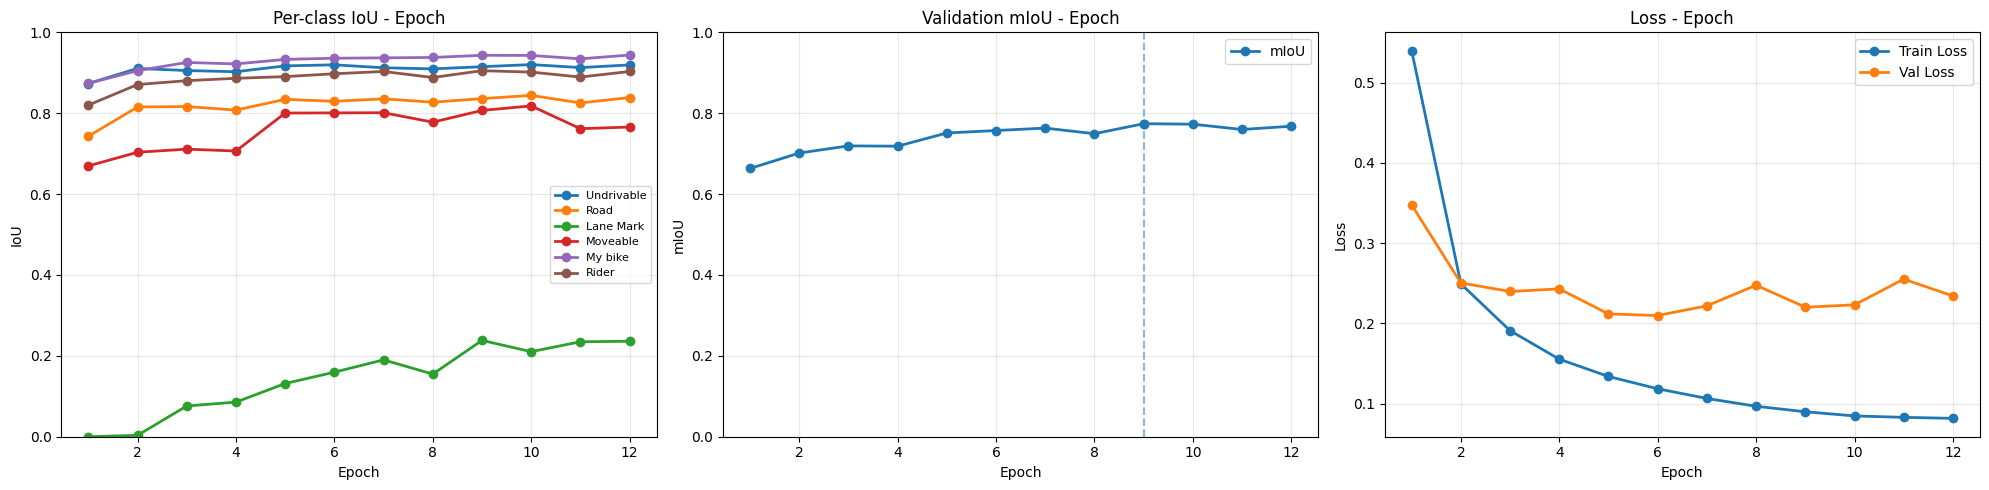

In [39]:
import numpy as np
import matplotlib.pyplot as plt

epochs = history["epoch"]
per_class = np.array(history["per_class_iou"])

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# ======================
# ① Per-class IoU
# ======================
ax = axes[0]

for cls in range(1, NUM_CLASSES):
    name = train2name.get(cls, f"class_{cls}")
    ax.plot(
        epochs,
        per_class[:, cls],
        marker="o",
        linewidth=2,
        label=name
    )

ax.set_title("Per-class IoU - Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("IoU")
ax.set_ylim(0, 1.0)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=8)


# ======================
# ② mIoU
# ======================
ax = axes[1]

ax.plot(
    history["epoch"],
    history["val_miou"],
    marker="o",
    linewidth=2,
    label="mIoU"
)

best_epoch = history["epoch"][np.argmax(history["val_miou"])]
best_miou  = max(history["val_miou"])

ax.axvline(best_epoch, linestyle="--", alpha=0.5)
ax.scatter(best_epoch, best_miou, zorder=5)

ax.set_title("Validation mIoU - Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("mIoU")
ax.set_ylim(0, 1.0)
ax.grid(True, alpha=0.3)
ax.legend()


# ======================
# ③ Loss 그래프
# ======================
ax = axes[2]

ax.plot(
    history["epoch"],
    history["train_loss"],
    marker="o",
    linewidth=2,
    label="Train Loss"
)

ax.plot(
    history["epoch"],
    history["val_loss"],
    marker="o",
    linewidth=2,
    label="Val Loss"
)

ax.set_title("Loss - Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, alpha=0.3)
ax.legend()


plt.tight_layout()
plt.show()

🔥 Worst sample idxs: [17, 5]
idx=17 | pixel_acc=0.7931


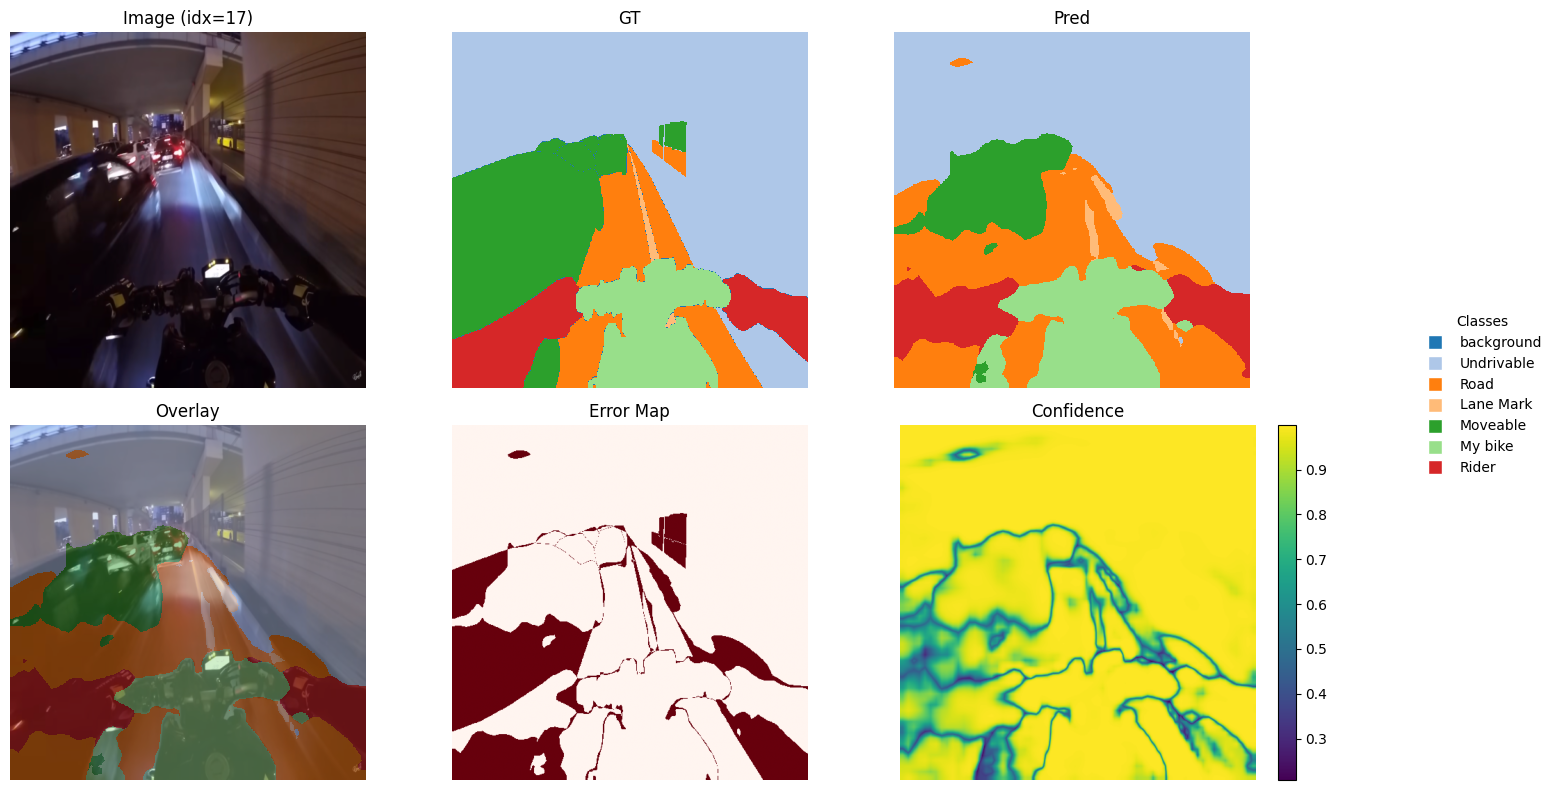

idx=5 | pixel_acc=0.8098


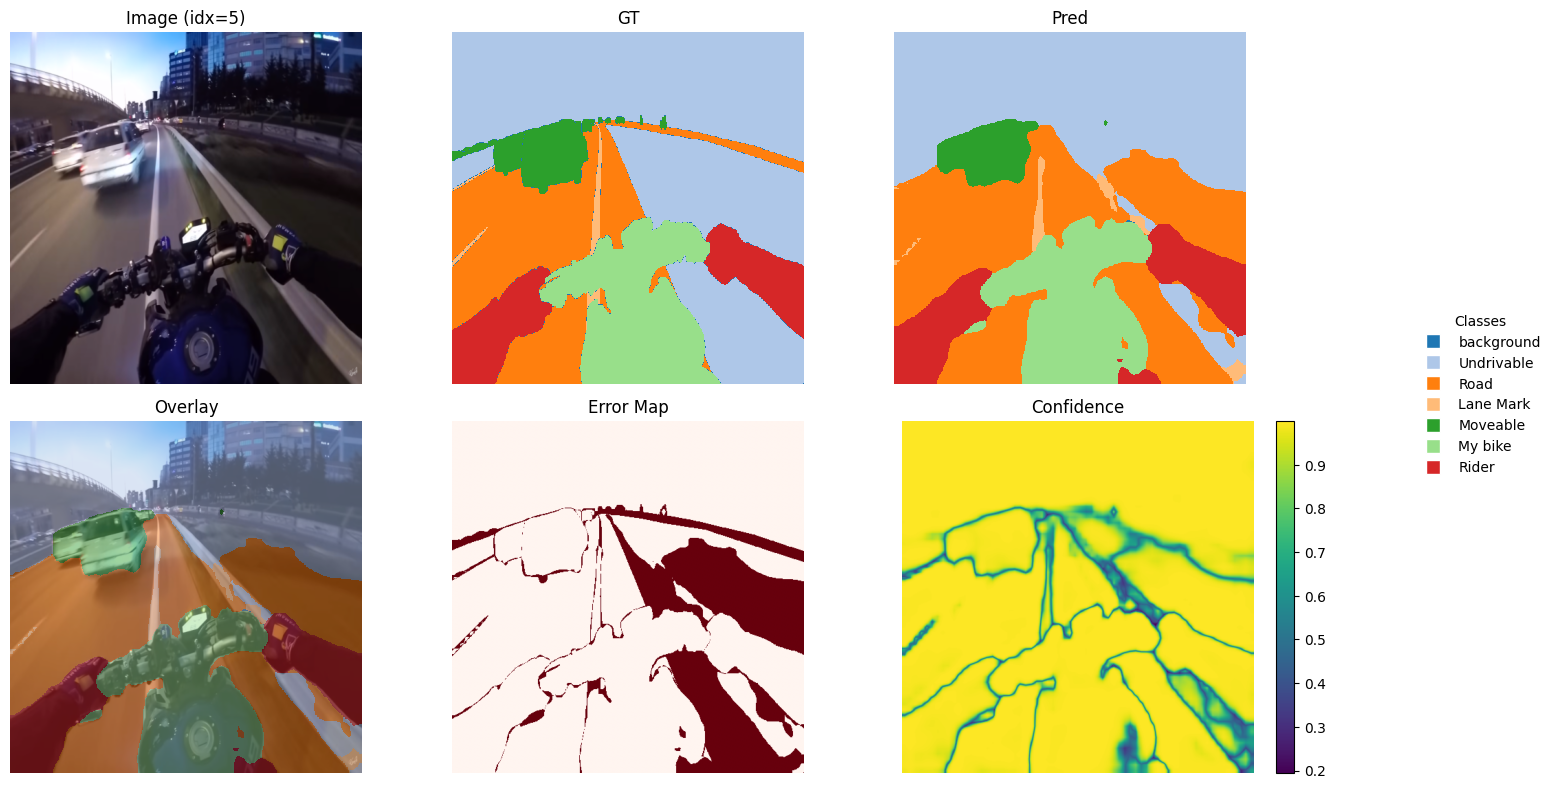

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch

# -----------------------------
# 1) logits 추출 (DeepLab(dict) / UNet(tensor) 모두 대응)
# -----------------------------
def get_logits(model_out):
    if isinstance(model_out, dict):
        return model_out["out"]
    return model_out

# -----------------------------
# 2) 단일 샘플 시각화 (Image / GT / Pred / Overlay / Error / Conf)
# -----------------------------
@torch.no_grad()
def show_pred(model, dataset, idx=0, alpha=0.5):
    model.eval()

    img, mask = dataset[idx]              # img: (3,H,W), mask: (H,W)
    x = img.unsqueeze(0).to(device)

    logits = get_logits(model(x))[0]      # (C,H,W)
    prob = torch.softmax(logits, dim=0)   # (C,H,W)

    pred = prob.argmax(0).cpu().numpy()  # (H,W)
    conf = prob.max(0)[0].cpu().numpy()  # (H,W)
    gt   = mask.cpu().numpy()

    # denorm image
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img_np = img.permute(1,2,0).cpu().numpy()
    img_np = (img_np * std + mean).clip(0, 1)

    # colormap
    base_cmap = plt.get_cmap("tab20")
    cmap = ListedColormap(base_cmap.colors[:NUM_CLASSES])

    # error map
    error_map = (pred != gt)

    fig, axes = plt.subplots(2, 3, figsize=(14, 8))

    axes[0,0].imshow(img_np); axes[0,0].set_title(f"Image (idx={idx})"); axes[0,0].axis("off")
    axes[0,1].imshow(gt,   cmap=cmap, vmin=0, vmax=NUM_CLASSES-1, interpolation="nearest"); axes[0,1].set_title("GT"); axes[0,1].axis("off")
    axes[0,2].imshow(pred, cmap=cmap, vmin=0, vmax=NUM_CLASSES-1, interpolation="nearest"); axes[0,2].set_title("Pred"); axes[0,2].axis("off")

    axes[1,0].imshow(img_np)
    axes[1,0].imshow(pred, cmap=cmap, vmin=0, vmax=NUM_CLASSES-1, alpha=alpha, interpolation="nearest")
    axes[1,0].set_title("Overlay"); axes[1,0].axis("off")

    axes[1,1].imshow(error_map, cmap="Reds")
    axes[1,1].set_title("Error Map"); axes[1,1].axis("off")

    im = axes[1,2].imshow(conf, cmap="viridis")
    axes[1,2].set_title("Confidence"); axes[1,2].axis("off")
    fig.colorbar(im, ax=axes[1,2], fraction=0.046)

    # legend
    handles, labels = [], []
    for cls in range(NUM_CLASSES):
        name = train2name.get(cls, f"class_{cls}")
        handles.append(plt.Line2D([0],[0], marker='s', color='w',
                                  markerfacecolor=cmap(cls), markersize=10))
        labels.append(name)

    fig.legend(handles, labels, loc="center right", bbox_to_anchor=(1.15, 0.5),
               frameon=False, title="Classes")

    plt.tight_layout()
    plt.show()

# -----------------------------
# 3) Worst-k
# -----------------------------
@torch.no_grad()
def worst_k_visualize(model, dataset, k=2, max_scan=None):
    model.eval()
    scores = []

    N = len(dataset) if max_scan is None else min(len(dataset), max_scan)

    for i in range(N):
        img_t, gt = dataset[i]
        x = img_t.unsqueeze(0).to(device)

        logits = get_logits(model(x))
        pred = logits.argmax(1).squeeze(0).detach().cpu().numpy()
        gt_np = gt.detach().cpu().numpy()

        acc = (pred == gt_np).mean()
        scores.append((acc, i))

    scores.sort(key=lambda x: x[0])  # 낮은 acc 순
    worst_idxs = [i for _, i in scores[:k]]

    print("🔥 Worst sample idxs:", worst_idxs)

    for idx in worst_idxs:
        # 간단 점수 출력(필요 없으면 지워도 됨)
        img_t, gt = dataset[idx]
        x = img_t.unsqueeze(0).to(device)
        logits = get_logits(model(x))
        pred = logits.argmax(1).squeeze(0).detach().cpu().numpy()
        acc = (pred == gt.detach().cpu().numpy()).mean()
        print(f"idx={idx} | pixel_acc={acc:.4f}")

        show_pred(model, dataset, idx=idx, alpha=0.45)

# 실행
worst_k_visualize(model, val_ds, k=2)

### 성능평가(Test dataset)

In [42]:
import numpy as np
import torch
from torch.utils.data import DataLoader

# ======================
# Test Dataset / Loader
# ======================
test_ds = COCOSemSeg(
    coco, IMG_DIR, test_ids, id2train,
    size=(512, 512), train=False
)

test_loader = DataLoader(
    test_ds,
    batch_size=4,
    shuffle=False,
    num_workers=2,  # ✅ 로컬/주피터에서 안전
    pin_memory=torch.cuda.is_available()
)

print("test:", len(test_ds))

# ======================
# Best Model Load
# ======================
BEST_PATH = "baseline_deeplabv3_resnet50.pth"  # 저장한 파일명
state = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(state)
model.to(device)
model.eval()
print("✅ loaded best:", BEST_PATH)

# ======================
# Test Evaluate  (✅ validate 시그니처 맞춤)
# ======================
test_loss, test_miou, test_per_class = validate(
    model, test_loader,
    criterion, device, NUM_CLASSES
)

print("\n===== TEST BENCHMARK =====")
print(f"test_loss = {float(test_loss):.4f}")
print(f"test_mIoU = {float(test_miou):.4f}")

# ----------------------
# per-class IoU 출력 (dict/list 둘 다 대응)
# ----------------------
if isinstance(test_per_class, dict):
    for cls in range(1, NUM_CLASSES):
        name = train2name.get(cls, f"class_{cls}")
        v = test_per_class.get(cls, float("nan"))
        if np.isfinite(v):
            print(f"  IoU {name:10s}: {float(v):.4f}")
        else:
            print(f"  IoU {name:10s}: nan")
else:
    arr = np.array(test_per_class, dtype=np.float32)
    for cls in range(1, NUM_CLASSES):
        name = train2name.get(cls, f"class_{cls}")
        v = arr[cls] if cls < len(arr) else np.nan
        if np.isfinite(v):
            print(f"  IoU {name:10s}: {float(v):.4f}")
        else:
            print(f"  IoU {name:10s}: nan")


test: 20
✅ loaded best: baseline_deeplabv3_resnet50.pth

===== TEST BENCHMARK =====
test_loss = 0.1594
test_mIoU = 0.8126
  IoU Undrivable: 0.9455
  IoU Road      : 0.8824
  IoU Lane Mark : 0.4828
  IoU Moveable  : 0.7077
  IoU My bike   : 0.9416
  IoU Rider     : 0.9154


### 2.1.2. U-Net(Backbone ResNet 50)

In [43]:
# --- UNet(ResNet encoder) 모델만 교체 ---
import torch.nn as nn

try:
    import segmentation_models_pytorch as smp
except ImportError:
    raise ImportError("pip install segmentation-models-pytorch 로 설치 후 진행하세요.")

# UNet + ResNet50 encoder (ImageNet pretrained)
core = smp.Unet(
    encoder_name="resnet50",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None,
)

# smp는 logits만 반환 → torchvision처럼 {"out": logits}로 래핑
class Wrap(nn.Module):
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}

model = Wrap(core).to(device)

config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [44]:
@torch.no_grad()
def compute_iou(pred, target, num_classes):
    # pred/target: (N,H,W)
    ious = []
    per_class = {}
    for cls in range(num_classes):
        pred_i = (pred == cls)
        targ_i = (target == cls)
        inter = (pred_i & targ_i).sum().item()
        union = (pred_i | targ_i).sum().item()
        if union == 0:
            iou = float("nan")
        else:
            iou = inter / union
        per_class[cls] = iou
        ious.append(iou)
    # mean over valid classes
    valid = [x for x in ious if not (isinstance(x, float) and np.isnan(x))]
    miou = float(np.mean(valid)) if len(valid) else 0.0
    return miou, per_class

In [45]:
import torch
import numpy as np
from tqdm.auto import tqdm

@torch.no_grad()
def validate(model, loader, criterion, device, num_classes, ignore_index=None):
    model.eval()
    total_loss = 0.0

    # confusion matrix: [num_classes, num_classes]
    conf = torch.zeros((num_classes, num_classes), dtype=torch.long)

    for imgs, masks in tqdm(loader, desc="val", leave=False):
        imgs  = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        logits = model(imgs)["out"]              # (N,C,H,W)
        loss = criterion(logits, masks)
        total_loss += loss.item() * imgs.size(0)

        preds = logits.argmax(dim=1)             # (N,H,W)

        # flatten
        preds = preds.view(-1).detach().cpu()
        gts   = masks.view(-1).detach().cpu()

        if ignore_index is not None:
            keep = (gts != ignore_index)
            preds = preds[keep]
            gts   = gts[keep]

        k = (gts >= 0) & (gts < num_classes)
        inds = num_classes * gts[k] + preds[k]
        conf += torch.bincount(inds, minlength=num_classes**2).reshape(num_classes, num_classes)

    # IoU 계산
    tp = conf.diag().float()
    fp = conf.sum(0).float() - tp
    fn = conf.sum(1).float() - tp
    denom = tp + fp + fn

    per_class_iou = (tp / torch.clamp(denom, min=1.0)).numpy()  # shape: [C]
    # background(0) 제외 mIoU (원하면 포함/제외 변경 가능)
    miou = float(np.nanmean(per_class_iou[1:]))

    # dict 형태로도 반환(기존 코드 호환)
    per_class_dict = {c: float(per_class_iou[c]) for c in range(num_classes)}

    val_loss = total_loss / len(loader.dataset)
    return val_loss, miou, per_class_dict

In [46]:
# =========================================================
# UNet(ResNet50 encoder) + 학습 루프 (인자형 train/validate 대응)
# =========================================================

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# =========================
# 0) UNet 모델 정의 (ResNet50 encoder)
# =========================
try:
    import segmentation_models_pytorch as smp
except ImportError:
    raise ImportError("segmentation_models_pytorch 필요: pip install segmentation-models-pytorch")

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

core_unet = smp.Unet(
    encoder_name="resnet50",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None
)

class WrapOut(nn.Module):
    """smp는 Tensor(logits) 반환 → torchvision처럼 {'out': logits}로 맞춤"""
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}

model = WrapOut(core_unet).to(device)

# =========================
# 1) Loss / Optimizer 재생성 (필수)
# =========================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# sanity check
model_param_ids = set(id(p) for p in model.parameters())
opt_param_ids = set(id(p) for g in optimizer.param_groups for p in g["params"])
assert len(model_param_ids & opt_param_ids) > 0, "❌ optimizer가 UNet 파라미터를 안 잡고 있습니다."

print("✅ UNet ready:", type(model))
print("✅ optimizer param count:", sum(len(g["params"]) for g in optimizer.param_groups))

# =========================
# 2) CONFIG
# =========================
EPOCHS = 30
PATIENCE = 3
MODEL_NAME = "baseline_unet_resnet50.pth"
HISTORY_NAME = "history_unet_resnet50.npz"

best_miou = -1.0
patience_counter = 0

# =========================
# 3) per_class 정리 유틸
# =========================
def to_per_class_list(per_class, num_classes: int):
    out = [np.nan] * num_classes
    if isinstance(per_class, dict):
        for c in range(num_classes):
            if c in per_class:
                try:
                    v = float(per_class[c])
                    out[c] = v if np.isfinite(v) else np.nan
                except:
                    out[c] = np.nan
        return out
    if isinstance(per_class, (list, tuple, np.ndarray)):
        L = min(len(per_class), num_classes)
        for c in range(L):
            try:
                v = float(per_class[c])
                out[c] = v if np.isfinite(v) else np.nan
            except:
                out[c] = np.nan
        return out
    return out

# =========================
# 4) history
# =========================
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "per_class_iou": []
}

# =========================
# 5) TRAIN LOOP  (✅ 인자형 함수 호출로 수정)
# =========================
for epoch in range(1, EPOCHS + 1):
    tr_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    va_loss, va_miou, per_class = validate(model, val_loader, criterion, device, NUM_CLASSES)

    per_class_list = to_per_class_list(per_class, NUM_CLASSES)

    print(f"[UNet] [{epoch:02d}/{EPOCHS}] "
          f"train_loss={float(tr_loss):.4f} | val_loss={float(va_loss):.4f} | mIoU={float(va_miou):.4f}")

    for cls in range(1, NUM_CLASSES):
        cls_name = train2name.get(cls, str(cls)) if isinstance(train2name, dict) else str(cls)
        iou = per_class_list[cls]
        print(f"  IoU {cls_name:10s}: {'nan' if np.isnan(iou) else f'{iou:.4f}'}")

    history["epoch"].append(int(epoch))
    history["train_loss"].append(float(tr_loss))
    history["val_loss"].append(float(va_loss))
    history["val_miou"].append(float(va_miou))
    history["per_class_iou"].append([float(x) if np.isfinite(x) else np.nan for x in per_class_list])

    # best + early stopping
    if float(va_miou) > float(best_miou):
        best_miou = float(va_miou)
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_NAME)
        print(f"  ✅ saved: {MODEL_NAME} (best_mIoU={best_miou:.4f})")
    else:
        patience_counter += 1
        print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE}) | best_mIoU={best_miou:.4f}")

    if patience_counter >= PATIENCE:
        print(f"\n🛑 Early stopping triggered at epoch {epoch}")
        print(f"Best mIoU: {best_miou:.4f}")
        break

# =========================
# 6) history 저장
# =========================
try:
    np.savez(
        HISTORY_NAME,
        epoch=np.array(history["epoch"], dtype=np.int32),
        train_loss=np.array(history["train_loss"], dtype=np.float32),
        val_loss=np.array(history["val_loss"], dtype=np.float32),
        val_miou=np.array(history["val_miou"], dtype=np.float32),
        per_class_iou=np.array(history["per_class_iou"], dtype=np.float32),
    )
    print(f"\n✅ history saved: {HISTORY_NAME}")
except Exception as e:
    print(f"\n⚠ history save skipped: {e}")

device: cuda
✅ UNet ready: <class '__main__.WrapOut'>
✅ optimizer param count: 191


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [01/30] train_loss=1.2326 | val_loss=0.7779 | mIoU=0.5395
  IoU Undrivable: 0.8062
  IoU Road      : 0.7293
  IoU Lane Mark : 0.0000
  IoU Moveable  : 0.3331
  IoU My bike   : 0.7202
  IoU Rider     : 0.6483
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.5395)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [02/30] train_loss=0.5883 | val_loss=0.5843 | mIoU=0.5962
  IoU Undrivable: 0.8228
  IoU Road      : 0.7699
  IoU Lane Mark : 0.0000
  IoU Moveable  : 0.3812
  IoU My bike   : 0.7910
  IoU Rider     : 0.8121
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.5962)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [03/30] train_loss=0.4130 | val_loss=0.5839 | mIoU=0.5739
  IoU Undrivable: 0.8031
  IoU Road      : 0.7664
  IoU Lane Mark : 0.0000
  IoU Moveable  : 0.3381
  IoU My bike   : 0.7684
  IoU Rider     : 0.7675
  ⏸ no improvement (1/3) | best_mIoU=0.5962


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [04/30] train_loss=0.3490 | val_loss=0.3889 | mIoU=0.6564
  IoU Undrivable: 0.8554
  IoU Road      : 0.7859
  IoU Lane Mark : 0.0000
  IoU Moveable  : 0.6043
  IoU My bike   : 0.8891
  IoU Rider     : 0.8037
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6564)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [05/30] train_loss=0.2954 | val_loss=0.3300 | mIoU=0.6729
  IoU Undrivable: 0.8831
  IoU Road      : 0.8041
  IoU Lane Mark : 0.0004
  IoU Moveable  : 0.6116
  IoU My bike   : 0.8824
  IoU Rider     : 0.8559
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6729)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [06/30] train_loss=0.2702 | val_loss=0.4852 | mIoU=0.5796
  IoU Undrivable: 0.8499
  IoU Road      : 0.7809
  IoU Lane Mark : 0.0016
  IoU Moveable  : 0.5127
  IoU My bike   : 0.6953
  IoU Rider     : 0.6370
  ⏸ no improvement (1/3) | best_mIoU=0.6729


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [07/30] train_loss=0.2615 | val_loss=0.3253 | mIoU=0.6700
  IoU Undrivable: 0.8738
  IoU Road      : 0.8035
  IoU Lane Mark : 0.0074
  IoU Moveable  : 0.5727
  IoU My bike   : 0.9031
  IoU Rider     : 0.8593
  ⏸ no improvement (2/3) | best_mIoU=0.6729


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [08/30] train_loss=0.2390 | val_loss=0.3074 | mIoU=0.6899
  IoU Undrivable: 0.8729
  IoU Road      : 0.8049
  IoU Lane Mark : 0.0094
  IoU Moveable  : 0.6477
  IoU My bike   : 0.9311
  IoU Rider     : 0.8735
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6899)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [09/30] train_loss=0.2038 | val_loss=0.3422 | mIoU=0.6631
  IoU Undrivable: 0.8812
  IoU Road      : 0.7939
  IoU Lane Mark : 0.0234
  IoU Moveable  : 0.5934
  IoU My bike   : 0.8857
  IoU Rider     : 0.8012
  ⏸ no improvement (1/3) | best_mIoU=0.6899


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [10/30] train_loss=0.1857 | val_loss=0.3565 | mIoU=0.6663
  IoU Undrivable: 0.8699
  IoU Road      : 0.8179
  IoU Lane Mark : 0.0961
  IoU Moveable  : 0.4755
  IoU My bike   : 0.8812
  IoU Rider     : 0.8571
  ⏸ no improvement (2/3) | best_mIoU=0.6899


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [11/30] train_loss=0.1902 | val_loss=0.3170 | mIoU=0.7099
  IoU Undrivable: 0.8725
  IoU Road      : 0.8143
  IoU Lane Mark : 0.2232
  IoU Moveable  : 0.5974
  IoU My bike   : 0.9038
  IoU Rider     : 0.8479
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7099)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [12/30] train_loss=0.1794 | val_loss=0.2566 | mIoU=0.7505
  IoU Undrivable: 0.8910
  IoU Road      : 0.8383
  IoU Lane Mark : 0.2951
  IoU Moveable  : 0.6738
  IoU My bike   : 0.9305
  IoU Rider     : 0.8745
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7505)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [13/30] train_loss=0.1683 | val_loss=0.3080 | mIoU=0.7326
  IoU Undrivable: 0.8824
  IoU Road      : 0.8188
  IoU Lane Mark : 0.2698
  IoU Moveable  : 0.6162
  IoU My bike   : 0.9297
  IoU Rider     : 0.8788
  ⏸ no improvement (1/3) | best_mIoU=0.7505


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [14/30] train_loss=0.1574 | val_loss=0.2819 | mIoU=0.7359
  IoU Undrivable: 0.8869
  IoU Road      : 0.8212
  IoU Lane Mark : 0.2249
  IoU Moveable  : 0.6645
  IoU My bike   : 0.9234
  IoU Rider     : 0.8948
  ⏸ no improvement (2/3) | best_mIoU=0.7505


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [15/30] train_loss=0.1418 | val_loss=0.2453 | mIoU=0.7726
  IoU Undrivable: 0.9005
  IoU Road      : 0.8402
  IoU Lane Mark : 0.3421
  IoU Moveable  : 0.7188
  IoU My bike   : 0.9308
  IoU Rider     : 0.9032
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7726)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [16/30] train_loss=0.1400 | val_loss=0.3002 | mIoU=0.7427
  IoU Undrivable: 0.8861
  IoU Road      : 0.8145
  IoU Lane Mark : 0.2453
  IoU Moveable  : 0.7304
  IoU My bike   : 0.9052
  IoU Rider     : 0.8749
  ⏸ no improvement (1/3) | best_mIoU=0.7726


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [17/30] train_loss=0.1288 | val_loss=0.2639 | mIoU=0.7649
  IoU Undrivable: 0.9056
  IoU Road      : 0.8383
  IoU Lane Mark : 0.3404
  IoU Moveable  : 0.6660
  IoU My bike   : 0.9314
  IoU Rider     : 0.9079
  ⏸ no improvement (2/3) | best_mIoU=0.7726


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [18/30] train_loss=0.1140 | val_loss=0.2839 | mIoU=0.7621
  IoU Undrivable: 0.8998
  IoU Road      : 0.8543
  IoU Lane Mark : 0.3033
  IoU Moveable  : 0.7270
  IoU My bike   : 0.9096
  IoU Rider     : 0.8787
  ⏸ no improvement (3/3) | best_mIoU=0.7726

🛑 Early stopping triggered at epoch 18
Best mIoU: 0.7726

✅ history saved: history_unet_resnet50.npz


wandb 적용

In [50]:
# =========================================================
# UNet(ResNet50 encoder) + 학습 루프 + W&B (인자형 train/validate 대응)
# =========================================================

import numpy as np
import torch
import torch.nn as nn
import wandb

# =========================
# 0) UNet 모델 정의 (ResNet50 encoder)
# =========================
try:
    import segmentation_models_pytorch as smp
except ImportError:
    raise ImportError("segmentation_models_pytorch 필요: pip install segmentation-models-pytorch")

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

core_unet = smp.Unet(
    encoder_name="resnet50",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None
)

class WrapOut(nn.Module):
    """smp는 Tensor(logits) 반환 → torchvision처럼 {'out': logits}로 맞춤"""
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}

model = WrapOut(core_unet).to(device)

# =========================
# 1) Loss / Optimizer 재생성 (필수)
# =========================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# sanity check
model_param_ids = set(id(p) for p in model.parameters())
opt_param_ids = set(id(p) for g in optimizer.param_groups for p in g["params"])
assert len(model_param_ids & opt_param_ids) > 0, "❌ optimizer가 UNet 파라미터를 안 잡고 있습니다."

print("✅ UNet ready:", type(model))
print("✅ optimizer param count:", sum(len(g["params"]) for g in optimizer.param_groups))

# =========================
# 2) CONFIG
# =========================
EPOCHS = 30
PATIENCE = 3
MODEL_NAME = "baseline_unet_resnet50.pth"
HISTORY_NAME = "history_unet_resnet50.npz"

best_miou = -1.0
patience_counter = 0

# =========================
# 2-1) W&B INIT
# =========================
run = wandb.init(
    entity="brad114-count-ai",                 # 필요 없으면 제거 가능
    project="motorcycle-night-ride-seg",        # 너희 프로젝트명
    name="unet_resnet50_train",
    config={
        "stage": "train",
        "model": "UNet",
        "encoder": "resnet50",
        "encoder_weights": "imagenet",
        "epochs": int(EPOCHS),
        "patience": int(PATIENCE),
        "optimizer": "AdamW",
        "lr": float(optimizer.param_groups[0]["lr"]),
        "weight_decay": float(optimizer.param_groups[0].get("weight_decay", 0.0)),
        "num_classes": int(NUM_CLASSES),
        "best_ckpt": MODEL_NAME,
        "history_file": HISTORY_NAME,
        "device": device,
        # (있으면 기록) 배치 사이즈/num_workers
        "batch_size": int(getattr(train_loader, "batch_size", 0) or 0),
        "num_workers": int(getattr(train_loader, "num_workers", 0) or 0),
    },
)

# (선택) 모델 파라미터/그라디언트 추적 — 무거울 수 있어서 기본 OFF 권장
# wandb.watch(model, log="gradients", log_freq=200)

# =========================
# 3) per_class 정리 유틸
# =========================
def to_per_class_list(per_class, num_classes: int):
    out = [np.nan] * num_classes
    if isinstance(per_class, dict):
        for c in range(num_classes):
            if c in per_class:
                try:
                    v = float(per_class[c])
                    out[c] = v if np.isfinite(v) else np.nan
                except:
                    out[c] = np.nan
        return out
    if isinstance(per_class, (list, tuple, np.ndarray)):
        L = min(len(per_class), num_classes)
        for c in range(L):
            try:
                v = float(per_class[c])
                out[c] = v if np.isfinite(v) else np.nan
            except:
                out[c] = np.nan
        return out
    return out

# =========================
# 4) history
# =========================
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "per_class_iou": []
}

# =========================
# 5) TRAIN LOOP (✅ 인자형 함수 호출)
# =========================
for epoch in range(1, EPOCHS + 1):
    tr_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    va_loss, va_miou, per_class = validate(model, val_loader, criterion, device, NUM_CLASSES)

    per_class_list = to_per_class_list(per_class, NUM_CLASSES)

    print(f"[UNet] [{epoch:02d}/{EPOCHS}] "
          f"train_loss={float(tr_loss):.4f} | val_loss={float(va_loss):.4f} | mIoU={float(va_miou):.4f}")

    for cls in range(1, NUM_CLASSES):
        cls_name = train2name.get(cls, str(cls)) if isinstance(train2name, dict) else str(cls)
        iou = per_class_list[cls]
        print(f"  IoU {cls_name:10s}: {'nan' if np.isnan(iou) else f'{iou:.4f}'}")

    # =========================
    # W&B LOG (epoch마다 기록)
    # =========================
    log_dict = {
        "epoch": int(epoch),
        "train/loss": float(tr_loss),
        "val/loss": float(va_loss),
        "val/mIoU": float(va_miou),
        "opt/lr": float(optimizer.param_groups[0]["lr"]),
        "early_stopping/patience_counter": int(patience_counter),
        "best/best_mIoU_so_far": float(best_miou),
    }

    # 클래스별 IoU 기록
    for cls in range(1, NUM_CLASSES):
        cls_name = train2name.get(cls, f"class_{cls}") if isinstance(train2name, dict) else f"class_{cls}"
        v = per_class_list[cls]
        log_dict[f"val/iou_{cls_name}"] = float(v) if np.isfinite(v) else np.nan

    run.log(log_dict, step=epoch)

    # =========================
    # history 저장
    # =========================
    history["epoch"].append(int(epoch))
    history["train_loss"].append(float(tr_loss))
    history["val_loss"].append(float(va_loss))
    history["val_miou"].append(float(va_miou))
    history["per_class_iou"].append([float(x) if np.isfinite(x) else np.nan for x in per_class_list])

    # =========================
    # best + early stopping
    # =========================
    if float(va_miou) > float(best_miou):
        best_miou = float(va_miou)
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_NAME)
        print(f"  ✅ saved: {MODEL_NAME} (best_mIoU={best_miou:.4f})")

        run.log({"best/updated": 1, "best/mIoU": float(best_miou)}, step=epoch)

        # (선택) best ckpt를 W&B artifact로 업로드하고 싶으면 주석 해제
        # artifact = wandb.Artifact(name="unet_resnet50_best", type="model")
        # artifact.add_file(MODEL_NAME)
        # run.log_artifact(artifact)

    else:
        patience_counter += 1
        print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE}) | best_mIoU={best_miou:.4f}")
        run.log({"best/updated": 0}, step=epoch)

    if patience_counter >= PATIENCE:
        print(f"\n🛑 Early stopping triggered at epoch {epoch}")
        print(f"Best mIoU: {best_miou:.4f}")
        run.log(
            {"early_stopping/stopped": 1, "early_stopping/stop_epoch": int(epoch), "best/mIoU": float(best_miou)},
            step=epoch
        )
        break

# =========================
# 6) history 저장
# =========================
try:
    np.savez(
        HISTORY_NAME,
        epoch=np.array(history["epoch"], dtype=np.int32),
        train_loss=np.array(history["train_loss"], dtype=np.float32),
        val_loss=np.array(history["val_loss"], dtype=np.float32),
        val_miou=np.array(history["val_miou"], dtype=np.float32),
        per_class_iou=np.array(history["per_class_iou"], dtype=np.float32),
    )
    print(f"\n✅ history saved: {HISTORY_NAME}")

    # (선택) history 파일을 W&B artifact로 업로드하고 싶으면 주석 해제
    # hist_art = wandb.Artifact(name="unet_resnet50_history", type="dataset")
    # hist_art.add_file(HISTORY_NAME)
    # run.log_artifact(hist_art)

except Exception as e:
    print(f"\n⚠ history save skipped: {e}")
    run.log({"history/save_error": str(e)})

# =========================
# 7) W&B FINISH
# =========================
run.finish()


device: cuda
✅ UNet ready: <class '__main__.WrapOut'>
✅ optimizer param count: 191


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [01/30] train_loss=1.3891 | val_loss=0.9674 | mIoU=0.5326
  IoU Undrivable: 0.7185
  IoU Road      : 0.7209
  IoU Lane Mark : 0.0001
  IoU Moveable  : 0.3596
  IoU My bike   : 0.8125
  IoU Rider     : 0.5840
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.5326)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [02/30] train_loss=0.7155 | val_loss=0.5544 | mIoU=0.6144
  IoU Undrivable: 0.8161
  IoU Road      : 0.7455
  IoU Lane Mark : 0.0003
  IoU Moveable  : 0.5254
  IoU My bike   : 0.8408
  IoU Rider     : 0.7585
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6144)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [03/30] train_loss=0.4289 | val_loss=0.4896 | mIoU=0.6195
  IoU Undrivable: 0.8360
  IoU Road      : 0.7494
  IoU Lane Mark : 0.0005
  IoU Moveable  : 0.4482
  IoU My bike   : 0.8702
  IoU Rider     : 0.8126
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6195)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [04/30] train_loss=0.3446 | val_loss=0.4696 | mIoU=0.6009
  IoU Undrivable: 0.8525
  IoU Road      : 0.7824
  IoU Lane Mark : 0.0011
  IoU Moveable  : 0.4976
  IoU My bike   : 0.7849
  IoU Rider     : 0.6866
  ⏸ no improvement (1/3) | best_mIoU=0.6195


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [05/30] train_loss=0.3051 | val_loss=0.3345 | mIoU=0.6654
  IoU Undrivable: 0.8741
  IoU Road      : 0.8049
  IoU Lane Mark : 0.0019
  IoU Moveable  : 0.5915
  IoU My bike   : 0.8888
  IoU Rider     : 0.8311
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6654)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [06/30] train_loss=0.2582 | val_loss=0.3150 | mIoU=0.6821
  IoU Undrivable: 0.8808
  IoU Road      : 0.8097
  IoU Lane Mark : 0.0079
  IoU Moveable  : 0.6130
  IoU My bike   : 0.9049
  IoU Rider     : 0.8764
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.6821)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [07/30] train_loss=0.2310 | val_loss=0.2817 | mIoU=0.7007
  IoU Undrivable: 0.8860
  IoU Road      : 0.8179
  IoU Lane Mark : 0.0267
  IoU Moveable  : 0.6819
  IoU My bike   : 0.9124
  IoU Rider     : 0.8793
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7007)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [08/30] train_loss=0.2134 | val_loss=0.2891 | mIoU=0.7009
  IoU Undrivable: 0.8817
  IoU Road      : 0.8238
  IoU Lane Mark : 0.1024
  IoU Moveable  : 0.6602
  IoU My bike   : 0.8817
  IoU Rider     : 0.8560
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7009)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [09/30] train_loss=0.1995 | val_loss=0.3189 | mIoU=0.7390
  IoU Undrivable: 0.8608
  IoU Road      : 0.8284
  IoU Lane Mark : 0.2899
  IoU Moveable  : 0.6732
  IoU My bike   : 0.8974
  IoU Rider     : 0.8842
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7390)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [10/30] train_loss=0.1948 | val_loss=0.2896 | mIoU=0.7347
  IoU Undrivable: 0.8865
  IoU Road      : 0.8082
  IoU Lane Mark : 0.2650
  IoU Moveable  : 0.6532
  IoU My bike   : 0.9227
  IoU Rider     : 0.8729
  ⏸ no improvement (1/3) | best_mIoU=0.7390


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [11/30] train_loss=0.1737 | val_loss=0.2907 | mIoU=0.7436
  IoU Undrivable: 0.8869
  IoU Road      : 0.8315
  IoU Lane Mark : 0.2031
  IoU Moveable  : 0.7391
  IoU My bike   : 0.9376
  IoU Rider     : 0.8636
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7436)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [12/30] train_loss=0.1742 | val_loss=0.3078 | mIoU=0.7220
  IoU Undrivable: 0.8931
  IoU Road      : 0.8299
  IoU Lane Mark : 0.2861
  IoU Moveable  : 0.6812
  IoU My bike   : 0.8794
  IoU Rider     : 0.7622
  ⏸ no improvement (1/3) | best_mIoU=0.7436


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [13/30] train_loss=0.1823 | val_loss=0.3754 | mIoU=0.6851
  IoU Undrivable: 0.8565
  IoU Road      : 0.7811
  IoU Lane Mark : 0.1752
  IoU Moveable  : 0.5199
  IoU My bike   : 0.8857
  IoU Rider     : 0.8925
  ⏸ no improvement (2/3) | best_mIoU=0.7436


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [14/30] train_loss=0.1647 | val_loss=0.2261 | mIoU=0.7765
  IoU Undrivable: 0.9062
  IoU Road      : 0.8571
  IoU Lane Mark : 0.3226
  IoU Moveable  : 0.7152
  IoU My bike   : 0.9548
  IoU Rider     : 0.9029
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7765)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [15/30] train_loss=0.1410 | val_loss=0.2122 | mIoU=0.7780
  IoU Undrivable: 0.9082
  IoU Road      : 0.8535
  IoU Lane Mark : 0.2906
  IoU Moveable  : 0.7611
  IoU My bike   : 0.9513
  IoU Rider     : 0.9034
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7780)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [16/30] train_loss=0.1331 | val_loss=0.2617 | mIoU=0.7618
  IoU Undrivable: 0.8994
  IoU Road      : 0.8467
  IoU Lane Mark : 0.3236
  IoU Moveable  : 0.6804
  IoU My bike   : 0.9435
  IoU Rider     : 0.8773
  ⏸ no improvement (1/3) | best_mIoU=0.7780


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [17/30] train_loss=0.1315 | val_loss=0.2260 | mIoU=0.7916
  IoU Undrivable: 0.9076
  IoU Road      : 0.8519
  IoU Lane Mark : 0.3381
  IoU Moveable  : 0.7966
  IoU My bike   : 0.9439
  IoU Rider     : 0.9112
  ✅ saved: baseline_unet_resnet50.pth (best_mIoU=0.7916)


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [18/30] train_loss=0.1261 | val_loss=0.2625 | mIoU=0.7447
  IoU Undrivable: 0.9017
  IoU Road      : 0.8524
  IoU Lane Mark : 0.2413
  IoU Moveable  : 0.6674
  IoU My bike   : 0.9299
  IoU Rider     : 0.8753
  ⏸ no improvement (1/3) | best_mIoU=0.7916


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [19/30] train_loss=0.1726 | val_loss=0.3161 | mIoU=0.7038
  IoU Undrivable: 0.8670
  IoU Road      : 0.8269
  IoU Lane Mark : 0.2366
  IoU Moveable  : 0.5215
  IoU My bike   : 0.9126
  IoU Rider     : 0.8582
  ⏸ no improvement (2/3) | best_mIoU=0.7916


val:   0%|          | 0/5 [00:00<?, ?it/s]

[UNet] [20/30] train_loss=0.1714 | val_loss=0.3344 | mIoU=0.7134
  IoU Undrivable: 0.8702
  IoU Road      : 0.8077
  IoU Lane Mark : 0.2801
  IoU Moveable  : 0.5323
  IoU My bike   : 0.9108
  IoU Rider     : 0.8791
  ⏸ no improvement (3/3) | best_mIoU=0.7916

🛑 Early stopping triggered at epoch 20
Best mIoU: 0.7916

✅ history saved: history_unet_resnet50.npz


### U-Net Test

In [ ]:
# =========================================================
# UNet TEST BENCHMARK  ✅복붙용 수정본 (NUM_WORKERS=0 기준)
# =========================================================

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# ======================
# 0) device
# ======================
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# ======================
# 1) Test Dataset / Loader
# ======================
test_ds = COCOSemSeg(
    coco, IMG_DIR, test_ids, id2train,
    size=(512, 512), train=False
)

# ✅ NUM_WORKERS=0이면 아래 옵션들( worker_init_fn / generator / persistent_workers ) 제거
test_loader = DataLoader(
    test_ds,
    batch_size=4,
    shuffle=False,
    num_workers=0,
    pin_memory=torch.cuda.is_available()
)

print("test:", len(test_ds))

# ======================
# 2) UNet 모델 재구성 + 로드
# ======================
try:
    import segmentation_models_pytorch as smp
except ImportError:
    raise ImportError("segmentation_models_pytorch 필요: pip install segmentation-models-pytorch")

core_unet = smp.Unet(
    encoder_name="resnet50",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None
)

class WrapOut(nn.Module):
    """smp는 Tensor(logits) 반환 → torchvision처럼 {'out': logits}로 맞춤"""
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}

model = WrapOut(core_unet).to(device)

# ======================
# 3) Loss (validate에서 필요)
# ======================
criterion = nn.CrossEntropyLoss()

# ======================
# 4) best weight 로드
# ======================
BEST_PATH = "baseline_unet_resnet50.pth"   # ✅ UNet best 파일
state = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(state)
model.eval()
print("✅ loaded best:", BEST_PATH)

# ======================
# 5) TEST 실행 (인자형 validate 호출)
# ======================
test_loss, test_miou, test_per_class = validate(
    model=model,
    loader=test_loader,
    criterion=criterion,
    device=device,
    num_classes=NUM_CLASSES,
    ignore_index=None
)

print("\n===== UNet TEST BENCHMARK =====")
print(f"test_loss = {float(test_loss):.4f}")
print(f"test_mIoU = {float(test_miou):.4f}")

# test_per_class는 dict 형태(권장) / list 형태 둘 다 대응
for cls in range(1, NUM_CLASSES):
    name = train2name.get(cls, f"class_{cls}")

    if isinstance(test_per_class, dict):
        v = float(test_per_class.get(cls, np.nan))
    else:
        v = float(test_per_class[cls]) if cls < len(test_per_class) else np.nan

    print(f"  IoU {name:10s}: {'nan' if np.isnan(v) else f'{v:.4f}'}")


wandb 적용

In [47]:
# =========================================================
# UNet TEST BENCHMARK + W&B ✅복붙용 수정본 (NUM_WORKERS=0 기준)
# =========================================================

import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import wandb

# ======================
# 0) device
# ======================
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# ======================
# 0-1) W&B init (테스트 1회도 run으로 남김)
# ======================
run = wandb.init(
    entity="brad114-count-ai",                 # 필요 없으면 제거 가능
    project="motorcycle-night-ride-seg",        # 너희 프로젝트명으로 바꿔도 됨
    name="unet_resnet50_test",                  # run 이름
    config={
        "stage": "test",
        "model": "Unet",
        "encoder": "resnet50",
        "img_size": (512, 512),
        "batch_size": 4,
        "num_workers": 0,
        "num_classes": int(NUM_CLASSES),
        "best_ckpt": "baseline_unet_resnet50.pth",
        "device": device,
    },
)

# ======================
# 1) Test Dataset / Loader
# ======================
test_ds = COCOSemSeg(
    coco, IMG_DIR, test_ids, id2train,
    size=(512, 512), train=False
)

test_loader = DataLoader(
    test_ds,
    batch_size=4,
    shuffle=False,
    num_workers=0,
    pin_memory=torch.cuda.is_available()
)

print("test:", len(test_ds))

# ======================
# 2) UNet 모델 재구성 + 로드
# ======================
try:
    import segmentation_models_pytorch as smp
except ImportError:
    raise ImportError("segmentation_models_pytorch 필요: pip install segmentation-models-pytorch")

core_unet = smp.Unet(
    encoder_name="resnet50",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None
)

class WrapOut(nn.Module):
    """smp는 Tensor(logits) 반환 → torchvision처럼 {'out': logits}로 맞춤"""
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}

model = WrapOut(core_unet).to(device)

# ======================
# 3) Loss (validate에서 필요)
# ======================
criterion = nn.CrossEntropyLoss()

# ======================
# 4) best weight 로드
# ======================
BEST_PATH = "baseline_unet_resnet50.pth"   # ✅ UNet best 파일
state = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(state)
model.eval()
print("✅ loaded best:", BEST_PATH)

# (선택) 체크포인트를 W&B에 아티팩트로 업로드하고 싶으면 아래 주석 해제
# artifact = wandb.Artifact(name="unet_resnet50_best", type="model")
# artifact.add_file(BEST_PATH)
# run.log_artifact(artifact)

# ======================
# 5) TEST 실행 (인자형 validate 호출)
# ======================
test_loss, test_miou, test_per_class = validate(
    model=model,
    loader=test_loader,
    criterion=criterion,
    device=device,
    num_classes=NUM_CLASSES,
    ignore_index=None
)

print("\n===== UNet TEST BENCHMARK =====")
print(f"test_loss = {float(test_loss):.4f}")
print(f"test_mIoU = {float(test_miou):.4f}")

# ======================
# 6) W&B log (테스트는 1회 로그면 충분)
# ======================
log_dict = {
    "test/loss": float(test_loss),
    "test/mIoU": float(test_miou),
}

# test_per_class는 dict 형태(권장) / list 형태 둘 다 대응
for cls in range(1, NUM_CLASSES):
    name = train2name.get(cls, f"class_{cls}")

    if isinstance(test_per_class, dict):
        v = float(test_per_class.get(cls, np.nan))
    else:
        v = float(test_per_class[cls]) if cls < len(test_per_class) else np.nan

    print(f"  IoU {name:10s}: {'nan' if np.isnan(v) else f'{v:.4f}'}")

    # W&B에는 nan도 들어갈 수 있으니 그대로 기록(원하면 -1로 치환 가능)
    log_dict[f"test/iou_{name}"] = v

run.log(log_dict)

# ======================
# 7) finish
# ======================
run.finish()


device: cuda


test: 20
✅ loaded best: baseline_unet_resnet50.pth


val:   0%|          | 0/5 [00:00<?, ?it/s]


===== UNet TEST BENCHMARK =====
test_loss = 0.1641
test_mIoU = 0.8069
  IoU Undrivable: 0.9389
  IoU Road      : 0.8815
  IoU Lane Mark : 0.4289
  IoU Moveable  : 0.7105
  IoU My bike   : 0.9503
  IoU Rider     : 0.9313


### Baseline 결정
#### 1) Test 결과 비교(총 3회 시행)
---
- 총 3회 반복하여 테스트한 결과 3회 모두 Deeplab v3 U-Net 보다 우수함
- 특히 가장 좋은 성능간 비교를 기준으로 양자의 차이를 비교하면 아래와 같음

![image.png](attachment:1d2b2d92-e4b5-493e-a150-112237379540.png)
##### mIoU
- UNet: 0.7988
- DeepLabV3: 0.8310
- → DeepLabV3 +0.0322p( 우세)
  
#### test_loss
- UNet: 0.1693
- DeepLabV3: 0.1619 → DeepLab이 더 낮음(좋음)

##### Lane Mark IoU
- DeepLab: 0.5139
- UNet: 0.4196
- → +0.0943 Deeplab 우세

#### 클래스별 IoU 비교 (DeepLab이 전부 우세)
- Undrivable: 0.9397 → 0.9521 (+0.0124)
- Road: 0.8834 → 0.8977 (+0.0143)
- Lane Mark: 0.4196 → 0.5139 (+0.0943)
- Moveable: 0.6696 → 0.7280 (+0.0584)
- My bike: 0.9525 → 0.9553 (+0.0028)
- Rider: 0.9279 → 0.9390 (+0.0111)

### 2) 베이스라인 결정
- 2. Base Line 모델 결정: DeepLabV3-ResNet50 확정

### 2.2.1 DeepLab V3 (Backbone EffientNet-B3)

In [ ]:
# =========================================================
# DeepLabV3 (EfficientNet-B3 encoder) - model 생성
# - 존 train_one_epoch / validate / 시각화 / test 코드 그대로 재사용
# - 핵심: smp 모델(Tensor logits)을 torchvision처럼 {"out": logits}로 래핑
# =========================================================

import torch
import torch.nn as nn

import segmentation_models_pytorch as smp

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# ---- DeepLabV3 with EfficientNet-B3 encoder ----
core = smp.DeepLabV3(
    encoder_name="efficientnet-b3",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None
)

class WrapOut(nn.Module):
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}  # torchvision 호환

model = WrapOut(core).to(device)
print("✅ model ready:", type(model))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# sanity check
model_param_ids = set(id(p) for p in model.parameters())
opt_param_ids = set(id(p) for g in optimizer.param_groups for p in g["params"])
assert len(model_param_ids & opt_param_ids) > 0, "❌ optimizer가 현재 model 파라미터를 안 잡고 있습니다."

print("✅ optimizer ok")


In [ ]:
import numpy as np
import torch

# ---------------------------------
# 1) 모델 출력(logits) 통일
#   - torchvision: dict["out"]
#   - smp: Tensor
# ---------------------------------
def _get_logits(model_out):
    if isinstance(model_out, dict):
        return model_out["out"]
    return model_out

# ---------------------------------
# 2) confusion matrix 누적
# ---------------------------------
def _confusion_from_pred(pred: torch.Tensor, target: torch.Tensor, num_classes: int, ignore_index=None):
    pred = pred.view(-1).to(torch.int64)
    target = target.view(-1).to(torch.int64)

    if ignore_index is not None:
        valid = (target != ignore_index)
        pred = pred[valid]
        target = target[valid]

    k = (target >= 0) & (target < num_classes)
    inds = num_classes * target[k] + pred[k]
    conf = torch.bincount(inds, minlength=num_classes**2).reshape(num_classes, num_classes)
    return conf

def _iou_from_confusion(conf: torch.Tensor, exclude_background: bool = True):
    conf = conf.float()
    tp = conf.diag()
    fp = conf.sum(0) - tp
    fn = conf.sum(1) - tp
    denom = tp + fp + fn

    iou = tp / torch.clamp(denom, min=1.0)  # (C,)
    iou = iou.cpu().numpy()

    start = 1 if exclude_background else 0
    miou = float(np.nanmean(iou[start:]))
    return miou, iou

# ---------------------------------
# 3) train / validate (✅ exclude_background 지원)
# ---------------------------------
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0

    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        logits = _get_logits(model(imgs))        # (N,C,H,W)
        loss = criterion(logits, masks)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * imgs.size(0)

    return total_loss / len(loader.dataset)

@torch.no_grad()
def validate(model, loader, criterion, device, num_classes,
             exclude_background: bool = True, ignore_index=None):
    model.eval()
    total_loss = 0.0

    # CPU 누적
    conf = torch.zeros((num_classes, num_classes), dtype=torch.long, device="cpu")

    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        logits = _get_logits(model(imgs))        # (N,C,H,W)
        loss = criterion(logits, masks)
        total_loss += loss.item() * imgs.size(0)

        pred = logits.argmax(dim=1)              # (N,H,W)
        conf += _confusion_from_pred(
            pred.detach().cpu(),
            masks.detach().cpu(),
            num_classes=num_classes,
            ignore_index=ignore_index
        )

    val_loss = total_loss / len(loader.dataset)
    miou, per_class_iou = _iou_from_confusion(conf, exclude_background=exclude_background)

    # 기존 코드 호환: dict로 반환
    per_class_dict = {c: float(per_class_iou[c]) for c in range(num_classes)}
    return val_loss, miou, per_class_dict

va_loss, va_miou, per_class = validate(
    model, val_loader, criterion, device, NUM_CLASSES,
    exclude_background=True
)


In [ ]:
import os
import numpy as np
import torch

# =========================
# CONFIG
# =========================
EPOCHS = 30
PATIENCE = 3

MODEL_NAME = "deeplabv3_effb3_best.pth"
HISTORY_NAME = "deeplabv3_effb3_history.npz"

best_miou = -1.0
patience_counter = 0

# =========================
# history buffer
# =========================
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "per_class_iou": []
}

# =========================
# TRAIN LOOP
# =========================
for epoch in range(1, EPOCHS + 1):

    # ----- train -----
    tr_loss = train_one_epoch(
        model,
        train_loader,
        criterion,
        optimizer,
        device
    )

    # ----- validate -----
    va_loss, va_miou, per_class = validate(
        model,
        val_loader,
        criterion,
        device,
        NUM_CLASSES,
        exclude_background=True
    )

    # ---- 출력 ----
    print(f"[{epoch:02d}/{EPOCHS}] "
          f"train_loss={tr_loss:.4f} | val_loss={va_loss:.4f} | mIoU={va_miou:.4f}")

    for cls in range(1, NUM_CLASSES):
        name = train2name.get(cls, f"class_{cls}")
        print(f"  IoU {name:10s}: {per_class[cls]:.4f}")

    # ---- history 저장 ----
    history["epoch"].append(epoch)
    history["train_loss"].append(tr_loss)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["per_class_iou"].append(
        [per_class[c] for c in range(NUM_CLASSES)]
    )

    # ---- best model ----
    if va_miou > best_miou:
        best_miou = va_miou
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_NAME)
        print(f"  ✅ saved best model ({best_miou:.4f})")

    else:
        patience_counter += 1
        print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE})")

    if patience_counter >= PATIENCE:
        print("🛑 Early stopping triggered")
        break

# =========================
# history 저장
# =========================
np.savez(
    HISTORY_NAME,
    epoch=np.array(history["epoch"]),
    train_loss=np.array(history["train_loss"]),
    val_loss=np.array(history["val_loss"]),
    val_miou=np.array(history["val_miou"]),
    per_class_iou=np.array(history["per_class_iou"])
)

print("✅ history saved")


wandb

In [51]:
import os
import numpy as np
import torch
import wandb

# =========================
# CONFIG
# =========================
EPOCHS = 30
PATIENCE = 3

MODEL_NAME = "deeplabv3_effb3_best.pth"
HISTORY_NAME = "history_deeplabv3_effb3_history.npz"

best_miou = -1.0
patience_counter = 0

# =========================
# W&B INIT (실험 시작)
# =========================
run = wandb.init(
    project="motorcycle-night-ride-seg",
    name="deeplabv3_effb3_train",
    config={
        "model": "DeepLabV3",
        "backbone": "efficientnet-b3",
        "epochs": EPOCHS,
        "patience": PATIENCE,
        "lr": optimizer.param_groups[0]["lr"],
        "num_classes": NUM_CLASSES,
    },
)

# =========================
# history buffer
# =========================
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "per_class_iou": []
}

# =========================
# TRAIN LOOP
# =========================
for epoch in range(1, EPOCHS + 1):

    tr_loss = train_one_epoch(
        model,
        train_loader,
        criterion,
        optimizer,
        device
    )

    va_loss, va_miou, per_class = validate(
        model,
        val_loader,
        criterion,
        device,
        NUM_CLASSES
    )

    print(f"[{epoch:02d}/{EPOCHS}] "
          f"train_loss={tr_loss:.4f} | val_loss={va_loss:.4f} | mIoU={va_miou:.4f}")

    log_dict = {
        "epoch": epoch,
        "train/loss": float(tr_loss),
        "val/loss": float(va_loss),
        "val/mIoU": float(va_miou),
        "opt/lr": optimizer.param_groups[0]["lr"],
    }

    for cls in range(1, NUM_CLASSES):
        name = train2name.get(cls, f"class_{cls}")
        iou_val = float(per_class[cls])
        print(f"  IoU {name:10s}: {iou_val:.4f}")
        log_dict[f"val/iou_{name}"] = iou_val

    wandb.log(log_dict, step=epoch)

    # best model
    if va_miou > best_miou:
        best_miou = va_miou
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_NAME)
        wandb.log({"best/mIoU": float(best_miou)}, step=epoch)
        print(f"  ✅ saved best model ({best_miou:.4f})")
    else:
        patience_counter += 1
        print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE})")

    if patience_counter >= PATIENCE:
        print("🛑 Early stopping triggered")
        wandb.log({"early_stopping": epoch}, step=epoch)
        break

# =========================
# history 저장
# =========================
np.savez(
    HISTORY_NAME,
    epoch=np.array(history["epoch"]),
    train_loss=np.array(history["train_loss"]),
    val_loss=np.array(history["val_loss"]),
    val_miou=np.array(history["val_miou"]),
    per_class_iou=np.array(history["per_class_iou"])
)

print("✅ history saved")

run.finish()

TypeError: validate() got an unexpected keyword argument 'exclude_background'

In [41]:
# =========================================================
# ✅ DeepLabV3(EfficientNet-B3) TEST BENCHMARK - 복붙용 (자동 로드 호환)
# - MODEL_NAME: deeplabv3_effb3_best.pth
# - 학습 때 WrapOut(core)로 저장했든, core로 저장했든 둘 다 로드되게 처리
# - NUM_WORKERS=2기준
# =========================================================

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from collections import OrderedDict

import segmentation_models_pytorch as smp

# -------------------------
# CONFIG
# -------------------------
MODEL_NAME   = "deeplabv3_effb3_best.pth"
HISTORY_NAME = "deeplabv3_effb3_history.npz"  # 테스트엔 필수 아님

# -------------------------
# device
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

# -------------------------
# Test Dataset / Loader
# -------------------------
test_ds = COCOSemSeg(
    coco, IMG_DIR, test_ids, id2train,
    size=(512, 512), train=False
)

test_loader = DataLoader(
    test_ds,
    batch_size=4,
    shuffle=False,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

print("test:", len(test_ds))

# -------------------------
# WrapOut (학습 때 썼던 래퍼)
# -------------------------
class WrapOut(nn.Module):
    def __init__(self, m):
        super().__init__()
        self.m = m
    def forward(self, x):
        return {"out": self.m(x)}

# -------------------------
# logits 공용
# -------------------------
def _get_logits(model_out):
    return model_out["out"] if isinstance(model_out, dict) else model_out

# -------------------------
# confusion / IoU 유틸
# -------------------------
def _confusion_from_pred(pred: torch.Tensor, target: torch.Tensor, num_classes: int, ignore_index=None):
    pred = pred.view(-1).to(torch.int64)
    target = target.view(-1).to(torch.int64)

    if ignore_index is not None:
        valid = (target != ignore_index)
        pred = pred[valid]
        target = target[valid]

    k = (target >= 0) & (target < num_classes)
    inds = num_classes * target[k] + pred[k]
    conf = torch.bincount(inds, minlength=num_classes**2).reshape(num_classes, num_classes)
    return conf

def _iou_from_confusion(conf: torch.Tensor, exclude_background=True):
    conf = conf.float()
    tp = conf.diag()
    fp = conf.sum(0) - tp
    fn = conf.sum(1) - tp
    denom = tp + fp + fn
    iou = tp / torch.clamp(denom, min=1.0)
    iou = iou.cpu().numpy()

    start = 1 if exclude_background else 0
    miou = float(np.nanmean(iou[start:]))
    return miou, iou

@torch.no_grad()
def validate(model, loader, criterion, device, num_classes,
             exclude_background=True, ignore_index=None):
    model.eval()
    total_loss = 0.0
    conf = torch.zeros((num_classes, num_classes), dtype=torch.long, device="cpu")

    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        logits = _get_logits(model(imgs))
        loss = criterion(logits, masks)
        total_loss += loss.item() * imgs.size(0)

        pred = logits.argmax(dim=1)
        conf += _confusion_from_pred(
            pred.detach().cpu(),
            masks.detach().cpu(),
            num_classes=num_classes,
            ignore_index=ignore_index
        )

    test_loss = total_loss / len(loader.dataset)
    miou, per_class_iou = _iou_from_confusion(conf, exclude_background=exclude_background)
    per_class_dict = {c: float(per_class_iou[c]) for c in range(num_classes)}
    return float(test_loss), float(miou), per_class_dict

# -------------------------
# 모델 생성 (core + wrapped 둘 다 준비)
# -------------------------
core = smp.DeepLabV3(
    encoder_name="efficientnet-b3",
    encoder_weights="imagenet",
    in_channels=3,
    classes=NUM_CLASSES,
    activation=None
).to(device)

wrapped = WrapOut(core).to(device)

criterion = nn.CrossEntropyLoss()

# -------------------------
# state_dict 로드 (자동 호환: m. prefix 있으면 wrapped에, 없으면 core에)
# -------------------------
state = torch.load(MODEL_NAME, map_location=device)

# 1) key에 "m."가 있으면 -> WrapOut 저장본
has_m_prefix = any(k.startswith("m.") for k in state.keys())

if has_m_prefix:
    model = wrapped
    model.load_state_dict(state, strict=True)
    print("✅ loaded as WrapOut(model). state_dict keys include 'm.'")
else:
    model = core
    model.load_state_dict(state, strict=True)
    print("✅ loaded as core(model). state_dict keys without 'm.'")

model.eval()
print("✅ loaded best:", MODEL_NAME)

# -------------------------
# TEST 실행
# -------------------------
test_loss, test_miou, test_per_class = validate(
    model=model,
    loader=test_loader,
    criterion=criterion,
    device=device,
    num_classes=NUM_CLASSES,
    exclude_background=True,
    ignore_index=None
)

print("\n===== DeepLabV3-EffB3 TEST BENCHMARK =====")
print(f"test_loss = {test_loss:.4f}")
print(f"test_mIoU = {test_miou:.4f}")

for cls in range(1, NUM_CLASSES):
    name = train2name.get(cls, f"class_{cls}")
    v = float(test_per_class.get(cls, np.nan))
    print(f"  IoU {name:10s}: {'nan' if np.isnan(v) else f'{v:.4f}'}")


device: cuda
test: 20


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

FileNotFoundError: [Errno 2] No such file or directory: 'deeplabv3_effb3_best.pth'

### Baseline 결정
---
#### Test 결과 비교
##### mIoU
- EfficientNet-B3: 0.8028
- ResNet50: 0.8294 → +0.0266p (약 +2.7%p)
#### 클래스별 IoU(핵심 차이)
- Undrivable: 0.9445 vs 0.9493 (ResNet +0.0048)
- Road: 0.8770 vs 0.8902 (ResNet +0.0132)
- Lane Mark: 0.4232 vs 0.5174 (ResNet +0.0942) ✅ 가장 중요한 차이
- Moveable: 0.7177 vs 0.7371 (ResNet +0.0194)
- My bike: 0.9380 vs 0.9521 (ResNet +0.0141)
- Rider: 0.9162 vs 0.9304 (ResNet +0.0142)
- 결론: EffientNet이 test loss가 낮음 그러나 IoU 분야는 ResNet50이 모든 클래스에서 더 좋고, 특히 Lane Mark에서 큰 차이(+0.094)
#### 최종 baseline 결정: Deeplab v3 (backbone: ResNet 50)

## 3. 피처엔지니어링

### 1. 피처엔지니어링 방향


### 1순위: Gamma + Crop(하단 중심)
- 저조도에서 선이 안 보이는 문제를 직접 건드림(Gamma)
- Lane이 실제로 많이 있는 영역(하단)을 더 크게 보게 만듦(Crop)
- RandomGamma(0.5~2.0) (어두운 쪽 강화 비중 ↑)
-Bottom-center crop 또는 Random crop with lane-presence
- 원본(또는 768) → 하단 60~70% 영역 중심으로 512 crop → resize 유지

### 2순위: CLAHE(약하게) + Crop(하단 중심)

- 야간에서 국부 대비를 살려 “선”을 띄우는 데 강함. 단, 과하면 노이즈도 키우므로 “약하게”가 중요
- CLAHE(clipLimit=2~3, tileGrid=8x8) (RGB 전체 or L 채널만)
- Bottom-center crop / lane-aware crop

### 3순위: Gamma + Contrast/ColorJitter
- 저조도 분포를 넓게 커버하면서(감마)
- 대비를 흔들어 라인을 다양한 조건에서 보게 함(contrast)
- RandomGamma(0.5~2.0)
- ColorJitter(contrast 중심, brightness는 약하게)
- contrast 0.6~1.6, brightness 0.8~1.2

### 4순위: CLAHE(약하게) + Gamma
- CLAHE로 “국부 대비”를 올리고
- Gamma로 “전체 밝기 분포”를 흔들어 저조도 적응 강화. 단, 둘 다 강하면 과보정/노이즈 증폭 위험
- CLAHE 약하게 → Gamma 약~중. 팁: 확률로 켜기(예: CLAHE 0.3, Gamma 0.7)
-
### 5순위: Gamma + Noise(ISO 흉내)
- 어두운 환경의 핵심 난제는 “노이즈+저대비”라서
- Lane이 노이즈에 묻혀도 버티게 만들 수 있음
- RandomGamma(0.5~2.0)
- Gaussian/Poisson noise (약~중)

### Gamma + Motion/Defocus Blur
- 야간 주행에서 Lane은 흔들림/블러에 잘 죽음. 다만 너무 강하면 학습이 어려워져서 우선순위는 낮춤
- RandomGamma
- MotionBlur(약) 또는 DefocusBlur(약)

### 2. 진행 순서
# 야간 Segmentation 성능 개선 – 핵심 실험 가이드

## 목표
야간 데이터에서 성능이 낮은 두 클래스 개선
- **Lane Mark**: 저조도 영향
- **Moveable**: 작은 객체 문제

---

## 실험 원칙 (필수)
- **Baseline 고정**
  - Model: DeepLabV3 + ResNet50
  - Loss / LR / Split / Seed 동일
  - Resize: 512
- **변수는 1개만 변경**

---

## 실험 플로우 (2단계)

### STEP 1 — 빠른 스크리닝
**목적:** 효과 있는 전처리 찾기  
- Epoch: 8~12  
- Early Stopping: patience=3  


**판정 기준**
- 1순위: Lane Mark IoU
- 2순위: Moveable IoU (GT<0.5%)

---

### STEP 2 — 확정 학습
STEP 1에서 선택된 **1개 설정만** 사용
- Epoch: 30
- Early Stopping: patience=3  
→ 최종 모델

---

## 추가 개선 (필요할 때만, 1개 선택)
- **Option A**: CE + Dice Loss  
- **Option B**: CLAHE (약하게)
  - clipLimit=2~3, p=0.3

---

## ✅ 실행 체크리스트
- [x] Run-0 Baseline
- [ ] Run-1 Crop
- [ ] Run-2 Gamma
- [ ] Run-3 Crop + Gamma
- [ ] STEP 2 풀 학습
- [ ] 필요 시 Loss 또는 CLAHE 추가

In [ ]:
# ============================================================
# wideXcrop ONLY - CROP SWEEP (jitter만 바꿔서 3번 실험)
#  - OFF: Gamma/Color/Flip 등 전부 OFF
#  - 변경: x_crop_jitter만 {0.00, 0.05, 0.10}로 비교
#  - 파일명 자동 분기
# ============================================================

import os, random
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF

# ======================
# 재현성
# ======================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

g = torch.Generator()
g.manual_seed(SEED)

def seed_worker(worker_id):
    worker_seed = SEED + worker_id
    np.random.seed(worker_seed)
    random.seed(worker_seed)

# ======================
# Dataset
# ======================
class COCOSemSeg(Dataset):
    """
    (필수)
    - Letterbox(왜곡 제거) + Normalize
    - Train에만 x-crop 랜덤화 (jitter)

    (핵심)
    - wide letterbox: (H=512, W=1024)
    - final input: 512x512는 좌우(x) crop만으로 만듦 (y 고정)

    (OFF)
    - Gamma/Contrast/Brightness/Flip/RandomCrop 등 전부 OFF
    """
    def __init__(
        self,
        coco,
        img_dir: str,
        img_ids,
        id2train: dict,
        size=(512, 512),                # (H,W)
        wide_canvas=(512, 1024),         # (H,W)
        train=True,
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        priority_order=None,
        x_crop_jitter=0.15,              # 중앙에서 좌우 흔들림(0.0~0.25)
        y_anchor="top",                  # "top" or "center"
    ):
        self.coco = coco
        self.img_dir = img_dir
        self.img_ids = list(img_ids)
        self.id2train = id2train

        self.size = size
        self.wide_canvas = wide_canvas
        self.train = train

        self.to_tensor = transforms.ToTensor()
        self.normalize = transforms.Normalize(mean=list(mean), std=list(std))

        self.priority_order = priority_order
        if self.priority_order is not None:
            self._prio_rank = {cid: i for i, cid in enumerate(self.priority_order)}

        self.x_crop_jitter = x_crop_jitter
        self.y_anchor = y_anchor

    def __len__(self):
        return len(self.img_ids)

    def _build_mask(self, img_id, H, W):
        mask = np.zeros((H, W), dtype=np.uint16)
        ann_ids = self.coco.getAnnIds(imgIds=[img_id])
        anns = self.coco.loadAnns(ann_ids)

        if self.priority_order is not None:
            anns = sorted(anns, key=lambda a: self._prio_rank.get(a["category_id"], -1))

        for ann in anns:
            cid = ann["category_id"]
            if cid not in self.id2train:
                continue
            m = self.coco.annToMask(ann).astype(bool)
            mask[m] = self.id2train[cid]
        return mask

    def _letterbox_resize(self, img, mask, out_size):
        th, tw = out_size
        w, h = img.size  # (W,H)

        scale = min(tw / w, th / h)
        nw, nh = int(w * scale), int(h * scale)

        img  = TF.resize(img,  (nh, nw), interpolation=Image.BILINEAR)
        mask = TF.resize(mask, (nh, nw), interpolation=Image.NEAREST)

        pad_w = tw - nw
        pad_h = th - nh
        left = pad_w // 2
        right = pad_w - left
        top = pad_h // 2
        bottom = pad_h - top

        img  = TF.pad(img,  padding=[left, top, right, bottom], fill=0)
        mask = TF.pad(mask, padding=[left, top, right, bottom], fill=0)
        return img, mask

    def _width_only_crop(self, img, mask, out_size, jitter_ratio, deterministic_center=False):
        th, tw = out_size
        W, H = img.size  # (W,H)

        if (tw > W) or (th > H):
            return img, mask

        # y 고정
        if self.y_anchor == "center":
            y = (H - th) // 2
        else:
            y = 0  # top

        center_x = (W - tw) // 2

        if deterministic_center or jitter_ratio <= 0:
            x = center_x
        else:
            jitter = int(jitter_ratio * (W - tw))
            x_min = max(0, center_x - jitter)
            x_max = min(W - tw, center_x + jitter)
            x = random.randint(x_min, x_max) if x_max >= x_min else center_x

        img  = TF.crop(img,  y, x, th, tw)
        mask = TF.crop(mask, y, x, th, tw)
        return img, mask

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs([img_id])[0]
        fp = os.path.join(self.img_dir, img_info["file_name"])

        img = Image.open(fp).convert("RGB")
        W, H = img.size
        mask = Image.fromarray(self._build_mask(img_id, H, W))

        # 1) wide letterbox
        img, mask = self._letterbox_resize(img, mask, self.wide_canvas)

        # 2) width-only crop
        if self.train:
            img, mask = self._width_only_crop(
                img, mask, self.size,
                jitter_ratio=self.x_crop_jitter,
                deterministic_center=False
            )
        else:
            img, mask = self._width_only_crop(
                img, mask, self.size,
                jitter_ratio=0.0,
                deterministic_center=True
            )

        img = self.normalize(self.to_tensor(img))
        mask = torch.from_numpy(np.array(mask)).long()
        return img, mask


# ======================
# COCO 관련 변수는 이미 존재한다고 가정:
# - DATA_ROOT, coco
# ======================
IMG_DIR = os.path.join(DATA_ROOT, "images")

categories = sorted(coco.loadCats(coco.getCatIds()), key=lambda x: x["id"])
id2train = {cat["id"]: i + 1 for i, cat in enumerate(categories)}
NUM_CLASSES = len(categories) + 1

train2name = {0: "background"}
for cat in categories:
    train2name[id2train[cat["id"]]] = cat["name"]

all_img_ids = sorted(coco.getImgIds())
rng = random.Random(SEED)
rng.shuffle(all_img_ids)

n = len(all_img_ids)
n_train = int(n * 0.8)
n_val   = int(n * 0.1)

train_ids = all_img_ids[:n_train]
val_ids   = all_img_ids[n_train:n_train + n_val]
test_ids  = all_img_ids[n_train + n_val:]

print("train/val/test:", len(train_ids), len(val_ids), len(test_ids))
print("NUM_CLASSES:", NUM_CLASSES)
print("classes:", [train2name[i] for i in range(1, NUM_CLASSES)])

# ============================================================
# 모델/학습 루프 (기존 코드 유지)
# ============================================================
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_resnet50

def _get_logits(model_out):
    if isinstance(model_out, dict):
        return model_out["out"]
    return model_out

def build_model(mode: str, num_classes: int, device: str):
    if mode == "deeplabv3_torchvision":
        model = deeplabv3_resnet50(weights=None, weights_backbone="DEFAULT")
        model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=1)
        return model.to(device)
    raise ValueError(f"Unknown mode: {mode}")

def build_optim_and_loss(model, lr=3e-4, wd=1e-4):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)
    return criterion, optimizer

def _confusion_from_pred(pred: torch.Tensor, target: torch.Tensor, num_classes: int, ignore_index=None):
    pred = pred.view(-1).to(torch.int64)
    target = target.view(-1).to(torch.int64)
    if ignore_index is not None:
        valid = (target != ignore_index)
        pred = pred[valid]
        target = target[valid]
    k = (target >= 0) & (target < num_classes)
    inds = num_classes * target[k] + pred[k]
    conf = torch.bincount(inds, minlength=num_classes**2).reshape(num_classes, num_classes)
    return conf

def _iou_from_confusion(conf: torch.Tensor, exclude_background=True):
    conf = conf.float()
    tp = conf.diag()
    fp = conf.sum(0) - tp
    fn = conf.sum(1) - tp
    denom = tp + fp + fn
    iou = tp / torch.clamp(denom, min=1.0)
    iou = iou.cpu().numpy()
    start = 1 if exclude_background else 0
    miou = float(np.nanmean(iou[start:]))
    return miou, iou

def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)
        logits = _get_logits(model(imgs))
        loss = criterion(logits, masks)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * imgs.size(0)
    return total_loss / len(loader.dataset)

@torch.no_grad()
def validate(model, loader, criterion, device, num_classes, exclude_background=True, ignore_index=None):
    model.eval()
    total_loss = 0.0
    conf = torch.zeros((num_classes, num_classes), dtype=torch.long)
    for imgs, masks in loader:
        imgs = imgs.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)
        logits = _get_logits(model(imgs))
        loss = criterion(logits, masks)
        total_loss += loss.item() * imgs.size(0)
        pred = logits.argmax(dim=1)
        conf += _confusion_from_pred(pred.detach().cpu(), masks.detach().cpu(),
                                     num_classes=num_classes, ignore_index=ignore_index)
    val_loss = total_loss / len(loader.dataset)
    val_miou, per_class_iou = _iou_from_confusion(conf, exclude_background=exclude_background)
    per_class_mean = {cls: float(per_class_iou[cls]) for cls in range(num_classes)}
    return val_loss, val_miou, per_class_mean

def to_per_class_list(per_class, num_classes: int):
    out = [np.nan] * num_classes
    for c in range(num_classes):
        v = per_class.get(c, np.nan) if isinstance(per_class, dict) else np.nan
        out[c] = float(v) if v is not None and np.isfinite(v) else np.nan
    return out


# ============================================================
# ✅ 여기만 바꾸면 됩니다: jitter 3개 돌리기
# ============================================================
JITTER_LIST = [0.00, 0.05, 0.10]   # 필요하면 0.15도 추가

torch.backends.cudnn.benchmark = True
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

MODEL_MODE = "deeplabv3_torchvision"

EPOCHS = 30
PATIENCE = 3

for xj in JITTER_LIST:
    print("\n" + "="*70)
    print(f"RUN: wideXcropONLY | x_crop_jitter={xj:.2f}")
    print("="*70)

    # DataLoader: crop만 다르게
    train_ds = COCOSemSeg(
        coco, IMG_DIR, train_ids, id2train,
        size=(512, 512),
        wide_canvas=(512, 1024),
        train=True,
        x_crop_jitter=xj,
        y_anchor="top",
    )
    val_ds = COCOSemSeg(
        coco, IMG_DIR, val_ids, id2train,
        size=(512, 512),
        wide_canvas=(512, 1024),
        train=False,
        x_crop_jitter=0.0,
        y_anchor="top",
    )

    NUM_WORKERS = 0
    persistent_ok = (NUM_WORKERS > 0 and os.name != "nt")

    train_loader = DataLoader(
        train_ds,
        batch_size=4,
        shuffle=True,
        num_workers=NUM_WORKERS,
        pin_memory=torch.cuda.is_available(),
        worker_init_fn=seed_worker,
        generator=g,
        persistent_workers=persistent_ok
    )
    val_loader = DataLoader(
        val_ds,
        batch_size=4,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=torch.cuda.is_available(),
        worker_init_fn=seed_worker,
        generator=g,
        persistent_workers=persistent_ok
    )

    # 모델/optim 재생성 (공정 비교)
    model = build_model(MODEL_MODE, NUM_CLASSES, device=device)
    criterion, optimizer = build_optim_and_loss(model, lr=3e-4, wd=1e-4)
    print(f"model ready: {MODEL_MODE}")

    # 저장 파일명: jitter값 포함
    tag = f"xj{int(xj*100):02d}"   # 0.05 -> xj05
    MODEL_NAME = f"baseline_deeplabv3_resnet50_wideXcropONLY_{tag}.pth"
    HISTORY_NAME = f"history_deeplabv3_resnet50_wideXcropONLY_{tag}.npz"

    best_miou = -1.0
    patience_counter = 0
    history = {"epoch": [], "train_loss": [], "val_loss": [], "val_miou": [], "per_class_iou": []}

    for epoch in range(1, EPOCHS + 1):
        tr_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
        va_loss, va_miou, per_class = validate(model, val_loader, criterion, device, NUM_CLASSES, exclude_background=True)
        per_class_list = to_per_class_list(per_class, NUM_CLASSES)

        print(f"[{epoch:02d}/{EPOCHS}] train_loss={tr_loss:.4f} | val_loss={va_loss:.4f} | mIoU={va_miou:.4f}")
        for cls in range(1, NUM_CLASSES):
            cls_name = train2name.get(cls, f"class_{cls}")
            iou = per_class_list[cls]
            print(f"  IoU {cls_name:10s}: {'nan' if np.isnan(iou) else f'{iou:.4f}'}")

        history["epoch"].append(epoch)
        history["train_loss"].append(tr_loss)
        history["val_loss"].append(va_loss)
        history["val_miou"].append(va_miou)
        history["per_class_iou"].append([float(x) if np.isfinite(x) else np.nan for x in per_class_list])

        if va_miou > best_miou:
            best_miou = va_miou
            patience_counter = 0
            torch.save(model.state_dict(), MODEL_NAME)
            print(f"  ✅ saved: {MODEL_NAME} (best mIoU={best_miou:.4f})")
        else:
            patience_counter += 1
            print(f"  ⏸ no improvement ({patience_counter}/{PATIENCE})")

        if patience_counter >= PATIENCE:
            print(f"\n🛑 Early stopping at epoch {epoch}")
            print(f"Best mIoU: {best_miou:.4f}")
            break

    try:
        np.savez(
            HISTORY_NAME,
            epoch=np.array(history["epoch"], dtype=np.int32),
            train_loss=np.array(history["train_loss"], dtype=np.float32),
            val_loss=np.array(history["val_loss"], dtype=np.float32),
            val_miou=np.array(history["val_miou"], dtype=np.float32),
            per_class_iou=np.array(history["per_class_iou"], dtype=np.float32),
        )
        print(f"\n✅ history saved: {HISTORY_NAME}")
    except Exception as e:
        print(f"\n⚠ history save skipped: {e}")

## 정칙화와 멀티헤드세그먼테이션 모델 추가(LaneNet)

In [ ]:
# =========================
# Lane annotation 분포 분석 (Jupyter/Linux 경로 버전)
# =========================
import os, json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# ===== Jupyter 경로 =====
DATA_ROOT = "/home/jovyan/work/motorcycle/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset"
IMG_DIR   = os.path.join(DATA_ROOT, "images")
ann_path  = os.path.join(DATA_ROOT, "COCO_motorcycle (pixel).json")

print("DATA_ROOT:", DATA_ROOT)
print("IMG_DIR  :", IMG_DIR)
print("ann_path :", ann_path)

# ---- JSON 로드 ----
with open(ann_path, "r", encoding="utf-8") as f:
    coco = json.load(f)

# ---- lane category 찾기 (이름에 lane 포함) ----
id2name = {c["id"]: (c.get("name") or "") for c in coco.get("categories", [])}
lane_cat_ids = [cid for cid, name in id2name.items() if "lane" in name.lower()]

print("lane_cat_ids:", lane_cat_ids)
if not lane_cat_ids:
    print("⚠️ 'lane'이 포함된 category가 없습니다. categories 이름을 확인하세요.")
    # categories 목록을 보고 싶으면 아래 주석 해제
    # print(pd.DataFrame([{"id": k, "name": v]()


### 데이터 준비(DataLoader 생성)

In [ ]:
!pip install opencv-python
!pip install pycocotools-windows
!pip install segmentation-models-pytorch
!pip install wandb
!pip install tqdm
!pip install pycocotools

In [ ]:
# COCO 라벨(JSON + 폴리곤)을 → 딥러닝이 학습할 수 있는 이미지와 마스크로 바꿔주는 Dataset 클래스
import os
import numpy as np
import torch
from torch.utils.data import Dataset
from PIL import Image
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

class COCOSemSeg(Dataset):
    def __init__(self, ann_path, img_dir, img_ids, id2train, size=(512,512),
                 train=True, transform_img=None, priority_order=None):
        self.coco = COCO(ann_path)
        self.img_dir = img_dir
        self.img_ids = list(img_ids)
        self.id2train = id2train
        self.size = size
        self.train = train
        self.transform_img = transform_img
        self.priority_order = priority_order  # 예: ["Undrivable","Moveable","My bike","Rider","Road","Lane Mark"]

        # cat id -> name
        self.catid2name = {c["id"]: c["name"] for c in self.coco.cats.values()}
        # name -> cat id
        self.name2catid = {v:k for k,v in self.catid2name.items()}

    def _ann_to_mask(self, anns, H, W):
        mask = np.zeros((H, W), dtype=np.int64)

        # 덮어쓰기 순서 결정
        if self.priority_order:
            # name 기준으로 ann 정렬 (뒤에 오는 게 최종 덮어쓰기 되도록)
            pr = {name:i for i, name in enumerate(self.priority_order)}
            anns = sorted(anns, key=lambda a: pr.get(self.catid2name[a["category_id"]], -1))
        # priority_order 없으면 그냥 anns 순서대로 덮어씀

        for a in anns:
            cat_id = a["category_id"]
            train_id = self.id2train.get(cat_id, 0)  # 없으면 background
            rles = self.coco.annToRLE(a)  # polygon -> RLE
            m = maskUtils.decode(rles).astype(bool)  # (H,W) bool
            mask[m] = train_id

        return mask

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        info = self.coco.loadImgs(img_id)[0]
        img_path = os.path.join(self.img_dir, info["file_name"])
        img = Image.open(img_path).convert("RGB")

        H, W = info["height"], info["width"]
        ann_ids = self.coco.getAnnIds(imgIds=[img_id])
        anns = self.coco.loadAnns(ann_ids)

        mask = self._ann_to_mask(anns, H, W)

        # resize (PIL: img=bilinear, mask=nearest)
        img = img.resize(self.size, Image.BILINEAR)

        mask_pil = Image.fromarray(mask.astype(np.uint8), mode="L").resize(self.size, Image.NEAREST)
        mask = np.array(mask_pil, dtype=np.int64)

        if self.transform_img is not None:
            img = self.transform_img(img)

        mask = torch.from_numpy(mask)  # (H,W) long
        return img, mask

In [ ]:
# 학습할 클래스 번호와 데이터 분할

from pycocotools.coco import COCO
import numpy as np

coco = COCO(ann_path)
cat_ids = sorted(coco.getCatIds())         # 6개 cat_id
id2train = {cid:i+1 for i,cid in enumerate(cat_ids)}  # 0=background, 1..6=classes

img_ids = sorted(coco.imgs.keys())
np.random.seed(42)
np.random.shuffle(img_ids)

n = len(img_ids)
train_ids = img_ids[: int(0.8*n)]
val_ids   = img_ids[int(0.8*n): int(0.9*n)]
test_ids  = img_ids[int(0.9*n):]

In [ ]:
# =========================
# 2) Dataset / DataLoader 구성 (추천)
# =========================
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
PIN_MEMORY = (DEVICE == "cuda")

SIZE = (512, 512)
BATCH_SIZE = 4
NUM_WORKERS = 0  # Windows: 0부터 시작 → 문제 없으면 2

transform_img = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225)),
])

# LaneNet 목적(도로 위 lane 보존 + 객체는 lane을 가리게)
priority_order = ["Undrivable", "Road", "Lane Mark", "Moveable", "My bike", "Rider"]

train_dataset = COCOSemSeg(ann_path, IMG_DIR, train_ids, id2train, size=SIZE,
                           train=True, transform_img=transform_img, priority_order=priority_order)
val_dataset   = COCOSemSeg(ann_path, IMG_DIR, val_ids,   id2train, size=SIZE,
                           train=False, transform_img=transform_img, priority_order=priority_order)
test_dataset  = COCOSemSeg(ann_path, IMG_DIR, test_ids,  id2train, size=SIZE,
                           train=False, transform_img=transform_img, priority_order=priority_order)

NUM_CLASSES = max(id2train.values()) + 1  # background 포함

loader_kwargs = dict(
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
)

if NUM_WORKERS > 0:
    loader_kwargs.update(dict(persistent_workers=True, prefetch_factor=2))

train_loader = DataLoader(train_dataset, shuffle=True, drop_last=True, **loader_kwargs)
val_loader   = DataLoader(val_dataset,   shuffle=False, drop_last=False, **loader_kwargs)
test_loader  = DataLoader(test_dataset,  shuffle=False, drop_last=False, **loader_kwargs)

# ---- sanity check (최소) ----
x, y = next(iter(train_loader))
print("DEVICE:", DEVICE, "| NUM_CLASSES:", NUM_CLASSES)
print("x:", x.shape, x.dtype)
print("y:", y.shape, y.dtype, "min/max:", int(y.min()), int(y.max()))
print("batch class counts:", torch.bincount(y.flatten(), minlength=NUM_CLASSES).tolist())

### 3. 모델 학습 및 테스트(정칙화 중심)

In [ ]:
# 정칙화 종류
# 1 Weight Decay (L2 Regularization), 2 Label Smoothing, 3 Backbone Freeze Warmup, 4Gradient Clipping,
# 5 Class Weighting (Loss Re-weighting), 6 Early Stopping

# Lane train id 확인 + class weight 계산 /Lane id 확인은 한 번만. class weight도 한 번만 계산해서 이후에 재사용.

id2name = {c["id"]: c["name"] for c in coco.cats.values()}
cat_ids = sorted(coco.getCatIds())
train2name = {i+1: id2name[cid] for i, cid in enumerate(cat_ids)}  # 0은 background
print(train2name)

# (선택) class weight 계산 (train 전체 기준)
import torch

def compute_class_weights(loader, num_classes, max_batches=None):
    counts = torch.zeros(num_classes, dtype=torch.long)
    for bi, (_, y) in enumerate(loader):
        if max_batches is not None and bi >= max_batches:
            break
        counts += torch.bincount(y.flatten(), minlength=num_classes).cpu()
    freq = counts.float().clamp(min=1.0)
    w = (1.0 / torch.sqrt(freq))
    w = w / w.mean()
    return w, counts

class_weights, class_counts = compute_class_weights(train_loader, NUM_CLASSES, max_batches=None)
print("class_counts:", class_counts.tolist())
print("class_weights:", [round(v, 3) for v in class_weights.tolist()])


In [ ]:
# =========================
# [정칙화 변경 내용]
# 1) WEIGHT_DECAY: 1e-4 -> 3e-4  (가장 안전하고 효과적인 정칙화 강화)
# 2) (선택) Backbone freeze warmup 1~2 epoch (기본 OFF)  # 필요하면 켜세요
# Baseline DeepLabV3+ResNet50
# =========================

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# ---------- config ----------
EPOCHS = 30
PATIENCE = 5
LR = 3e-4

# ✅ 정칙화 강화: weight decay 증가
WEIGHT_DECAY = 3e-4   # (기존 1e-4 -> 3e-4)

LABEL_SMOOTH = 0.0
BEST_PATH = "best_deeplabv3_r50_baseline_2.pt"

# mIoU 계산/출력에서 background 제외
IGNORE_BG = True
PRINT_BG_IOU = False

# ✅ 목표선(원하는 값으로 수정)
TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55

# Lane Mark train_id (당신 매핑 기준: 3)
LANE_TRAIN_ID = 3

# (선택) backbone warmup freeze: 초반 과적합 줄이는 데 도움될 때 있음
FREEZE_BACKBONE_WARMUP_EPOCHS = 0  # 0이면 OFF, 1~2 추천(원하면 켜세요)

device = torch.device(DEVICE)

# ---------- class name map (train_id -> name) ----------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i+1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# ---------- model ----------
model = deeplabv3_resnet50(weights=None, weights_backbone="DEFAULT")
model.classifier[4] = nn.Conv2d(256, NUM_CLASSES, kernel_size=1)
model.to(device)

# ---------- loss ----------
use_class_weight = True
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

# ---------- optim / sched ----------
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

# ---------- metrics ----------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["out"]
        loss = criterion(out, y)
        total_loss += loss.item()
        n += 1

        pred = out.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist = hist.float()
    diag = torch.diag(hist)
    denom = (hist.sum(1) + hist.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    return total_loss / max(n, 1), miou, iou

def set_backbone_trainable(model, trainable: bool):
    for p in model.backbone.parameters():
        p.requires_grad = trainable

def train_one_epoch(model, loader):
    model.train()
    total_loss = 0.0
    n = 0
    for x, y in tqdm(loader, desc="train", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["out"]
        loss = criterion(out, y)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # 안정화(그대로)
        optimizer.step()

        total_loss += loss.item()
        n += 1
    return total_loss / max(n, 1)

# ---------- history ----------
history = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "val_miou": [],
    "val_iou_per_class": [],
}

# ---------- training loop ----------
best_miou = -1.0
best_epoch = 0
pat = 0

print(f"DEVICE={DEVICE} | NUM_CLASSES={NUM_CLASSES} | IGNORE_BG_IN_mIoU={IGNORE_BG} | PATIENCE={PATIENCE}")
print(f"Regularization change: WEIGHT_DECAY=3e-4 (was 1e-4)")
if FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
    print(f"Backbone warmup freeze: first {FREEZE_BACKBONE_WARMUP_EPOCHS} epoch(s)")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU} (Lane train_id={LANE_TRAIN_ID})")
print(f"Save best to: {BEST_PATH}\n")

for epoch in range(1, EPOCHS + 1):
    if FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
        set_backbone_trainable(model, trainable=(epoch > FREEZE_BACKBONE_WARMUP_EPOCHS))

    tr_loss = train_one_epoch(model, train_loader)
    va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
    scheduler.step()

    history["epoch"].append(epoch)
    history["train_loss"].append(tr_loss)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["val_iou_per_class"].append(va_iou_pc)

    lane_iou = float(va_iou_pc[LANE_TRAIN_ID])
    tag = "no-bg" if IGNORE_BG else "with-bg"
    print(f"[{epoch:02d}] train_loss={tr_loss:.4f} | val_loss={va_loss:.4f} | val_mIoU({tag})={va_miou:.4f} | laneIoU={lane_iou:.4f}")

    start_cid = 0 if PRINT_BG_IOU else 1
    for cid in range(start_cid, NUM_CLASSES):
        name = train2name.get(cid, str(cid))
        v = va_iou_pc[cid]
        txt = "nan" if np.isnan(v) else f"{v:.4f}"
        print(f"  IoU[{cid}] {name}: {txt}")

    improved = va_miou > best_miou + 1e-7
    if improved:
        best_miou = va_miou
        best_epoch = epoch
        pat = 0
        torch.save({"model": model.state_dict(), "id2train": id2train, "num_classes": NUM_CLASSES}, BEST_PATH)
        print(f"  ✅ improved! best_mIoU={best_miou:.4f} @ epoch {best_epoch} | patience {pat}/{PATIENCE} | saved\n")
    else:
        pat += 1
        remain = PATIENCE - pat
        print(f"  ❌ no improve | best_mIoU={best_miou:.4f} @ epoch {best_epoch} | patience {pat}/{PATIENCE} (remain {max(remain,0)})\n")
        if pat >= PATIENCE:
            print("Early stopping triggered.")
            break

print(f"Best val mIoU({ 'no-bg' if IGNORE_BG else 'with-bg' }): {best_miou:.6f} (epoch {best_epoch})")

# ---------- load best + final val report ----------
ckpt = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(ckpt["model"])
va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou_best = float(va_iou_pc[LANE_TRAIN_ID])

print("\n[Best Model @ VAL]")
print(f"val_loss={va_loss:.4f} | val_mIoU({ 'no-bg' if IGNORE_BG else 'with-bg' })={va_miou:.4f} | laneIoU={lane_iou_best:.4f}")

start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = va_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# =========================
# Visualization: SIDE-BY-SIDE (좌우 배치)
# =========================

epochs = np.array(history["epoch"])
train_loss = np.array(history["train_loss"])
val_loss_arr = np.array(history["val_loss"])
val_miou_hist = np.array(history["val_miou"])
val_iou_stack = np.stack(history["val_iou_per_class"], axis=0)
lane_iou_hist = val_iou_stack[:, LANE_TRAIN_ID]

# 👉 좌우 subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# =================
# (좌) Loss Plot
# =================
axes[0].plot(epochs, train_loss, label="train_loss")
axes[0].plot(epochs, val_loss_arr, label="val_loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs Epoch")
axes[0].grid(True, alpha=0.2)
axes[0].legend()

# =================
# (우) IoU Plot
# =================
axes[1].plot(
    epochs,
    val_miou_hist,
    linewidth=2,
    label=("val mIoU(no-bg)" if IGNORE_BG else "val mIoU")
)

axes[1].plot(
    epochs,
    lane_iou_hist,
    linewidth=2,
    label=f"val LaneIoU (train_id={LANE_TRAIN_ID})"
)

for cid in range(1, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    axes[1].plot(
        epochs,
        val_iou_stack[:, cid],
        alpha=0.7,
        label=f"IoU[{cid}] {name}"
    )

axes[1].axhline(TARGET_MIOU, linestyle="--", linewidth=1.5,
                label=f"target mIoU={TARGET_MIOU}")

axes[1].axhline(TARGET_LANE_IOU, linestyle="--", linewidth=1.5,
                label=f"target LaneIoU={TARGET_LANE_IOU}")

axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("IoU")
axes[1].set_title("IoU vs Epoch")
axes[1].set_ylim(0.0, 1.0)
axes[1].grid(True, alpha=0.2)
axes[1].legend(ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# 정칙화 중심 모델 평가   =========================
# - loads BEST_PATH
# - computes: test_loss, test_mIoU(no-bg), laneIoU, per-class IoU (1..NUM_CLASSES-1)
# - (optional) pixel confusion matrix summary
# =========================

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# ---------- config ----------
BEST_PATH = "best_deeplabv3_r50_baseline_2.pt" # 6가지 정칙화 적용 모델

IGNORE_BG = True
PRINT_BG_IOU = False

LANE_TRAIN_ID = 3
TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55

# class weight/label smoothing은 "평가 loss" 계산용(학습과 동일 세팅 권장)
LABEL_SMOOTH = 0.0
use_class_weight = True
w = class_weights.to(DEVICE) if ("class_weights" in globals() and use_class_weight) else None

device = torch.device(DEVICE)

# ---------- class name map (train_id -> name) ----------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i+1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# ---------- model (same structure) ----------
model = deeplabv3_resnet50(weights=None, weights_backbone="DEFAULT")
model.classifier[4] = nn.Conv2d(256, NUM_CLASSES, kernel_size=1)
model.to(device)

# ---------- load best ----------
ckpt = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(ckpt["model"])
model.eval()

# ---------- loss (for reporting) ----------
criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

# ---------- metrics ----------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate_test(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in tqdm(loader, desc="test", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["out"]  # (B,C,H,W)
        loss = criterion(out, y)
        total_loss += loss.item()
        n += 1

        pred = out.argmax(dim=1)  # (B,H,W)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist_f = hist.float()
    diag = torch.diag(hist_f)
    denom = (hist_f.sum(1) + hist_f.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    avg_loss = total_loss / max(n, 1)

    return avg_loss, miou, iou, hist.cpu().numpy()

# ---------- run test ----------
test_loss, test_miou, test_iou_pc, test_hist = evaluate_test(model, test_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou = float(test_iou_pc[LANE_TRAIN_ID])

tag = "no-bg" if IGNORE_BG else "with-bg"
print(f"[TEST] loss={test_loss:.4f} | mIoU({tag})={test_miou:.4f} | laneIoU(train_id={LANE_TRAIN_ID})={lane_iou:.4f}")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU}")

start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = test_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# =========================
# Confusion Matrix (Background 제거 → 6x6, 정규화 + 클래스 이름 표시)
# =========================

import numpy as np
import matplotlib.pyplot as plt

# background 제거
cm_no_bg = test_hist[1:, 1:].astype(np.float32)

# ✅ 행 기준 정규화 (GT 기준)
row_sum = cm_no_bg.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm_no_bg, row_sum, where=row_sum != 0)

# ✅ 클래스 이름 추출 (1~NUM_CLASSES-1)
class_names = [train2name.get(i, str(i)) for i in range(1, NUM_CLASSES)]

plt.figure(figsize=(8, 7))
plt.imshow(cm_norm, cmap="Blues", vmin=0.0, vmax=1.0)

plt.title("Pixel Confusion Matrix (No BG, Row-normalized)")
plt.xlabel("Pred")
plt.ylabel("GT")

# ---------- 숫자 표시 ----------
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(
            j, i, f"{cm_norm[i,j]:.2f}",
            ha="center",
            va="center",
            color="white" if cm_norm[i,j] > 0.5 else "black",
            fontsize=9
        )

# ---------- 클래스 이름 적용 ----------
plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)

plt.colorbar()
plt.tight_layout()
plt.show()

## 3-2 DeepLabV3 + Lane Embedding Regularization
### (Multi-Head Segmentation Model) - LANE 보조헤드 추가(laneNet)

In [ ]:
# =1차 실험 조건===================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux branch)
# - (1) Lane Embedding head 모델 ✅
# - (2) loss 연결(SEG + λ*EMB) ✅
# - (3) 기존 출력/가시화/early stopping(mIoU no-bg) 유지 ✅
#
# [정칙화/안전 장치]
# - WEIGHT_DECAY=3e-4 (기존 유지)
# - Lane Embedding loss는 "아주 약하게" 시작: LAMBDA_EMB=0.02 (망가지면 0.01/0.005)
# - Embedding loss는 lane 픽셀 적으면 batch skip
#
# [필수로 이미 존재해야 하는 것]
# - DEVICE (e.g., "cuda"), NUM_CLASSES=7
# - train_loader, val_loader
# - coco (선택: class name 매핑용)
# - id2train (저장용; 없으면 저장 dict에서 빠짐)
# - class_weights (선택: 이미 계산해둔 weight 재사용)
# ============================================================
# =2차 실험 조건===========================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux) + Lane Dice
# - EarlyStopping 점수: score = val_mIoU(no-bg) + ALPHA_LANE * laneIoU  ✅
# - class weight: lane만 BOOST (LANE_WEIGHT_BOOST) ✅
# - seg loss: CE + BETA_DICE * Dice(lane) ✅
# - emb loss: (기존) pull + 약한 push 유지 ✅
# - 출력/가시화(좌우 Loss/IoU) 유지 ✅
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# --------------------
# CONFIG
# --------------------
EPOCHS = 30
PATIENCE = 5

LR = 3e-4
WEIGHT_DECAY = 3e-4
LABEL_SMOOTH = 0.0

# Dice coefficient (다이스 계수)는 세그멘테이션 평가/손실 함수
# 얇고 픽셀이 적은 클래스(lane 같은) 를 살릴 때 매우 자주 쓰는 핵심 개념로 Overlap를 보는 지표로
# Dice는 IoU와 유사한 개념이자만, 작은 객체에 더 민감흠, 학습 안정성이 좋음
BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice.pt"

IGNORE_BG = True
PRINT_BG_IOU = False

TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55
LANE_TRAIN_ID = 3

# ---- Lane Embedding branch ----
EMB_DIM = 4
LAMBDA_EMB = 0.02          # 안전 시작값
EMB_MARGIN = 1.0
EMB_MIN_PIXELS = 30        # lane 픽셀 적으면 emb loss skip

# ---- Lane Dice (Lane 얇은 클래스에 특효) ----
BETA_DICE = 0.3            # 0.2~0.5 권장 (lane만 적용)
DICE_SMOOTH = 1.0

# ---- class weight lane boost (가장 쉬운 개선) ----
LANE_WEIGHT_BOOST = 2.0    # 1.5~2.5 권장

# ---- EarlyStopping score = mIoU + alpha*laneIoU (lane를 반영) ----
ALPHA_LANE = 0.5           # 0.3~0.7 권장

# (선택) backbone warmup freeze
FREEZE_BACKBONE_WARMUP_EPOCHS = 0

device = torch.device(DEVICE)

# --------------------
# CLASS NAME MAP
# --------------------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i + 1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# --------------------
# MODEL: DeepLabV3 + Lane Embedding Head
# --------------------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    """
    out["seg"]: (B, num_classes, H, W)
    out["emb"]: (B, emb_dim, H, W)
    """
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )

        # DeepLabHead는 nn.Sequential subclass라 slicing이 꼬일 수 있음 → children으로 재구성
        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])  # -> (B,256,h,w)

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]                         # (B,C,h,w)

        feat256 = self.feat_extractor(x_out)         # (B,256,h,w)
        seg = self.seg_head(feat256)                 # (B,num_classes,h,w)
        emb = self.embed_head(feat256)               # (B,emb_dim,h,w)

        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

# --------------------
# LOSS: Embedding regularization (안전 버전)
# --------------------
def lane_embedding_loss_simple(emb, y, lane_id: int, margin: float = 1.0, min_pixels: int = 30):
    """
    - pull: lane 픽셀 임베딩을 lane_mean으로 응집
    - push: lane_mean과 non_mean이 margin 이상 떨어지도록(약하게)
    """
    B, D, H, W = emb.shape
    emb_hw = emb.permute(0, 2, 3, 1).contiguous().view(B, H * W, D)
    y_hw = y.view(B, H * W)

    total = emb.new_tensor(0.0)
    cnt = 0

    for b in range(B):
        lane_mask = (y_hw[b] == lane_id)
        non_mask = ~lane_mask

        if lane_mask.sum() < min_pixels or non_mask.sum() < min_pixels:
            continue

        lane_emb = emb_hw[b][lane_mask]
        non_emb = emb_hw[b][non_mask]

        lane_mean = lane_emb.mean(dim=0, keepdim=True)
        non_mean = non_emb.mean(dim=0, keepdim=True)

        pull = F.mse_loss(lane_emb, lane_mean.expand_as(lane_emb))
        dist = torch.norm(lane_mean - non_mean, p=2)
        push = F.relu(margin - dist)

        total = total + (pull + 0.1 * push)
        cnt += 1

    if cnt == 0:
        return emb.new_tensor(0.0)
    return total / cnt

# --------------------
# LOSS: Lane Dice (lane class만)
# --------------------
def lane_dice_loss(seg_logits, y, lane_id: int, smooth: float = 1.0):
    """
    seg_logits: (B,C,H,W)
    y        : (B,H,W)
    -> lane class에 대해서만 soft dice loss
    """
    probs = torch.softmax(seg_logits, dim=1)[:, lane_id, :, :]  # (B,H,W)
    gt = (y == lane_id).float()                                 # (B,H,W)

    # flatten
    probs = probs.reshape(probs.size(0), -1)
    gt = gt.reshape(gt.size(0), -1)

    inter = (probs * gt).sum(dim=1)
    denom = probs.sum(dim=1) + gt.sum(dim=1)

    dice = (2.0 * inter + smooth) / (denom + smooth)
    return 1.0 - dice.mean()

# --------------------
# CRITERION (CE) + lane weight boost
# --------------------
use_class_weight = True
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
if w is not None:
    w = w.clone()
    if 0 <= LANE_TRAIN_ID < len(w):
        w[LANE_TRAIN_ID] = w[LANE_TRAIN_ID] * LANE_WEIGHT_BOOST

criterion_ce = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

def total_loss_fn(out, y):
    seg_logits = out["seg"]
    emb = out["emb"]

    loss_ce = criterion_ce(seg_logits, y)
    loss_dice = lane_dice_loss(seg_logits, y, lane_id=LANE_TRAIN_ID, smooth=DICE_SMOOTH)
    loss_emb = lane_embedding_loss_simple(emb, y, lane_id=LANE_TRAIN_ID, margin=EMB_MARGIN, min_pixels=EMB_MIN_PIXELS)

    loss_total = loss_ce + BETA_DICE * loss_dice + LAMBDA_EMB * loss_emb
    return loss_total, loss_ce.detach(), loss_dice.detach(), loss_emb.detach()

# --------------------
# OPT / SCHED
# --------------------
model = DeepLabV3_WithLaneEmbedding(NUM_CLASSES, EMB_DIM, backbone_pretrained=True, dropout_p=0.1).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

def set_backbone_trainable(model, trainable: bool):
    for p in model.base.backbone.parameters():
        p.requires_grad = trainable

# --------------------
# METRICS
# --------------------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        seg_logits = model(x)["seg"]
        loss = criterion_ce(seg_logits, y)  # val loss는 seg만(기존 유지)
        total_loss += float(loss.item())
        n += 1

        pred = seg_logits.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist = hist.float()
    diag = torch.diag(hist)
    denom = (hist.sum(1) + hist.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    return total_loss / max(n, 1), miou, iou

def train_one_epoch(model, loader):
    model.train()
    total = 0.0
    ce_sum = 0.0
    dice_sum = 0.0
    emb_sum = 0.0
    n = 0

    for x, y in tqdm(loader, desc="train", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)
        loss_total, loss_ce, loss_dice, loss_emb = total_loss_fn(out, y)

        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        total += float(loss_total.item())
        ce_sum += float(loss_ce.item())
        dice_sum += float(loss_dice.item())
        emb_sum += float(loss_emb.item())
        n += 1

    return total / max(n, 1), ce_sum / max(n, 1), dice_sum / max(n, 1), emb_sum / max(n, 1)

# --------------------
# HISTORY
# --------------------
history = {
    "epoch": [],
    "train_total": [],
    "train_ce": [],
    "train_dice": [],
    "train_emb": [],
    "val_loss": [],
    "val_miou": [],
    "val_iou_per_class": [],
    "val_score": [],
}

# --------------------
# TRAIN LOOP (EarlyStopping: score = mIoU + alpha*lane)
# --------------------
best_score = -1e9
best_epoch = 0
best_miou = -1.0
pat = 0

print(f"DEVICE={DEVICE} | NUM_CLASSES={NUM_CLASSES} | IGNORE_BG_IN_mIoU={IGNORE_BG} | PATIENCE={PATIENCE}")
print(f"LR={LR} | WD={WEIGHT_DECAY} | label_smooth={LABEL_SMOOTH}")
print(f"LaneBoost: weight_x{LANE_WEIGHT_BOOST} | Dice beta={BETA_DICE} | Emb lambda={LAMBDA_EMB}")
print(f"EarlyStop score = mIoU + {ALPHA_LANE}*laneIoU")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU} (Lane id={LANE_TRAIN_ID})")
print(f"Save best to: {BEST_PATH}\n")

for epoch in range(1, EPOCHS + 1):
    if FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
        set_backbone_trainable(model, trainable=(epoch > FREEZE_BACKBONE_WARMUP_EPOCHS))

    tr_total, tr_ce, tr_dice, tr_emb = train_one_epoch(model, train_loader)
    va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
    scheduler.step()

    lane_iou = float(va_iou_pc[LANE_TRAIN_ID])
    va_score = float(va_miou + ALPHA_LANE * lane_iou)

    history["epoch"].append(epoch)
    history["train_total"].append(tr_total)
    history["train_ce"].append(tr_ce)
    history["train_dice"].append(tr_dice)
    history["train_emb"].append(tr_emb)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["val_iou_per_class"].append(va_iou_pc)
    history["val_score"].append(va_score)

    tag = "no-bg" if IGNORE_BG else "with-bg"
    print(f"[{epoch:02d}] score={va_score:.4f} | train={tr_total:.4f} (ce={tr_ce:.4f}, dice={tr_dice:.4f}, emb={tr_emb:.4f}) "
          f"| val_loss={va_loss:.4f} | val_mIoU({tag})={va_miou:.4f} | laneIoU={lane_iou:.4f}")

    start_cid = 0 if PRINT_BG_IOU else 1
    for cid in range(start_cid, NUM_CLASSES):
        name = train2name.get(cid, str(cid))
        v = va_iou_pc[cid]
        txt = "nan" if np.isnan(v) else f"{v:.4f}"
        print(f"  IoU[{cid}] {name}: {txt}")

    improved = va_score > best_score + 1e-7
    if improved:
        best_score = va_score
        best_epoch = epoch
        best_miou = va_miou
        pat = 0
        save_dict = {"model": model.state_dict(), "num_classes": NUM_CLASSES}
        if "id2train" in globals():
            save_dict["id2train"] = id2train
        torch.save(save_dict, BEST_PATH)
        print(f"  ✅ improved! best_score={best_score:.4f} (mIoU={best_miou:.4f}) @ epoch {best_epoch} | patience {pat}/{PATIENCE} | saved\n")
    else:
        pat += 1
        remain = PATIENCE - pat
        print(f"  ❌ no improve | best_score={best_score:.4f} @ epoch {best_epoch} | patience {pat}/{PATIENCE} (remain {max(remain,0)})\n")
        if pat >= PATIENCE:
            print("Early stopping triggered.")
            break

print(f"Best epoch={best_epoch} | best_score={best_score:.6f} | best_mIoU={best_miou:.6f}")

# --------------------
# LOAD BEST + FINAL VAL REPORT
# --------------------
ckpt = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(ckpt["model"])
va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou_best = float(va_iou_pc[LANE_TRAIN_ID])
va_score_best = float(va_miou + ALPHA_LANE * lane_iou_best)

print("\n[Best Model @ VAL]")
print(f"val_loss={va_loss:.4f} | val_mIoU({'no-bg' if IGNORE_BG else 'with-bg'})={va_miou:.4f} | laneIoU={lane_iou_best:.4f} | score={va_score_best:.4f}")

start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = va_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# --------------------
# VISUALIZATION: SIDE-BY-SIDE (Loss / IoU)
# --------------------
epochs = np.array(history["epoch"])
train_total = np.array(history["train_total"])
val_loss_arr = np.array(history["val_loss"])
val_miou_hist = np.array(history["val_miou"])
val_iou_stack = np.stack(history["val_iou_per_class"], axis=0)
lane_iou_hist = val_iou_stack[:, LANE_TRAIN_ID]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# (좌) Loss
axes[0].plot(epochs, train_total, label="train_loss(total)")
axes[0].plot(epochs, val_loss_arr, label="val_loss(CE)")
axes[0].set_xlabel("Epoch"); axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs Epoch")
axes[0].grid(True, alpha=0.2)
axes[0].legend()

# (우) IoU
axes[1].plot(epochs, val_miou_hist, linewidth=2, label=("val mIoU(no-bg)" if IGNORE_BG else "val mIoU"))
axes[1].plot(epochs, lane_iou_hist, linewidth=2, label=f"val LaneIoU (id={LANE_TRAIN_ID})")

for cid in range(1, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    axes[1].plot(epochs, val_iou_stack[:, cid], alpha=0.7, label=f"IoU[{cid}] {name}")

axes[1].axhline(TARGET_MIOU, linestyle="--", linewidth=1.5, label=f"target mIoU={TARGET_MIOU}")
axes[1].axhline(TARGET_LANE_IOU, linestyle="--", linewidth=1.5, label=f"target LaneIoU={TARGET_LANE_IOU}")
axes[1].set_xlabel("Epoch"); axes[1].set_ylabel("IoU")
axes[1].set_title("IoU vs Epoch (mIoU + Lane + class-wise + targets)")
axes[1].set_ylim(0.0, 1.0)
axes[1].grid(True, alpha=0.2)
axes[1].legend(ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux) + LaneDice 학습모델 평가
# - loads BEST_PATH
# - computes: test_loss(CE), test_mIoU(no-bg), laneIoU, per-class IoU
# - confusion matrix: no-bg(6x6), row-normalized + class names
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# ---------- config ----------
BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice.pt"  # ✅ 학습 때 저장한 best로 바꾸세요

IGNORE_BG = True
PRINT_BG_IOU = False

LANE_TRAIN_ID = 3
TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55

LABEL_SMOOTH = 0.0
use_class_weight = True

device = torch.device(DEVICE)

# ---------- class name map (train_id -> name) ----------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i + 1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# ---------- model: DeepLabV3 + Lane Embedding ----------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    """
    out["seg"]: (B, num_classes, H, W)
    out["emb"]: (B, emb_dim, H, W)  # 테스트에서는 emb는 사용 안 해도 됨
    """
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )

        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])  # -> (B,256,h,w)

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]
        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)

        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

# ---------- loss (for reporting) ----------
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

# ---------- load best ----------
ckpt = torch.load(BEST_PATH, map_location=device)

# emb_dim 추론(ckpt에 없으면 기본 4로)
EMB_DIM = int(ckpt.get("emb_dim", 4)) if isinstance(ckpt, dict) else 4

model = DeepLabV3_WithLaneEmbedding(
    num_classes=NUM_CLASSES,
    emb_dim=EMB_DIM,
    backbone_pretrained=True,
    dropout_p=0.1
).to(device)

# 저장 포맷 방어: {"model": state_dict} or state_dict 직접 저장
state = ckpt["model"] if isinstance(ckpt, dict) and "model" in ckpt else ckpt
model.load_state_dict(state, strict=True)
model.eval()

# ---------- metrics ----------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate_test(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in tqdm(loader, desc="test", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["seg"]  # ✅ 새 모델은 "seg"
        loss = criterion(out, y)
        total_loss += float(loss.item())
        n += 1

        pred = out.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist_f = hist.float()
    diag = torch.diag(hist_f)
    denom = (hist_f.sum(1) + hist_f.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    avg_loss = total_loss / max(n, 1)

    return avg_loss, miou, iou, hist.cpu().numpy()

# ---------- run test ----------
test_loss, test_miou, test_iou_pc, test_hist = evaluate_test(model, test_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou = float(test_iou_pc[LANE_TRAIN_ID])

tag = "no-bg" if IGNORE_BG else "with-bg"
print(f"[TEST] loss={test_loss:.4f} | mIoU({tag})={test_miou:.4f} | laneIoU(train_id={LANE_TRAIN_ID})={lane_iou:.4f}")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU}")

start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = test_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# ============================================================
# Confusion Matrix (No BG: (NUM_CLASSES-1)x(NUM_CLASSES-1))
# Row-normalized (GT 기준) + 클래스 이름 + 숫자 표시
# ============================================================

cm_no_bg = test_hist[1:, 1:].astype(np.float32)

row_sum = cm_no_bg.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm_no_bg, row_sum, where=row_sum != 0)

class_names = [train2name.get(i, str(i)) for i in range(1, NUM_CLASSES)]

plt.figure(figsize=(9, 8))
plt.imshow(cm_norm, cmap="Blues", vmin=0.0, vmax=1.0)

plt.title("Pixel Confusion Matrix (No BG, Row-normalized)")
plt.xlabel("Pred")
plt.ylabel("GT")

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(
            j, i, f"{cm_norm[i, j]:.2f}",
            ha="center", va="center",
            color="white" if cm_norm[i, j] > 0.5 else "black",
            fontsize=9
        )

plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)

plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# ONE CELL (Improved vNext)
# DeepLabV3+ResNet50 + (Lane Dice) + (Lane Emb Reg)
# - LaneDice weight scheduling (low->high) ✅
# - LR slightly down + 1-epoch warmup ✅
# - 기존 출력/가시화/early stopping(score) 유지 ✅
#
# [필수]
# - DEVICE, NUM_CLASSES=7, train_loader, val_loader
# - class_weights(선택), coco(선택), id2train(선택)
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# --------------------
# CONFIG
# --------------------
EPOCHS = 40
PATIENCE = 5

LR = 2e-4                 # ✅ 3e-4 -> 2e-4
WEIGHT_DECAY = 3e-4
LABEL_SMOOTH = 0.0

BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice_vnext.pt"

IGNORE_BG = True
PRINT_BG_IOU = False

TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55
LANE_TRAIN_ID = 3

# ---- Lane Emb (약하게 유지) ----
EMB_DIM = 4
LAMBDA_EMB = 0.02
EMB_MARGIN = 1.0
EMB_MIN_PIXELS = 30

# ---- Lane Dice (스케줄링) ----
# 초반(안정) 낮게 → 후반(차선 강화) 높게
LANE_DICE_W1, LANE_DICE_W2, LANE_DICE_W3 = 0.20, 0.40, 0.60
LANE_DICE_EP1, LANE_DICE_EP2 = 5, 15    # 1~5 / 6~15 / 16~EPOCHS

# (선택) backbone warmup freeze (원하면 1~2)
FREEZE_BACKBONE_WARMUP_EPOCHS = 0

device = torch.device(DEVICE)

# --------------------
# CLASS NAME MAP
# --------------------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i+1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# --------------------
# MODEL
# --------------------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )
        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])  # -> (B,256,h,w)

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]
        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)
        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

model = DeepLabV3_WithLaneEmbedding(NUM_CLASSES, emb_dim=EMB_DIM).to(device)

# --------------------
# LOSSES
# --------------------
use_class_weight = True
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
ce_criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

def dice_loss_binary_from_logits(logits, target01, eps=1e-6):
    # logits: (B,H,W), target01: (B,H,W) {0,1}
    prob = torch.sigmoid(logits)
    prob = prob.contiguous().view(prob.size(0), -1)
    tgt  = target01.contiguous().view(target01.size(0), -1).float()
    inter = (prob * tgt).sum(dim=1)
    denom = prob.sum(dim=1) + tgt.sum(dim=1)
    dice = (2 * inter + eps) / (denom + eps)
    return (1 - dice).mean()

def lane_dice_loss(seg_logits, y, lane_id):
    # seg_logits: (B,C,H,W) → lane logit만 뽑아 binary dice
    lane_logit = seg_logits[:, lane_id, :, :]         # (B,H,W)
    lane_tgt = (y == lane_id).float()                 # (B,H,W)
    return dice_loss_binary_from_logits(lane_logit, lane_tgt)

def lane_embedding_loss_simple(emb, y, lane_id: int, margin: float = 1.0, min_pixels: int = 30):
    B, D, H, W = emb.shape
    emb_hw = emb.permute(0, 2, 3, 1).contiguous().view(B, H * W, D)
    y_hw = y.view(B, H * W)
    total = emb.new_tensor(0.0)
    cnt = 0
    for b in range(B):
        lane_mask = (y_hw[b] == lane_id)
        non_mask = ~lane_mask
        if lane_mask.sum() < min_pixels or non_mask.sum() < min_pixels:
            continue
        lane_emb = emb_hw[b][lane_mask]
        non_emb = emb_hw[b][non_mask]
        lane_mean = lane_emb.mean(dim=0, keepdim=True)
        non_mean = non_emb.mean(dim=0, keepdim=True)
        pull = F.mse_loss(lane_emb, lane_mean.expand_as(lane_emb))
        dist = torch.norm(lane_mean - non_mean, p=2)
        push = F.relu(margin - dist)
        total = total + (pull + 0.1 * push)
        cnt += 1
    return total / cnt if cnt > 0 else emb.new_tensor(0.0)

def lane_dice_weight(epoch):
    if epoch <= LANE_DICE_EP1:
        return LANE_DICE_W1
    elif epoch <= LANE_DICE_EP2:
        return LANE_DICE_W2
    else:
        return LANE_DICE_W3

def total_loss_fn(out, y, epoch):
    seg = out["seg"]
    emb = out["emb"]
    loss_ce = ce_criterion(seg, y)
    w_dice = lane_dice_weight(epoch)
    loss_dice = lane_dice_loss(seg, y, LANE_TRAIN_ID)
    loss_emb = lane_embedding_loss_simple(emb, y, LANE_TRAIN_ID, margin=EMB_MARGIN, min_pixels=EMB_MIN_PIXELS)
    loss_total = loss_ce + w_dice * loss_dice + LAMBDA_EMB * loss_emb
    return loss_total, loss_ce.detach(), loss_dice.detach(), loss_emb.detach(), float(w_dice)

# --------------------
# OPT / SCHED (1-epoch warmup + cosine)
# --------------------
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def lr_warmup_cosine(epoch, base_lr, warmup_epochs, total_epochs):
    if epoch <= warmup_epochs:
        return base_lr * (epoch / max(1, warmup_epochs))
    # cosine for remaining
    t = (epoch - warmup_epochs) / max(1, (total_epochs - warmup_epochs))
    return base_lr * 0.5 * (1 + np.cos(np.pi * t))

def set_backbone_trainable(model, trainable: bool):
    for p in model.base.backbone.parameters():
        p.requires_grad = trainable

# --------------------
# METRICS (same)
# --------------------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount((num_classes * target[k] + pred[k]).to(torch.int64),
                          minlength=num_classes**2).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0
    for x, y in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        seg_logits = model(x)["seg"]
        loss = ce_criterion(seg_logits, y)  # val은 CE 기준(일관성)
        total_loss += float(loss.item()); n += 1
        pred = seg_logits.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)
    hist = hist.float()
    diag = torch.diag(hist)
    denom = (hist.sum(1) + hist.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()
    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    return total_loss / max(n, 1), miou, iou

def train_one_epoch(model, loader, epoch):
    model.train()
    tot = tot_ce = tot_dice = tot_emb = 0.0
    n = 0
    for x, y in tqdm(loader, desc="train", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)
        loss, lce, ldice, lemb, w_dice = total_loss_fn(out, y, epoch)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        tot += float(loss.item())
        tot_ce += float(lce.item())
        tot_dice += float(ldice.item())
        tot_emb += float(lemb.item())
        n += 1
    return tot/max(n,1), tot_ce/max(n,1), tot_dice/max(n,1), tot_emb/max(n,1), w_dice

# --------------------
# HISTORY
# --------------------
history = dict(epoch=[], train_loss=[], train_ce=[], train_dice=[], train_emb=[],
               val_loss=[], val_miou=[], val_iou_per_class=[], lane_dice_w=[])

# --------------------
# TRAIN LOOP (score: mIoU + alpha*LaneIoU)
# --------------------
best_score = -1e9
best_epoch = 0
pat = 0

ALPHA_LANE = 0.5  # score = mIoU + ALPHA_LANE*LaneIoU (Lane 중심으로 더 끌기)

print(f"DEVICE={DEVICE} | NUM_CLASSES={NUM_CLASSES} | LR={LR} | WD={WEIGHT_DECAY}")
print(f"LaneDice schedule: {LANE_DICE_W1}->{LANE_DICE_W2}->{LANE_DICE_W3} @ ep {LANE_DICE_EP1}/{LANE_DICE_EP2}")
print(f"Score = mIoU + {ALPHA_LANE}*LaneIoU | Lane id={LANE_TRAIN_ID}")
print(f"Save best to: {BEST_PATH}\n")

for epoch in range(1, EPOCHS + 1):
    # backbone warmup freeze
    if FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
        set_backbone_trainable(model, trainable=(epoch > FREEZE_BACKBONE_WARMUP_EPOCHS))

    # warmup+cosine lr
    cur_lr = lr_warmup_cosine(epoch, LR, warmup_epochs=1, total_epochs=EPOCHS)
    for pg in optimizer.param_groups:
        pg["lr"] = cur_lr

    tr, tr_ce, tr_dice, tr_emb, w_dice = train_one_epoch(model, train_loader, epoch)
    va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)

    lane_iou = float(va_iou_pc[LANE_TRAIN_ID])
    score = va_miou + ALPHA_LANE * lane_iou

    history["epoch"].append(epoch)
    history["train_loss"].append(tr)
    history["train_ce"].append(tr_ce)
    history["train_dice"].append(tr_dice)
    history["train_emb"].append(tr_emb)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["val_iou_per_class"].append(va_iou_pc)
    history["lane_dice_w"].append(w_dice)

    tag = "no-bg" if IGNORE_BG else "with-bg"
    print(f"[{epoch:02d}] lr={cur_lr:.2e} | w_dice={w_dice:.2f} | score={score:.4f} | "
          f"train={tr:.4f} (ce={tr_ce:.4f}, dice={tr_dice:.4f}, emb={tr_emb:.4f}) | "
          f"val_loss={va_loss:.4f} | val_mIoU({tag})={va_miou:.4f} | laneIoU={lane_iou:.4f}")

    start_cid = 0 if PRINT_BG_IOU else 1
    for cid in range(start_cid, NUM_CLASSES):
        name = train2name.get(cid, str(cid))
        v = va_iou_pc[cid]
        txt = "nan" if np.isnan(v) else f"{v:.4f}"
        print(f"  IoU[{cid}] {name}: {txt}")

    improved = score > best_score + 1e-7
    if improved:
        best_score = score
        best_epoch = epoch
        pat = 0
        save_dict = {"model": model.state_dict(), "num_classes": NUM_CLASSES, "emb_dim": EMB_DIM}
        if "id2train" in globals():
            save_dict["id2train"] = id2train
        torch.save(save_dict, BEST_PATH)
        print(f"  ✅ improved! best_score={best_score:.4f} (mIoU={va_miou:.4f}) @ epoch {best_epoch} | patience {pat}/{PATIENCE} | saved\n")
    else:
        pat += 1
        remain = PATIENCE - pat
        print(f"  ❌ no improve | best_score={best_score:.4f} @ epoch {best_epoch} | patience {pat}/{PATIENCE} (remain {max(remain,0)})\n")
        if pat >= PATIENCE:
            print("Early stopping triggered.")
            break

print(f"Best epoch={best_epoch} | best_score={best_score:.6f}")

# --------------------
# LOAD BEST + FINAL VAL REPORT
# --------------------
ckpt = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(ckpt["model"])
va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou_best = float(va_iou_pc[LANE_TRAIN_ID])
score_best = va_miou + ALPHA_LANE * lane_iou_best

print("\n[Best Model @ VAL]")
print(f"val_loss={va_loss:.4f} | val_mIoU(no-bg)={va_miou:.4f} | laneIoU={lane_iou_best:.4f} | score={score_best:.4f}")
for cid in range(1, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = va_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# --------------------
# VISUALIZATION: SIDE-BY-SIDE (Loss / IoU)
# --------------------
epochs = np.array(history["epoch"])
train_loss = np.array(history["train_loss"])
val_loss_arr = np.array(history["val_loss"])
val_miou_hist = np.array(history["val_miou"])
val_iou_stack = np.stack(history["val_iou_per_class"], axis=0)
lane_iou_hist = val_iou_stack[:, LANE_TRAIN_ID]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(epochs, train_loss, label="train_loss(total)")
axes[0].plot(epochs, val_loss_arr, label="val_loss(CE)")
axes[0].set_xlabel("Epoch"); axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs Epoch")
axes[0].grid(True, alpha=0.2)
axes[0].legend()

axes[1].plot(epochs, val_miou_hist, linewidth=2, label="val mIoU(no-bg)")
axes[1].plot(epochs, lane_iou_hist, linewidth=2, label=f"val LaneIoU (id={LANE_TRAIN_ID})")
axes[1].axhline(TARGET_MIOU, linestyle="--", linewidth=1.5, label=f"target mIoU={TARGET_MIOU}")
axes[1].axhline(TARGET_LANE_IOU, linestyle="--", linewidth=1.5, label=f"target LaneIoU={TARGET_LANE_IOU}")
axes[1].set_xlabel("Epoch"); axes[1].set_ylabel("IoU")
axes[1].set_title("IoU vs Epoch")
axes[1].set_ylim(0.0, 1.0)
axes[1].grid(True, alpha=0.2)
axes[1].legend(ncol=2, fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux) + LaneDice 학습모델 평가
# - loads BEST_PATH
# - computes: test_loss(CE), test_mIoU(no-bg), laneIoU, per-class IoU
# - confusion matrix: no-bg(6x6), row-normalized + class names
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# ---------- config ----------
BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice_vnext.pt"
#BEST_PATH = "best_deeplabv3_r50_lane_vnext2.pt"  # ✅ 학습 때 저장한 best로 바꾸세요

IGNORE_BG = True
PRINT_BG_IOU = False

LANE_TRAIN_ID = 3
TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55

LABEL_SMOOTH = 0.0
use_class_weight = True

device = torch.device(DEVICE)

# ---------- class name map (train_id -> name) ----------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i + 1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# ---------- model: DeepLabV3 + Lane Embedding ----------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    """
    out["seg"]: (B, num_classes, H, W)
    out["emb"]: (B, emb_dim, H, W)  # 테스트에서는 emb는 사용 안 해도 됨
    """
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )

        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])  # -> (B,256,h,w)

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]
        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)

        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

# ---------- loss (for reporting) ----------
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

# ---------- load best ----------
ckpt = torch.load(BEST_PATH, map_location=device)

# emb_dim 추론(ckpt에 없으면 기본 4로)
EMB_DIM = int(ckpt.get("emb_dim", 4)) if isinstance(ckpt, dict) else 4

model = DeepLabV3_WithLaneEmbedding(
    num_classes=NUM_CLASSES,
    emb_dim=EMB_DIM,
    backbone_pretrained=True,
    dropout_p=0.1
).to(device)

# 저장 포맷 방어: {"model": state_dict} or state_dict 직접 저장
state = ckpt["model"] if isinstance(ckpt, dict) and "model" in ckpt else ckpt
model.load_state_dict(state, strict=True)
model.eval()

# ---------- metrics ----------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate_test(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in tqdm(loader, desc="test", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["seg"]  # ✅ 새 모델은 "seg"
        loss = criterion(out, y)
        total_loss += float(loss.item())
        n += 1

        pred = out.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist_f = hist.float()
    diag = torch.diag(hist_f)
    denom = (hist_f.sum(1) + hist_f.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    avg_loss = total_loss / max(n, 1)

    return avg_loss, miou, iou, hist.cpu().numpy()

# ---------- run test ----------
test_loss, test_miou, test_iou_pc, test_hist = evaluate_test(model, test_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou = float(test_iou_pc[LANE_TRAIN_ID])

tag = "no-bg" if IGNORE_BG else "with-bg"
print(f"[TEST] loss={test_loss:.4f} | mIoU({tag})={test_miou:.4f} | laneIoU(train_id={LANE_TRAIN_ID})={lane_iou:.4f}")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU}")

start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = test_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# ============================================================
# Confusion Matrix (No BG: (NUM_CLASSES-1)x(NUM_CLASSES-1))
# Row-normalized (GT 기준) + 클래스 이름 + 숫자 표시
# ============================================================

cm_no_bg = test_hist[1:, 1:].astype(np.float32)

row_sum = cm_no_bg.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm_no_bg, row_sum, where=row_sum != 0)

class_names = [train2name.get(i, str(i)) for i in range(1, NUM_CLASSES)]

plt.figure(figsize=(9, 8))
plt.imshow(cm_norm, cmap="Blues", vmin=0.0, vmax=1.0)

plt.title("Pixel Confusion Matrix (No BG, Row-normalized)")
plt.xlabel("Pred")
plt.ylabel("GT")

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(
            j, i, f"{cm_norm[i, j]:.2f}",
            ha="center", va="center",
            color="white" if cm_norm[i, j] > 0.5 else "black",
            fontsize=9
        )

plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)

plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# ONE CELL (vNext-2)
# DeepLabV3+ResNet50 + LaneDice(Linear Ramp) + LaneFocalBCE(weak) + LaneEmbReg(weak)
#
# 변화점(핵심)
# 1) LaneDice weight: 계단(0.2->0.4->0.6) 제거, 선형 램프 ✅
# 2) Lane Focal BCE를 아주 약하게 추가 ✅
# 3) score = mIoU + 0.8*LaneIoU (Lane 목표 우선) ✅
#
# [필수]
# - DEVICE, NUM_CLASSES=7, train_loader, val_loader
# - class_weights(선택), coco(선택), id2train(선택)
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# --------------------
# CONFIG
# --------------------
EPOCHS = 45
PATIENCE = 7

LR = 2e-4
WEIGHT_DECAY = 3e-4
LABEL_SMOOTH = 0.0

BEST_PATH = "best_deeplabv3_r50_lane_vnext2.pt"

IGNORE_BG = True
PRINT_BG_IOU = False

TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55
LANE_TRAIN_ID = 3

# ---- Lane Emb (약하게 유지) ----
EMB_DIM = 4
LAMBDA_EMB = 0.02
EMB_MARGIN = 1.0
EMB_MIN_PIXELS = 30

# ---- Lane Dice linear ramp ----
LANE_DICE_W_START = 0.20
LANE_DICE_W_END   = 0.55     # ✅ 0.60은 이번 로그에서 흔들림 유발. 0.55로 완만하게
LANE_DICE_RAMP_EPOCHS = 20   # 1~20ep 동안 천천히 증가 후 고정

# ---- Lane Focal BCE (아주 약하게) ----
LAMBDA_LANE_FOCAL = 0.08     # ✅ 작게 시작(0.05~0.12 범위)
FOCAL_ALPHA = 0.75
FOCAL_GAMMA = 2.0

# ---- score (early stopping 기준) ----
ALPHA_LANE = 0.8             # ✅ Lane 목표 우선

# (선택) backbone warmup freeze
FREEZE_BACKBONE_WARMUP_EPOCHS = 0

device = torch.device(DEVICE)

# --------------------
# CLASS NAME MAP
# --------------------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i+1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# --------------------
# MODEL
# --------------------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )
        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])  # -> (B,256,h,w)

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]
        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)
        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

model = DeepLabV3_WithLaneEmbedding(NUM_CLASSES, emb_dim=EMB_DIM).to(device)

# --------------------
# LOSSES
# --------------------
use_class_weight = True
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
ce_criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

def lane_dice_weight(epoch: int):
    # ✅ 선형 램프: 1~LANE_DICE_RAMP_EPOCHS 동안 0.20 -> 0.55로 증가, 이후 고정
    t = min(epoch, LANE_DICE_RAMP_EPOCHS) / max(1, LANE_DICE_RAMP_EPOCHS)
    return LANE_DICE_W_START + t * (LANE_DICE_W_END - LANE_DICE_W_START)

def dice_loss_binary_from_logits(logits, target01, eps=1e-6):
    prob = torch.sigmoid(logits)
    prob = prob.contiguous().view(prob.size(0), -1)
    tgt  = target01.contiguous().view(target01.size(0), -1).float()
    inter = (prob * tgt).sum(dim=1)
    denom = prob.sum(dim=1) + tgt.sum(dim=1)
    dice = (2 * inter + eps) / (denom + eps)
    return (1 - dice).mean()

def lane_dice_loss(seg_logits, y, lane_id):
    lane_logit = seg_logits[:, lane_id, :, :]         # (B,H,W)
    lane_tgt = (y == lane_id).float()                 # (B,H,W)
    return dice_loss_binary_from_logits(lane_logit, lane_tgt)

def focal_bce_with_logits(logits, targets01, alpha=0.75, gamma=2.0, eps=1e-6):
    # logits: (B,H,W), targets01: (B,H,W) float {0,1}
    bce = F.binary_cross_entropy_with_logits(logits, targets01, reduction="none")
    p = torch.sigmoid(logits)
    pt = p * targets01 + (1 - p) * (1 - targets01)
    w = alpha * targets01 + (1 - alpha) * (1 - targets01)
    focal = w * (1 - pt).clamp(min=0.0, max=1.0).pow(gamma) * bce
    return focal.mean()

def lane_focal_loss(seg_logits, y, lane_id):
    lane_logit = seg_logits[:, lane_id, :, :]
    lane_tgt = (y == lane_id).float()
    return focal_bce_with_logits(lane_logit, lane_tgt, alpha=FOCAL_ALPHA, gamma=FOCAL_GAMMA)

def lane_embedding_loss_simple(emb, y, lane_id: int, margin: float = 1.0, min_pixels: int = 30):
    B, D, H, W = emb.shape
    emb_hw = emb.permute(0, 2, 3, 1).contiguous().view(B, H * W, D)
    y_hw = y.view(B, H * W)
    total = emb.new_tensor(0.0)
    cnt = 0
    for b in range(B):
        lane_mask = (y_hw[b] == lane_id)
        non_mask = ~lane_mask
        if lane_mask.sum() < min_pixels or non_mask.sum() < min_pixels:
            continue
        lane_emb = emb_hw[b][lane_mask]
        non_emb = emb_hw[b][non_mask]
        lane_mean = lane_emb.mean(dim=0, keepdim=True)
        non_mean = non_emb.mean(dim=0, keepdim=True)
        pull = F.mse_loss(lane_emb, lane_mean.expand_as(lane_emb))
        dist = torch.norm(lane_mean - non_mean, p=2)
        push = F.relu(margin - dist)
        total = total + (pull + 0.1 * push)
        cnt += 1
    return total / cnt if cnt > 0 else emb.new_tensor(0.0)

def total_loss_fn(out, y, epoch):
    seg = out["seg"]
    emb = out["emb"]
    loss_ce = ce_criterion(seg, y)
    w_dice = lane_dice_weight(epoch)
    loss_dice = lane_dice_loss(seg, y, LANE_TRAIN_ID)
    loss_focal = lane_focal_loss(seg, y, LANE_TRAIN_ID)
    loss_emb = lane_embedding_loss_simple(emb, y, LANE_TRAIN_ID, margin=EMB_MARGIN, min_pixels=EMB_MIN_PIXELS)
    loss_total = loss_ce + w_dice * loss_dice + LAMBDA_LANE_FOCAL * loss_focal + LAMBDA_EMB * loss_emb
    return loss_total, loss_ce.detach(), loss_dice.detach(), loss_focal.detach(), loss_emb.detach(), float(w_dice)

# --------------------
# OPT / LR SCHED (warmup 1ep + cosine)
# --------------------
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

def lr_warmup_cosine(epoch, base_lr, warmup_epochs, total_epochs):
    if epoch <= warmup_epochs:
        return base_lr * (epoch / max(1, warmup_epochs))
    t = (epoch - warmup_epochs) / max(1, (total_epochs - warmup_epochs))
    return base_lr * 0.5 * (1 + np.cos(np.pi * t))

def set_backbone_trainable(model, trainable: bool):
    for p in model.base.backbone.parameters():
        p.requires_grad = trainable

# --------------------
# METRICS
# --------------------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount((num_classes * target[k] + pred[k]).to(torch.int64),
                          minlength=num_classes**2).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0
    for x, y in loader:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)
        seg_logits = model(x)["seg"]
        loss = ce_criterion(seg_logits, y)  # val은 CE 기준으로 일관
        total_loss += float(loss.item()); n += 1
        pred = seg_logits.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)
    hist = hist.float()
    diag = torch.diag(hist)
    denom = (hist.sum(1) + hist.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()
    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    return total_loss / max(n, 1), miou, iou

def train_one_epoch(model, loader, epoch):
    model.train()
    tot = tot_ce = tot_dice = tot_focal = tot_emb = 0.0
    n = 0
    for x, y in tqdm(loader, desc="train", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)
        loss, lce, ldice, lfocal, lemb, w_dice = total_loss_fn(out, y, epoch)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        tot += float(loss.item())
        tot_ce += float(lce.item())
        tot_dice += float(ldice.item())
        tot_focal += float(lfocal.item())
        tot_emb += float(lemb.item())
        n += 1
    return tot/max(n,1), tot_ce/max(n,1), tot_dice/max(n,1), tot_focal/max(n,1), tot_emb/max(n,1), w_dice

# --------------------
# HISTORY
# --------------------
history = dict(epoch=[], train_loss=[], train_ce=[], train_dice=[], train_focal=[], train_emb=[],
               val_loss=[], val_miou=[], val_iou_per_class=[], lane_dice_w=[])

# --------------------
# TRAIN LOOP (EarlyStopping: score)
# --------------------
best_score = -1e9
best_epoch = 0
pat = 0

print(f"DEVICE={DEVICE} | NUM_CLASSES={NUM_CLASSES} | LR={LR} | WD={WEIGHT_DECAY}")
print(f"LaneDice linear ramp: {LANE_DICE_W_START}->{LANE_DICE_W_END} over {LANE_DICE_RAMP_EPOCHS} ep")
print(f"LaneFocal: lambda={LAMBDA_LANE_FOCAL}, alpha={FOCAL_ALPHA}, gamma={FOCAL_GAMMA}")
print(f"Score = mIoU + {ALPHA_LANE}*LaneIoU | Lane id={LANE_TRAIN_ID}")
print(f"Save best to: {BEST_PATH}\n")

for epoch in range(1, EPOCHS + 1):
    if FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
        set_backbone_trainable(model, trainable=(epoch > FREEZE_BACKBONE_WARMUP_EPOCHS))

    cur_lr = lr_warmup_cosine(epoch, LR, warmup_epochs=1, total_epochs=EPOCHS)
    for pg in optimizer.param_groups:
        pg["lr"] = cur_lr

    tr, tr_ce, tr_dice, tr_focal, tr_emb, w_dice = train_one_epoch(model, train_loader, epoch)
    va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)

    lane_iou = float(va_iou_pc[LANE_TRAIN_ID])
    score = va_miou + ALPHA_LANE * lane_iou

    history["epoch"].append(epoch)
    history["train_loss"].append(tr)
    history["train_ce"].append(tr_ce)
    history["train_dice"].append(tr_dice)
    history["train_focal"].append(tr_focal)
    history["train_emb"].append(tr_emb)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["val_iou_per_class"].append(va_iou_pc)
    history["lane_dice_w"].append(w_dice)

    tag = "no-bg" if IGNORE_BG else "with-bg"
    print(f"[{epoch:02d}] lr={cur_lr:.2e} | w_dice={w_dice:.3f} | score={score:.4f} | "
          f"train={tr:.4f} (ce={tr_ce:.4f}, dice={tr_dice:.4f}, focal={tr_focal:.4f}, emb={tr_emb:.4f}) | "
          f"val_loss={va_loss:.4f} | val_mIoU({tag})={va_miou:.4f} | laneIoU={lane_iou:.4f}")

    start_cid = 0 if PRINT_BG_IOU else 1
    for cid in range(start_cid, NUM_CLASSES):
        name = train2name.get(cid, str(cid))
        v = va_iou_pc[cid]
        txt = "nan" if np.isnan(v) else f"{v:.4f}"
        print(f"  IoU[{cid}] {name}: {txt}")

    improved = score > best_score + 1e-7
    if improved:
        best_score = score
        best_epoch = epoch
        pat = 0
        save_dict = {"model": model.state_dict(), "num_classes": NUM_CLASSES, "emb_dim": EMB_DIM}
        if "id2train" in globals():
            save_dict["id2train"] = id2train
        torch.save(save_dict, BEST_PATH)
        print(f"  ✅ improved! best_score={best_score:.4f} (mIoU={va_miou:.4f}) @ epoch {best_epoch} | patience {pat}/{PATIENCE} | saved\n")
    else:
        pat += 1
        remain = PATIENCE - pat
        print(f"  ❌ no improve | best_score={best_score:.4f} @ epoch {best_epoch} | patience {pat}/{PATIENCE} (remain {max(remain,0)})\n")
        if pat >= PATIENCE:
            print("Early stopping triggered.")
            break

print(f"Best epoch={best_epoch} | best_score={best_score:.6f}")

# --------------------
# LOAD BEST + FINAL VAL REPORT
# --------------------
ckpt = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(ckpt["model"])
va_loss, va_miou, va_iou_pc = evaluate(model, val_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou_best = float(va_iou_pc[LANE_TRAIN_ID])
score_best = va_miou + ALPHA_LANE * lane_iou_best

print("\n[Best Model @ VAL]")
print(f"val_loss={va_loss:.4f} | val_mIoU(no-bg)={va_miou:.4f} | laneIoU={lane_iou_best:.4f} | score={score_best:.4f}")
for cid in range(1, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = va_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# --------------------
# VISUALIZATION
# --------------------
epochs = np.array(history["epoch"])
train_loss = np.array(history["train_loss"])
val_loss_arr = np.array(history["val_loss"])
val_miou_hist = np.array(history["val_miou"])
val_iou_stack = np.stack(history["val_iou_per_class"], axis=0)
lane_iou_hist = val_iou_stack[:, LANE_TRAIN_ID]
w_dice_hist = np.array(history["lane_dice_w"])

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(epochs, train_loss, label="train_loss(total)")
axes[0].plot(epochs, val_loss_arr, label="val_loss(CE)")
axes[0].set_xlabel("Epoch"); axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs Epoch")
axes[0].grid(True, alpha=0.2)
axes[0].legend()

axes[1].plot(epochs, val_miou_hist, linewidth=2, label="val mIoU(no-bg)")
axes[1].plot(epochs, lane_iou_hist, linewidth=2, label=f"val LaneIoU (id={LANE_TRAIN_ID})")
axes[1].axhline(TARGET_MIOU, linestyle="--", linewidth=1.5, label=f"target mIoU={TARGET_MIOU}")
axes[1].axhline(TARGET_LANE_IOU, linestyle="--", linewidth=1.5, label=f"target LaneIoU={TARGET_LANE_IOU}")
axes[1].set_xlabel("Epoch"); axes[1].set_ylabel("IoU")
axes[1].set_title("IoU vs Epoch")
axes[1].set_ylim(0.0, 1.0)
axes[1].grid(True, alpha=0.2)
axes[1].legend(ncol=2, fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux) + LaneDice 학습모델 평가
# - loads BEST_PATH
# - computes: test_loss(CE), test_mIoU(no-bg), laneIoU, per-class IoU
# - confusion matrix: no-bg(6x6), row-normalized + class names
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm

# ---------- config ----------
# BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice_vnext.pt"
BEST_PATH = "best_deeplabv3_r50_lane_vnext2.pt"  # ✅ 학습 때 저장한 best로 바꾸세요

IGNORE_BG = True
PRINT_BG_IOU = False

LANE_TRAIN_ID = 3
TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55

LABEL_SMOOTH = 0.0
use_class_weight = True

device = torch.device(DEVICE)

# ---------- class name map (train_id -> name) ----------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i + 1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# ---------- model: DeepLabV3 + Lane Embedding ----------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    """
    out["seg"]: (B, num_classes, H, W)
    out["emb"]: (B, emb_dim, H, W)  # 테스트에서는 emb는 사용 안 해도 됨
    """
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )

        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])  # -> (B,256,h,w)

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]
        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)

        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

# ---------- loss (for reporting) ----------
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

# ---------- load best ----------
ckpt = torch.load(BEST_PATH, map_location=device)

# emb_dim 추론(ckpt에 없으면 기본 4로)
EMB_DIM = int(ckpt.get("emb_dim", 4)) if isinstance(ckpt, dict) else 4

model = DeepLabV3_WithLaneEmbedding(
    num_classes=NUM_CLASSES,
    emb_dim=EMB_DIM,
    backbone_pretrained=True,
    dropout_p=0.1
).to(device)

# 저장 포맷 방어: {"model": state_dict} or state_dict 직접 저장
state = ckpt["model"] if isinstance(ckpt, dict) and "model" in ckpt else ckpt
model.load_state_dict(state, strict=True)
model.eval()

# ---------- metrics ----------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate_test(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in tqdm(loader, desc="test", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["seg"]  # ✅ 새 모델은 "seg"
        loss = criterion(out, y)
        total_loss += float(loss.item())
        n += 1

        pred = out.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist_f = hist.float()
    diag = torch.diag(hist_f)
    denom = (hist_f.sum(1) + hist_f.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    avg_loss = total_loss / max(n, 1)

    return avg_loss, miou, iou, hist.cpu().numpy()

# ---------- run test ----------
test_loss, test_miou, test_iou_pc, test_hist = evaluate_test(model, test_loader, NUM_CLASSES, ignore_bg=IGNORE_BG)
lane_iou = float(test_iou_pc[LANE_TRAIN_ID])

tag = "no-bg" if IGNORE_BG else "with-bg"
print(f"[TEST] loss={test_loss:.4f} | mIoU({tag})={test_miou:.4f} | laneIoU(train_id={LANE_TRAIN_ID})={lane_iou:.4f}")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU}")

start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = test_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# ============================================================
# Confusion Matrix (No BG: (NUM_CLASSES-1)x(NUM_CLASSES-1))
# Row-normalized (GT 기준) + 클래스 이름 + 숫자 표시
# ============================================================

cm_no_bg = test_hist[1:, 1:].astype(np.float32)

row_sum = cm_no_bg.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm_no_bg, row_sum, where=row_sum != 0)

class_names = [train2name.get(i, str(i)) for i in range(1, NUM_CLASSES)]

plt.figure(figsize=(9, 8))
plt.imshow(cm_norm, cmap="Blues", vmin=0.0, vmax=1.0)

plt.title("Pixel Confusion Matrix (No BG, Row-normalized)")
plt.xlabel("Pred")
plt.ylabel("GT")

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(
            j, i, f"{cm_norm[i, j]:.2f}",
            ha="center", va="center",
            color="white" if cm_norm[i, j] > 0.5 else "black",
            fontsize=9
        )

plt.xticks(range(len(class_names)), class_names, rotation=45, ha="right")
plt.yticks(range(len(class_names)), class_names)

plt.colorbar()
plt.tight_layout()
plt.show()


wandb 적용 버전

train 1/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 1/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 1/30] trLoss=0.8323(CE=0.5453,Dice=0.9561,Emb=0.0065) | valLoss=0.3289 | mIoU=0.6848 | laneIoU=0.0551 | wScore=0.7123 | LR=2.99e-04
  ✅ Best model saved (wScore=0.7123)


train 2/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 2/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 2/30] trLoss=0.4805(CE=0.2481,Dice=0.7749,Emb=0.0000) | valLoss=0.2732 | mIoU=0.7201 | laneIoU=0.1560 | wScore=0.7981 | LR=2.97e-04
  ✅ Best model saved (wScore=0.7981)


train 3/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 3/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 3/30] trLoss=0.3738(CE=0.1865,Dice=0.6245,Emb=0.0000) | valLoss=0.2362 | mIoU=0.7520 | laneIoU=0.2492 | wScore=0.8766 | LR=2.93e-04
  ✅ Best model saved (wScore=0.8766)


train 4/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 4/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 4/30] trLoss=0.3122(CE=0.1513,Dice=0.5363,Emb=0.0000) | valLoss=0.2370 | mIoU=0.7572 | laneIoU=0.2680 | wScore=0.8912 | LR=2.87e-04
  ✅ Best model saved (wScore=0.8912)


train 5/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 5/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 5/30] trLoss=0.2753(CE=0.1352,Dice=0.4670,Emb=0.0000) | valLoss=0.2198 | mIoU=0.7728 | laneIoU=0.2650 | wScore=0.9053 | LR=2.80e-04
  ✅ Best model saved (wScore=0.9053)


train 6/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 6/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 6/30] trLoss=0.2491(CE=0.1216,Dice=0.4252,Emb=0.0000) | valLoss=0.2338 | mIoU=0.7750 | laneIoU=0.2883 | wScore=0.9192 | LR=2.71e-04
  ✅ Best model saved (wScore=0.9192)


train 7/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 7/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 7/30] trLoss=0.2267(CE=0.1085,Dice=0.3938,Emb=0.0000) | valLoss=0.2217 | mIoU=0.7741 | laneIoU=0.3073 | wScore=0.9278 | LR=2.61e-04
  ✅ Best model saved (wScore=0.9278)


train 8/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 8/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 8/30] trLoss=0.2090(CE=0.1000,Dice=0.3632,Emb=0.0000) | valLoss=0.2376 | mIoU=0.7732 | laneIoU=0.2830 | wScore=0.9147 | LR=2.50e-04


train 9/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 9/30:   0%|          | 0/5 [00:00<?, ?it/s]

[ 9/30] trLoss=0.2017(CE=0.0940,Dice=0.3591,Emb=0.0000) | valLoss=0.2141 | mIoU=0.7883 | laneIoU=0.2894 | wScore=0.9330 | LR=2.38e-04
  ✅ Best model saved (wScore=0.9330)


train 10/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 10/30:   0%|          | 0/5 [00:00<?, ?it/s]

[10/30] trLoss=0.1892(CE=0.0883,Dice=0.3364,Emb=0.0000) | valLoss=0.2306 | mIoU=0.7890 | laneIoU=0.3301 | wScore=0.9540 | LR=2.25e-04
  ✅ Best model saved (wScore=0.9540)


train 11/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 11/30:   0%|          | 0/5 [00:00<?, ?it/s]

[11/30] trLoss=0.1814(CE=0.0839,Dice=0.3249,Emb=0.0000) | valLoss=0.2156 | mIoU=0.7930 | laneIoU=0.3274 | wScore=0.9567 | LR=2.11e-04
  ✅ Best model saved (wScore=0.9567)


train 12/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 12/30:   0%|          | 0/5 [00:00<?, ?it/s]

[12/30] trLoss=0.1756(CE=0.0801,Dice=0.3182,Emb=0.0000) | valLoss=0.2208 | mIoU=0.7943 | laneIoU=0.3431 | wScore=0.9658 | LR=1.96e-04
  ✅ Best model saved (wScore=0.9658)


train 13/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 13/30:   0%|          | 0/5 [00:00<?, ?it/s]

[13/30] trLoss=0.1649(CE=0.0752,Dice=0.2990,Emb=0.0000) | valLoss=0.2218 | mIoU=0.7954 | laneIoU=0.3321 | wScore=0.9615 | LR=1.81e-04


train 14/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 14/30:   0%|          | 0/5 [00:00<?, ?it/s]

[14/30] trLoss=0.1600(CE=0.0721,Dice=0.2930,Emb=0.0000) | valLoss=0.2235 | mIoU=0.7984 | laneIoU=0.3506 | wScore=0.9737 | LR=1.66e-04
  ✅ Best model saved (wScore=0.9737)


train 15/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 15/30:   0%|          | 0/5 [00:00<?, ?it/s]

[15/30] trLoss=0.1545(CE=0.0692,Dice=0.2843,Emb=0.0001) | valLoss=0.2266 | mIoU=0.7962 | laneIoU=0.3539 | wScore=0.9731 | LR=1.50e-04


train 16/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 16/30:   0%|          | 0/5 [00:00<?, ?it/s]

[16/30] trLoss=0.1519(CE=0.0679,Dice=0.2800,Emb=0.0000) | valLoss=0.2254 | mIoU=0.8012 | laneIoU=0.3557 | wScore=0.9791 | LR=1.34e-04
  ✅ Best model saved (wScore=0.9791)


train 17/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 17/30:   0%|          | 0/5 [00:00<?, ?it/s]

[17/30] trLoss=0.1480(CE=0.0656,Dice=0.2749,Emb=0.0000) | valLoss=0.2179 | mIoU=0.8032 | laneIoU=0.3640 | wScore=0.9852 | LR=1.19e-04
  ✅ Best model saved (wScore=0.9852)


train 18/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 18/30:   0%|          | 0/5 [00:00<?, ?it/s]

[18/30] trLoss=0.1438(CE=0.0636,Dice=0.2673,Emb=0.0000) | valLoss=0.2266 | mIoU=0.8012 | laneIoU=0.3515 | wScore=0.9769 | LR=1.04e-04


train 19/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 19/30:   0%|          | 0/5 [00:00<?, ?it/s]

[19/30] trLoss=0.1416(CE=0.0620,Dice=0.2655,Emb=0.0000) | valLoss=0.2231 | mIoU=0.7996 | laneIoU=0.3471 | wScore=0.9732 | LR=8.90e-05


train 20/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 20/30:   0%|          | 0/5 [00:00<?, ?it/s]

[20/30] trLoss=0.1387(CE=0.0611,Dice=0.2586,Emb=0.0000) | valLoss=0.2301 | mIoU=0.7979 | laneIoU=0.3477 | wScore=0.9718 | LR=7.50e-05


train 21/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 21/30:   0%|          | 0/5 [00:00<?, ?it/s]

[21/30] trLoss=0.1370(CE=0.0606,Dice=0.2549,Emb=0.0000) | valLoss=0.2264 | mIoU=0.8000 | laneIoU=0.3457 | wScore=0.9729 | LR=6.18e-05


train 22/30:   0%|          | 0/40 [00:00<?, ?it/s]

val 22/30:   0%|          | 0/5 [00:00<?, ?it/s]

[22/30] trLoss=0.1341(CE=0.0590,Dice=0.2505,Emb=0.0000) | valLoss=0.2272 | mIoU=0.8026 | laneIoU=0.3576 | wScore=0.9815 | LR=4.96e-05
⚠️  Early stopped at epoch 22 (best=17)

TRAINING FINISHED
Best epoch: 17 | Best wScore: 0.9852

🔍 Loading best model for final validation...


final val:   0%|          | 0/5 [00:00<?, ?it/s]


BEST MODEL VALIDATION (epoch 17)
val loss(CE)         : 0.2179
val mIoU(no-bg  )    : 0.8032
val laneIoU(id=3)   : 0.3640
Targets: mIoU>=0.85, LaneIoU>=0.55

  IoU[1] Undrivable: 0.9230
  IoU[2] Road: 0.8551
  IoU[3] Lane Mark: 0.3640
  IoU[4] Moveable: 0.8180
  IoU[5] My bike: 0.9492
  IoU[6] Rider: 0.9099


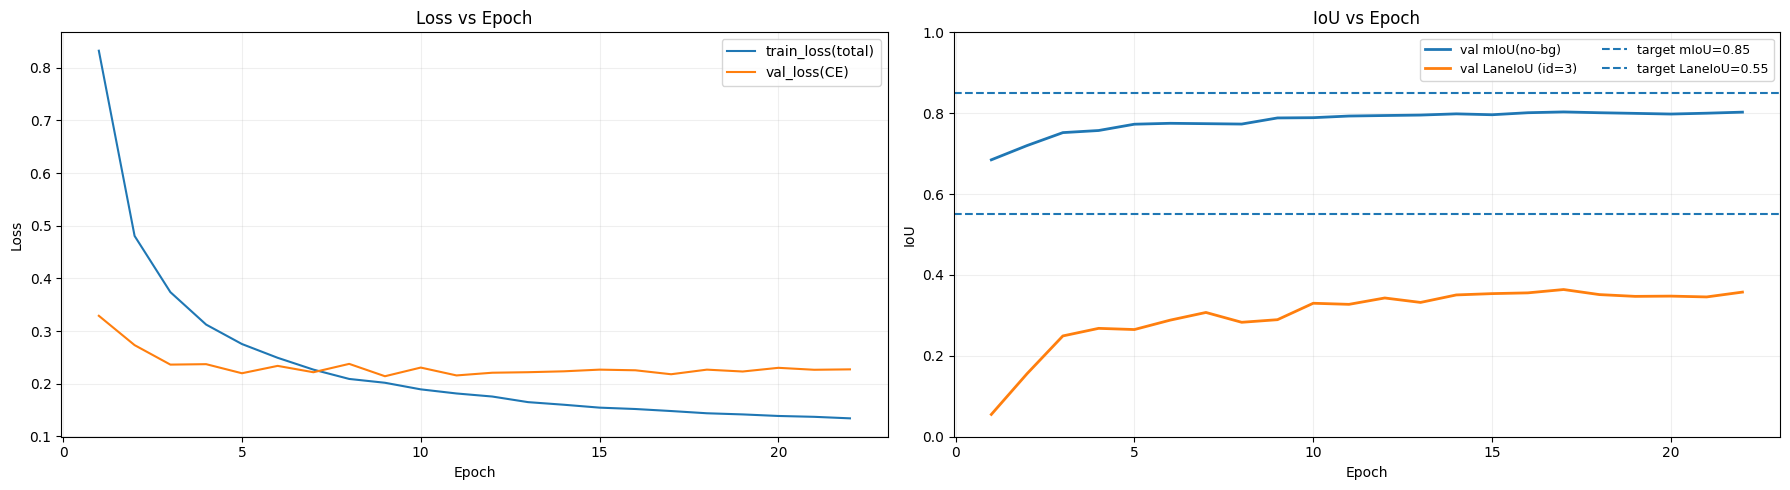


✅ WandB logging finished. Closing run...


Done!


In [54]:
# ============================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux) + Lane Dice
# WITH WANDB INTEGRATION
# ============================================================
# - WandB로 실험 추적, 하이퍼파라미터 기록, 메트릭 시각화
# - 모든 주요 메트릭(loss, mIoU, laneIoU 등) 실시간 로깅
# - Best model을 WandB artifact로 저장
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm
import wandb

# --------------------
# CONFIG
# --------------------
EPOCHS = 30
PATIENCE = 5

LR = 3e-4
WEIGHT_DECAY = 3e-4
LABEL_SMOOTH = 0.0

BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice.pt"

IGNORE_BG = True
PRINT_BG_IOU = False

TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55
LANE_TRAIN_ID = 3

# ---- Lane Embedding branch ----
EMB_DIM = 4
LAMBDA_EMB = 0.02
EMB_MARGIN = 1.0
EMB_MIN_PIXELS = 30

# ---- Lane Dice ----
BETA_DICE = 0.3
DICE_SMOOTH = 1.0

# ---- class weight lane boost ----
LANE_WEIGHT_BOOST = 2.0

# ---- EarlyStopping score ----
ALPHA_LANE = 0.5

# (선택) backbone warmup freeze
FREEZE_BACKBONE_WARMUP_EPOCHS = 0

# DEVICE is defined here
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(DEVICE)

# --------------------
# WANDB INITIALIZATION
# --------------------
wandb.init(
    entity="brad114-count-ai",  # ✅ 본인의 wandb entity로 변경
    project="deeplabv3-lane-segmentation",  # ✅ 프로젝트명 설정
    name=f"lane_emb_dice_lr{LR}_lmb{LAMBDA_EMB}_beta{BETA_DICE}",  # ✅ 실험명
    config={
        # 학습 설정
        "epochs": EPOCHS,
        "patience": PATIENCE,
        "learning_rate": LR,
        "weight_decay": WEIGHT_DECAY,
        "label_smoothing": LABEL_SMOOTH,

        # 모델 구조
        "architecture": "DeepLabV3+ResNet50",
        "num_classes": NUM_CLASSES,
        "emb_dim": EMB_DIM,

        # Lane 관련 하이퍼파라미터
        "lambda_emb": LAMBDA_EMB,
        "emb_margin": EMB_MARGIN,
        "emb_min_pixels": EMB_MIN_PIXELS,
        "beta_dice": BETA_DICE,
        "dice_smooth": DICE_SMOOTH,
        "lane_weight_boost": LANE_WEIGHT_BOOST,
        "alpha_lane": ALPHA_LANE,

        # 타겟
        "target_miou": TARGET_MIOU,
        "target_lane_iou": TARGET_LANE_IOU,
        "lane_train_id": LANE_TRAIN_ID,

        # 기타
        "freeze_backbone_warmup": FREEZE_BACKBONE_WARMUP_EPOCHS,
        "ignore_bg": IGNORE_BG,
    }
)

# --------------------
# CLASS NAME MAP
# --------------------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i + 1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# --------------------
# MODEL: DeepLabV3 + Lane Embedding Head
# --------------------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    """
    out["seg"]: (B, num_classes, H, W)
    out["emb"]: (B, emb_dim, H, W)
    """
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )

        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]

        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)

        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

# --------------------
# LOSS: Embedding regularization
# --------------------
def lane_embedding_loss_simple(emb, y, lane_id: int, margin: float = 1.0, min_pixels: int = 30):
    """
    - pull: lane 픽셀 임베딩을 lane_mean으로 응집
    - push: lane_mean과 non_mean이 margin 이상 떨어지도록(약하게)
    """
    B, D, H, W = emb.shape
    emb_hw = emb.permute(0, 2, 3, 1).contiguous().view(B, H * W, D)
    y_hw = y.view(B, H * W)

    total = emb.new_tensor(0.0)
    cnt = 0

    for b in range(B):
        lane_mask = (y_hw[b] == lane_id)
        non_mask = ~lane_mask

        if lane_mask.sum() < min_pixels or non_mask.sum() < min_pixels:
            continue

        lane_emb = emb_hw[b][lane_mask]
        non_emb = emb_hw[b][non_mask]

        lane_mean = lane_emb.mean(dim=0, keepdim=True)
        non_mean = non_emb.mean(dim=0, keepdim=True)

        pull = F.mse_loss(lane_emb, lane_mean.expand_as(lane_emb))
        dist = torch.norm(lane_mean - non_mean, p=2)
        push = F.relu(margin - dist)

        total = total + (0.1 * push) # pull은 제거하고 push만 남깁니다.
        cnt += 1

    if cnt == 0:
        return emb.new_tensor(0.0)
    return total / cnt

# --------------------
# LOSS: Lane Dice
# --------------------
def lane_dice_loss(seg_logits, y, lane_id: int, smooth: float = 1.0):
    """
    seg_logits: (B,C,H,W)
    y        : (B,H,W)
    -> lane class에 대해서만 soft dice loss
    """
    probs = torch.softmax(seg_logits, dim=1)[:, lane_id, :, :]
    gt = (y == lane_id).float()

    probs = probs.reshape(probs.size(0), -1)
    gt = gt.reshape(gt.size(0), -1)

    inter = (probs * gt).sum(dim=1)
    denom = probs.sum(dim=1) + gt.sum(dim=1)

    dice = (2.0 * inter + smooth) / (denom + smooth)
    return 1.0 - dice.mean()

# --------------------
# CRITERION (CE) + lane weight boost
# --------------------
use_class_weight = True
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
if w is not None:
    w = w.clone()
    if 0 <= LANE_TRAIN_ID < len(w):
        w[LANE_TRAIN_ID] = w[LANE_TRAIN_ID] * LANE_WEIGHT_BOOST

criterion_ce = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

def total_loss_fn(out, y):
    seg_logits = out["seg"]
    emb = out["emb"]

    loss_ce = criterion_ce(seg_logits, y)
    loss_dice = lane_dice_loss(seg_logits, y, lane_id=LANE_TRAIN_ID, smooth=DICE_SMOOTH)
    loss_emb = lane_embedding_loss_simple(emb, y, lane_id=LANE_TRAIN_ID, margin=EMB_MARGIN, min_pixels=EMB_MIN_PIXELS)

    loss_total = loss_ce + BETA_DICE * loss_dice + LAMBDA_EMB * loss_emb
    return loss_total, loss_ce.detach(), loss_dice.detach(), loss_emb.detach()

# --------------------
# OPT / SCHED
# --------------------
model = DeepLabV3_WithLaneEmbedding(NUM_CLASSES, EMB_DIM, backbone_pretrained=True, dropout_p=0.1).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

# ✅ WandB: 모델 그래디언트 추적 (선택사항)
wandb.watch(model, log="all", log_freq=100)

def set_backbone_trainable(model, trainable: bool):
    for p in model.base.backbone.parameters():
        p.requires_grad = trainable

# --------------------
# TRAIN ONE EPOCH
# --------------------
def train_one_epoch(model, loader, optimizer, total_loss_fn, device, desc="train"):
    model.train()
    total_loss_sum = 0.0
    ce_sum = 0.0
    dice_sum = 0.0
    emb_sum = 0.0
    cnt = 0

    pbar = tqdm(loader, desc=desc, leave=False)
    for x, y in pbar:
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        optimizer.zero_grad()
        out = model(x)
        loss_total, loss_ce, loss_dice, loss_emb = total_loss_fn(out, y)
        loss_total.backward()
        optimizer.step()

        bs = x.size(0)
        total_loss_sum += float(loss_total.item()) * bs
        ce_sum += float(loss_ce.item()) * bs
        dice_sum += float(loss_dice.item()) * bs
        emb_sum += float(loss_emb.item()) * bs
        cnt += bs

        pbar.set_postfix({
            "loss": f"{loss_total.item():.4f}",
            "ce": f"{loss_ce.item():.4f}",
            "dice": f"{loss_dice.item():.4f}",
            "emb": f"{loss_emb.item():.4f}"
        })

    avg_loss = total_loss_sum / max(cnt, 1)
    avg_ce = ce_sum / max(cnt, 1)
    avg_dice = dice_sum / max(cnt, 1)
    avg_emb = emb_sum / max(cnt, 1)

    return avg_loss, avg_ce, avg_dice, avg_emb

# --------------------
# VALIDATE
# --------------------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def validate(model, loader, num_classes, criterion_ce, ignore_bg=True, desc="val"):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    loss_sum = 0.0
    cnt = 0

    for x, y in tqdm(loader, desc=desc, leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out_dict = model(x)
        seg = out_dict["seg"]
        loss = criterion_ce(seg, y)
        loss_sum += float(loss.item())
        cnt += 1

        pred = seg.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist_f = hist.float()
    diag = torch.diag(hist_f)
    denom = (hist_f.sum(1) + hist_f.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    avg_loss = loss_sum / max(cnt, 1)

    return avg_loss, miou, iou

# --------------------
# EARLY STOPPING
# --------------------
class EarlyStopping:
    def __init__(self, patience=5, mode="max", delta=0.0):
        self.patience = patience
        self.mode = mode
        self.delta = delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False
        self.best_epoch = 0

    def __call__(self, score, epoch):
        if self.best_score is None:
            self.best_score = score
            self.best_epoch = epoch
            return True

        improved = False
        if self.mode == "max":
            improved = (score >= self.best_score + self.delta)
        else:
            improved = (score <= self.best_score - self.delta)

        if improved:
            self.best_score = score
            self.best_epoch = epoch
            self.counter = 0
            return True
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
            return False

# --------------------
# TRAINING LOOP WITH WANDB LOGGING
# --------------------
early_stopping = EarlyStopping(patience=PATIENCE, mode="max", delta=0.0)

history = {
    "epoch": [],
    "train_loss": [],
    "train_ce": [],
    "train_dice": [],
    "train_emb": [],
    "val_loss": [],
    "val_miou": [],
    "val_iou_per_class": [],
    "lane_dice_w": [],
}

# warmup freeze
if FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
    set_backbone_trainable(model, trainable=False)
    print(f"✅ Backbone frozen for first {FREEZE_BACKBONE_WARMUP_EPOCHS} epochs (warmup)")

for ep in range(1, EPOCHS + 1):
    # unfreeze after warmup
    if ep == FREEZE_BACKBONE_WARMUP_EPOCHS + 1 and FREEZE_BACKBONE_WARMUP_EPOCHS > 0:
        set_backbone_trainable(model, trainable=True)
        print(f"✅ Backbone unfrozen at epoch {ep}")

    # train
    tr_loss, tr_ce, tr_dice, tr_emb = train_one_epoch(
        model, train_loader, optimizer, total_loss_fn, device, desc=f"train {ep}/{EPOCHS}"
    )

    # validate
    va_loss, va_miou, va_iou_pc = validate(
        model, val_loader, NUM_CLASSES, criterion_ce, ignore_bg=IGNORE_BG, desc=f"val {ep}/{EPOCHS}"
    )

    lane_iou = float(va_iou_pc[LANE_TRAIN_ID])
    w_dice_score = va_miou + ALPHA_LANE * lane_iou

    scheduler.step()
    current_lr = optimizer.param_groups[0]["lr"]

    # ✅ WANDB LOGGING - 모든 메트릭 기록
    wandb.log({
        "epoch": ep,
        "learning_rate": current_lr,

        # Train metrics
        "train/loss_total": tr_loss,
        "train/loss_ce": tr_ce,
        "train/loss_dice": tr_dice,
        "train/loss_emb": tr_emb,

        # Validation metrics
        "val/loss_ce": va_loss,
        "val/miou_no_bg": va_miou,
        "val/lane_iou": lane_iou,
        "val/weighted_score": w_dice_score,

        # Per-class IoU (선택사항)
        **{f"val/iou_class_{i}": float(va_iou_pc[i]) for i in range(NUM_CLASSES)},

        # Targets (비교용)
        "target/miou": TARGET_MIOU,
        "target/lane_iou": TARGET_LANE_IOU,
    })

    # history 저장
    history["epoch"].append(ep)
    history["train_loss"].append(tr_loss)
    history["train_ce"].append(tr_ce)
    history["train_dice"].append(tr_dice)
    history["train_emb"].append(tr_emb)
    history["val_loss"].append(va_loss)
    history["val_miou"].append(va_miou)
    history["val_iou_per_class"].append(va_iou_pc)
    history["lane_dice_w"].append(w_dice_score)

    # print
    print(
        f"[{ep:2d}/{EPOCHS}] "
        f"trLoss={tr_loss:.4f}(CE={tr_ce:.4f},Dice={tr_dice:.4f},Emb={tr_emb:.4f}) | "
        f"valLoss={va_loss:.4f} | mIoU={va_miou:.4f} | laneIoU={lane_iou:.4f} | "
        f"wScore={w_dice_score:.4f} | LR={current_lr:.2e}"
    )

    # early stopping check
    is_best = early_stopping(w_dice_score, ep)
    if is_best:
        save_dict = {
            "epoch": ep,
            "model": model.state_dict(),
            "optimizer": optimizer.state_dict(),
            "scheduler": scheduler.state_dict(),
            "score": w_dice_score,
            "miou": va_miou,
            "lane_iou": lane_iou,
            "emb_dim": EMB_DIM,
        }
        if "id2train" in globals():
            save_dict["id2train"] = id2train
        torch.save(save_dict, BEST_PATH)
        print(f"  ✅ Best model saved (wScore={w_dice_score:.4f})")

        # ✅ WANDB: Best model artifact 저장
        artifact = wandb.Artifact(
            name=f"model-best",
            type="model",
            description=f"Best model at epoch {ep} with wScore={w_dice_score:.4f}"
        )
        artifact.add_file(BEST_PATH)
        wandb.log_artifact(artifact)

    if early_stopping.early_stop:
        print(f"⚠️  Early stopped at epoch {ep} (best={early_stopping.best_epoch})")
        break

print("\n" + "=" * 60)
print("TRAINING FINISHED")
print(f"Best epoch: {early_stopping.best_epoch} | Best wScore: {early_stopping.best_score:.4f}")
print("=" * 60)

# ✅ WANDB: 최종 요약 메트릭
wandb.run.summary["best_epoch"] = early_stopping.best_epoch
wandb.run.summary["best_weighted_score"] = early_stopping.best_score
wandb.run.summary["final_miou"] = history["val_miou"][-1]
wandb.run.summary["final_lane_iou"] = history["val_iou_per_class"][-1][LANE_TRAIN_ID]

# --------------------
# FINAL VALIDATION (BEST MODEL)
# --------------------
print("\n🔍 Loading best model for final validation...")
ckpt = torch.load(BEST_PATH, map_location=device)
model.load_state_dict(ckpt["model"], strict=True)

va_loss, va_miou, va_iou_pc = validate(
    model, val_loader, NUM_CLASSES, criterion_ce, ignore_bg=IGNORE_BG, desc="final val"
)
lane_iou = float(va_iou_pc[LANE_TRAIN_ID])

print(f"\n{'=' * 60}")
print(f"BEST MODEL VALIDATION (epoch {early_stopping.best_epoch})")
print(f"{'=' * 60}")
tag = "no-bg" if IGNORE_BG else "with-bg"
print(f"val loss(CE)         : {va_loss:.4f}")
print(f"val mIoU({tag:7s})    : {va_miou:.4f}")
print(f"val laneIoU(id={LANE_TRAIN_ID})   : {lane_iou:.4f}")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU}")
print(f"{'=' * 60}\n")

# Per-class IoU
start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = va_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name}: {txt}")

# ✅ WANDB: 최종 검증 결과 로깅
wandb.log({
    "final_validation/loss_ce": va_loss,
    "final_validation/miou": va_miou,
    "final_validation/lane_iou": lane_iou,
})

# --------------------
# VISUALIZATION WITH WANDB
# --------------------
epochs = np.array(history["epoch"])
train_loss = np.array(history["train_loss"])
val_loss_arr = np.array(history["val_loss"])
val_miou_hist = np.array(history["val_miou"])
val_iou_stack = np.stack(history["val_iou_per_class"], axis=0)
lane_iou_hist = val_iou_stack[:, LANE_TRAIN_ID]
w_dice_hist = np.array(history["lane_dice_w"])

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Loss plot
axes[0].plot(epochs, train_loss, label="train_loss(total)")
axes[0].plot(epochs, val_loss_arr, label="val_loss(CE)")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs Epoch")
axes[0].grid(True, alpha=0.2)
axes[0].legend()

# IoU plot
axes[1].plot(epochs, val_miou_hist, linewidth=2, label="val mIoU(no-bg)")
axes[1].plot(epochs, lane_iou_hist, linewidth=2, label=f"val LaneIoU (id={LANE_TRAIN_ID})")
axes[1].axhline(TARGET_MIOU, linestyle="--", linewidth=1.5, label=f"target mIoU={TARGET_MIOU}")
axes[1].axhline(TARGET_LANE_IOU, linestyle="--", linewidth=1.5, label=f"target LaneIoU={TARGET_LANE_IOU}")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("IoU")
axes[1].set_title("IoU vs Epoch")
axes[1].set_ylim(0.0, 1.0)
axes[1].grid(True, alpha=0.2)
axes[1].legend(ncol=2, fontsize=9)

plt.tight_layout()

# ✅ WANDB: 학습 곡선 이미지 로깅
wandb.log({"training_curves": wandb.Image(fig)})
plt.savefig("training_curves.png", dpi=150, bbox_inches="tight")
plt.show()

# ✅ WANDB: 학습 완료 - 세션 종료
print("\n✅ WandB logging finished. Closing run...")
wandb.finish()
print("Done!")

평가 코드

📂 Loading best model from: best_deeplabv3_r50_laneemb_laneDice.pt
✅ Model loaded successfully (emb_dim=4)

🔬 Running test set evaluation...


test:   0%|          | 0/5 [00:00<?, ?it/s]


TEST SET EVALUATION RESULTS
Test Loss (CE)       : 0.1587
Test mIoU (no-bg  )  : 0.8404
Test LaneIoU (id=3): 0.5643
Targets: mIoU>=0.85, LaneIoU>=0.55

Per-class IoU:
  IoU[1] Undrivable          : 0.9534
  IoU[2] Road                : 0.8964
  IoU[3] Lane Mark           : 0.5643
  IoU[4] Moveable            : 0.7368
  IoU[5] My bike             : 0.9536
  IoU[6] Rider               : 0.9375

📊 Generating confusion matrix...


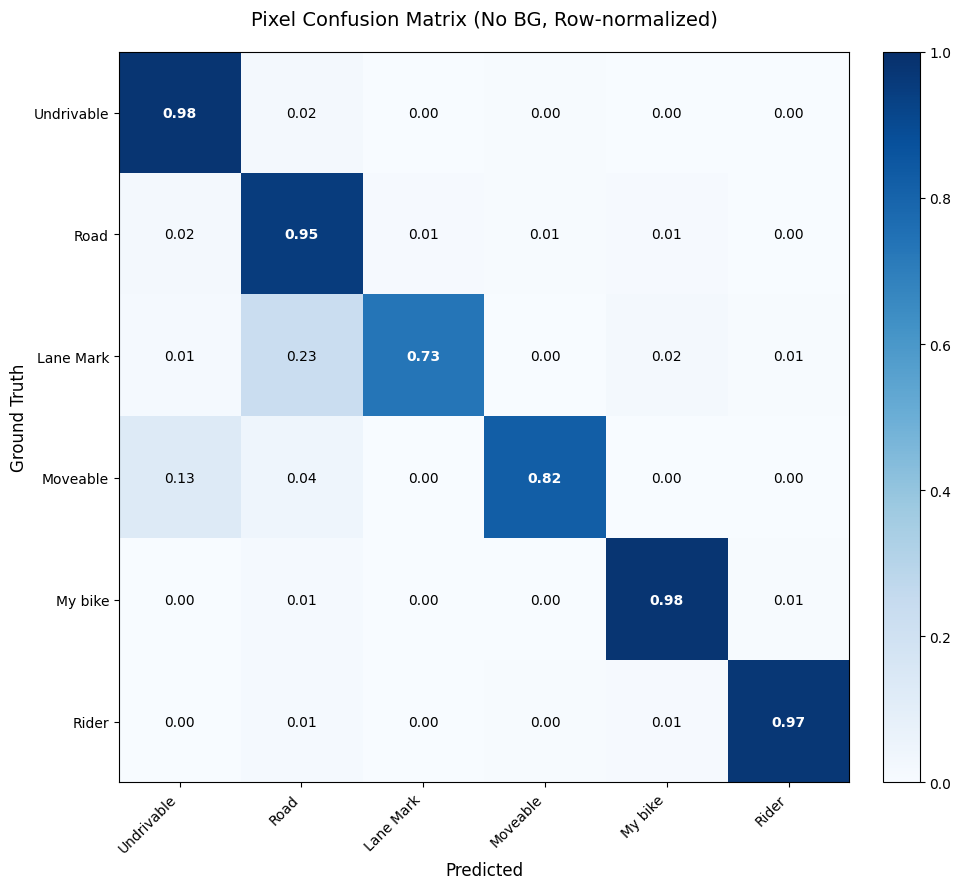


📈 Computing additional metrics...
  Undrivable           - P: 0.9741, R: 0.9782, F1: 0.9762
  Road                 - P: 0.9381, R: 0.9529, F1: 0.9454
  Lane Mark            - P: 0.7114, R: 0.7318, F1: 0.7215
  Moveable             - P: 0.8758, R: 0.8228, F1: 0.8485
  My bike              - P: 0.9741, R: 0.9784, F1: 0.9763
  Rider                - P: 0.9654, R: 0.9701, F1: 0.9678

Mean Precision (no-bg): 0.9065
Mean Recall (no-bg)   : 0.9057
Mean F1 (no-bg)       : 0.9059

🖼️  Visualizing sample predictions...


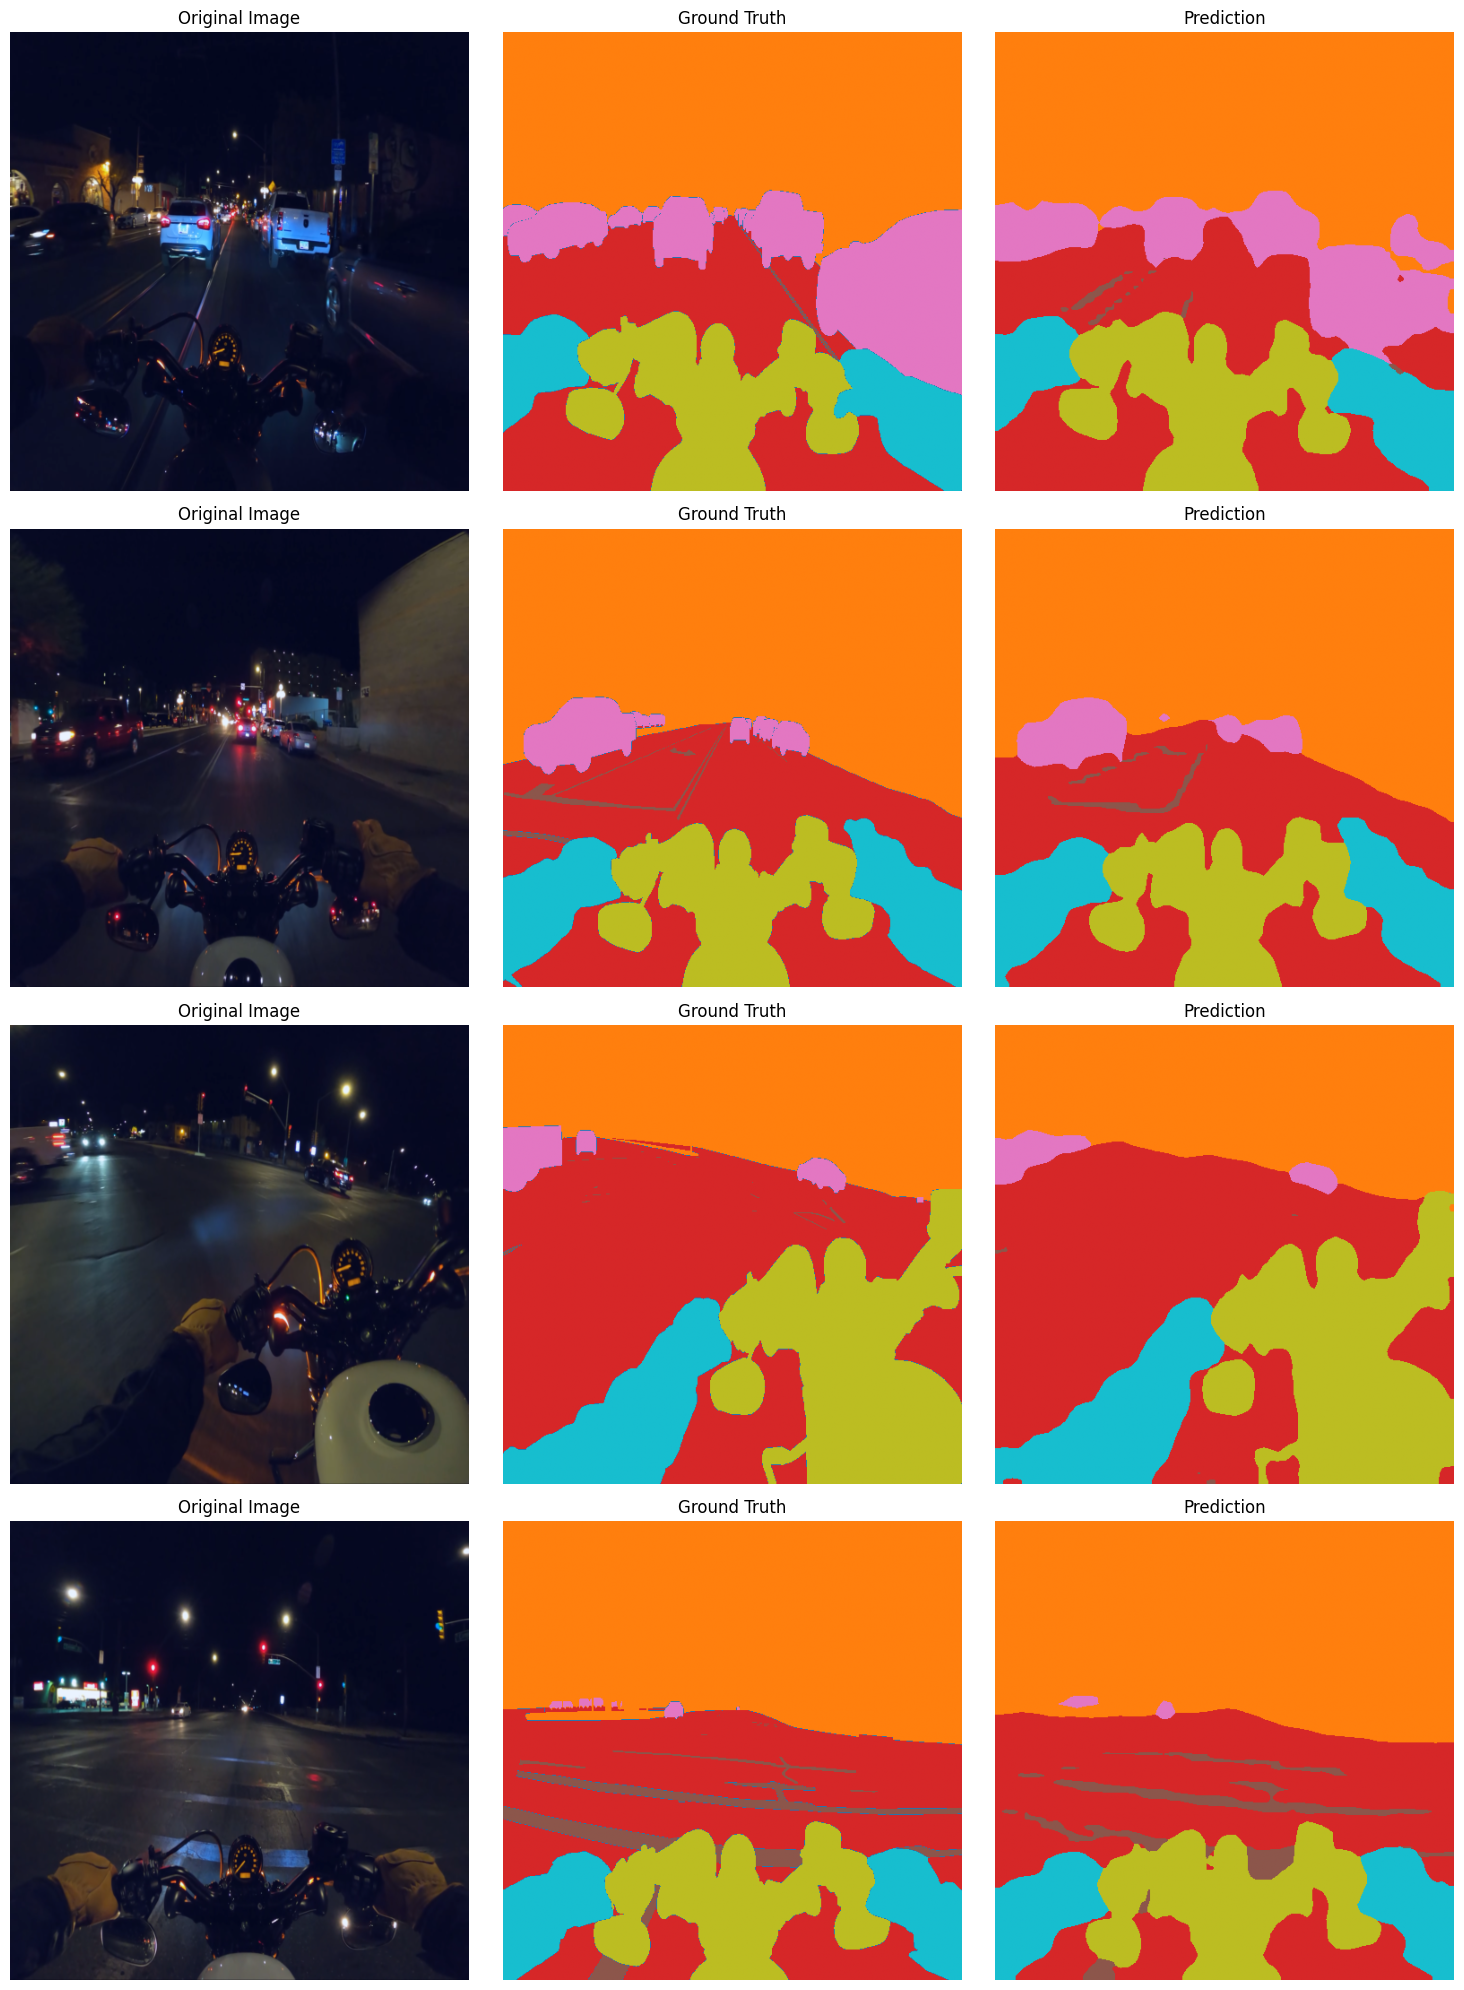


✅ Evaluation complete!
📊 All results have been logged to WandB
🔗 View results at: https://wandb.ai/brad114-count-ai/deeplabv3-lane-segmentation/runs/id6p67bt



✅ WandB evaluation run finished!


In [56]:
# ============================================================
# DeepLabV3+ResNet50 + Lane Embedding Head (Aux) + LaneDice
# TEST/EVALUATION WITH WANDB INTEGRATION
# ============================================================
# - Best model 로드 후 test set 평가
# - Confusion matrix 생성 및 WandB 로깅
# - 모든 메트릭을 WandB에 기록
# ============================================================

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.models.segmentation import deeplabv3_resnet50
from tqdm.auto import tqdm
import wandb

# ---------- CONFIG ----------
BEST_PATH = "best_deeplabv3_r50_laneemb_laneDice.pt"  # ✅ 학습 때 저장한 best 경로

IGNORE_BG = True
PRINT_BG_IOU = False

LANE_TRAIN_ID = 3
TARGET_MIOU = 0.85
TARGET_LANE_IOU = 0.55

LABEL_SMOOTH = 0.0
use_class_weight = True

device = torch.device(DEVICE)

# ---------- WANDB INITIALIZATION FOR EVALUATION ----------
# ✅ 학습 시 사용한 run을 resume하거나, 새로운 evaluation run 생성
wandb.init(
    entity="brad114-count-ai",  # ✅ 본인의 wandb entity
    project="deeplabv3-lane-segmentation",  # ✅ 동일한 프로젝트
    name="evaluation-test-set",  # ✅ 평가 run 이름
    job_type="evaluation",  # ✅ job type 지정
    config={
        "model_path": BEST_PATH,
        "num_classes": NUM_CLASSES,
        "lane_train_id": LANE_TRAIN_ID,
        "ignore_bg": IGNORE_BG,
        "target_miou": TARGET_MIOU,
        "target_lane_iou": TARGET_LANE_IOU,
    }
)

# ---------- CLASS NAME MAP ----------
train2name = {0: "background"}
try:
    id2name = {c["id"]: c["name"] for c in coco.cats.values()}
    cat_ids = sorted(coco.getCatIds())
    train2name.update({i + 1: id2name[cid] for i, cid in enumerate(cat_ids)})
except Exception:
    pass

# ---------- MODEL DEFINITION ----------
class DeepLabV3_WithLaneEmbedding(nn.Module):
    """
    out["seg"]: (B, num_classes, H, W)
    out["emb"]: (B, emb_dim, H, W)
    """
    def __init__(self, num_classes: int, emb_dim: int = 4, backbone_pretrained=True, dropout_p=0.1):
        super().__init__()
        self.base = deeplabv3_resnet50(
            weights=None,
            weights_backbone="DEFAULT" if backbone_pretrained else None
        )

        cls_children = list(self.base.classifier.children())
        self.feat_extractor = nn.Sequential(*cls_children[:-1])

        last = cls_children[-1]
        in_ch = getattr(last, "in_channels", 256)
        self.seg_head = nn.Conv2d(in_ch, num_classes, kernel_size=1)
        self.base.classifier = nn.Sequential(*cls_children[:-1], self.seg_head)

        self.embed_head = nn.Sequential(
            nn.Conv2d(256, 256, 3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout2d(dropout_p),
            nn.Conv2d(256, emb_dim, 1),
        )

    def forward(self, x):
        input_shape = x.shape[-2:]
        feats = self.base.backbone(x)
        x_out = feats["out"]
        feat256 = self.feat_extractor(x_out)
        seg = self.seg_head(feat256)
        emb = self.embed_head(feat256)

        seg = F.interpolate(seg, size=input_shape, mode="bilinear", align_corners=False)
        emb = F.interpolate(emb, size=input_shape, mode="bilinear", align_corners=False)
        return {"seg": seg, "emb": emb}

# ---------- LOSS (for reporting) ----------
w = class_weights.to(device) if ("class_weights" in globals() and use_class_weight) else None
criterion = nn.CrossEntropyLoss(weight=w, label_smoothing=LABEL_SMOOTH)

# ---------- LOAD BEST MODEL ----------
print(f"📂 Loading best model from: {BEST_PATH}")
ckpt = torch.load(BEST_PATH, map_location=device)

# emb_dim 추론
EMB_DIM = int(ckpt.get("emb_dim", 4)) if isinstance(ckpt, dict) else 4

model = DeepLabV3_WithLaneEmbedding(
    num_classes=NUM_CLASSES,
    emb_dim=EMB_DIM,
    backbone_pretrained=True,
    dropout_p=0.1
).to(device)

# 저장 포맷 방어
state = ckpt["model"] if isinstance(ckpt, dict) and "model" in ckpt else ckpt
model.load_state_dict(state, strict=True)
model.eval()

print(f"✅ Model loaded successfully (emb_dim={EMB_DIM})")

# ✅ WANDB: 모델 checkpoint artifact 다운로드 (선택사항)
# 학습 시 저장한 artifact를 사용하려면:
# artifact = wandb.use_artifact('model-best:latest', type='model')
# artifact_dir = artifact.download()
# BEST_PATH = artifact_dir + "/best_deeplabv3_r50_laneemb_laneDice.pt"

# ---------- EVALUATION METRICS ----------
@torch.no_grad()
def fast_hist(pred, target, num_classes):
    k = (target >= 0) & (target < num_classes)
    return torch.bincount(
        (num_classes * target[k] + pred[k]).to(torch.int64),
        minlength=num_classes**2
    ).reshape(num_classes, num_classes)

@torch.no_grad()
def evaluate_test(model, loader, num_classes, ignore_bg=True):
    model.eval()
    hist = torch.zeros((num_classes, num_classes), dtype=torch.int64)
    total_loss = 0.0
    n = 0

    for x, y in tqdm(loader, desc="test", leave=False):
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)["seg"]
        loss = criterion(out, y)
        total_loss += float(loss.item())
        n += 1

        pred = out.argmax(dim=1)
        for b in range(pred.size(0)):
            hist += fast_hist(pred[b].cpu(), y[b].cpu(), num_classes)

    hist_f = hist.float()
    diag = torch.diag(hist_f)
    denom = (hist_f.sum(1) + hist_f.sum(0) - diag).clamp(min=1.0)
    iou = (diag / denom).cpu().numpy()

    miou = float(np.nanmean(iou[1:])) if ignore_bg else float(np.nanmean(iou))
    avg_loss = total_loss / max(n, 1)

    return avg_loss, miou, iou, hist.cpu().numpy()

# ---------- RUN TEST EVALUATION ----------
print("\n🔬 Running test set evaluation...")
test_loss, test_miou, test_iou_pc, test_hist = evaluate_test(
    model, test_loader, NUM_CLASSES, ignore_bg=IGNORE_BG
)
lane_iou = float(test_iou_pc[LANE_TRAIN_ID])

# ---------- PRINT RESULTS ----------
print(f"\n{'=' * 70}")
print("TEST SET EVALUATION RESULTS")
print(f"{'=' * 70}")
tag = "no-bg" if IGNORE_BG else "with-bg"
print(f"Test Loss (CE)       : {test_loss:.4f}")
print(f"Test mIoU ({tag:7s})  : {test_miou:.4f}")
print(f"Test LaneIoU (id={LANE_TRAIN_ID}): {lane_iou:.4f}")
print(f"Targets: mIoU>={TARGET_MIOU}, LaneIoU>={TARGET_LANE_IOU}")
print(f"{'=' * 70}\n")

# Per-class IoU
print("Per-class IoU:")
start_cid = 0 if PRINT_BG_IOU else 1
for cid in range(start_cid, NUM_CLASSES):
    name = train2name.get(cid, str(cid))
    v = test_iou_pc[cid]
    txt = "nan" if np.isnan(v) else f"{v:.4f}"
    print(f"  IoU[{cid}] {name:20s}: {txt}")

# ✅ WANDB: Test 메트릭 로깅
wandb.log({
    "test/loss_ce": test_loss,
    "test/miou": test_miou,
    "test/lane_iou": lane_iou,
    **{f"test/iou_class_{i}": float(test_iou_pc[i]) for i in range(NUM_CLASSES)},
})

# Summary metrics
wandb.run.summary["test_loss"] = test_loss
wandb.run.summary["test_miou"] = test_miou
wandb.run.summary["test_lane_iou"] = lane_iou

# ============================================================
# CONFUSION MATRIX (No BG)
# ============================================================
print("\n📊 Generating confusion matrix...")

cm_no_bg = test_hist[1:, 1:].astype(np.float32)

# Row-normalize
row_sum = cm_no_bg.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm_no_bg, row_sum, where=row_sum != 0)

class_names = [train2name.get(i, str(i)) for i in range(1, NUM_CLASSES)]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 9))
im = ax.imshow(cm_norm, cmap="Blues", vmin=0.0, vmax=1.0)

ax.set_title("Pixel Confusion Matrix (No BG, Row-normalized)", fontsize=14, pad=20)
ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Ground Truth", fontsize=12)

# Add text annotations
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        text_color = "white" if cm_norm[i, j] > 0.5 else "black"
        ax.text(
            j, i, f"{cm_norm[i, j]:.2f}",
            ha="center", va="center",
            color=text_color,
            fontsize=10,
            weight="bold" if i == j else "normal"
        )

ax.set_xticks(range(len(class_names)))
ax.set_yticks(range(len(class_names)))
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.set_yticklabels(class_names)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=150, bbox_inches="tight")

# ✅ WANDB: Confusion matrix 로깅
wandb.log({
    "test/confusion_matrix": wandb.Image(fig),
    "test/confusion_matrix_raw": wandb.plot.confusion_matrix(
        probs=None,
        y_true=None,
        preds=None,
        class_names=class_names,
        title="Confusion Matrix (No BG)"
    ) if False else None  # 실제 데이터로 대체 필요 시 수정
})

plt.show()

# ============================================================
# 추가 분석: Per-class Precision, Recall, F1
# ============================================================
print("\n📈 Computing additional metrics...")

# Precision, Recall, F1 계산 (background 제외)
precision_per_class = []
recall_per_class = []
f1_per_class = []

for i in range(1, NUM_CLASSES):
    TP = test_hist[i, i]
    FP = test_hist[:, i].sum() - TP
    FN = test_hist[i, :].sum() - TP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    precision_per_class.append(precision)
    recall_per_class.append(recall)
    f1_per_class.append(f1)

    print(f"  {train2name.get(i, str(i)):20s} - P: {precision:.4f}, R: {recall:.4f}, F1: {f1:.4f}")

# ✅ WANDB: 상세 메트릭 로깅
for i, cid in enumerate(range(1, NUM_CLASSES)):
    name = train2name.get(cid, str(cid))
    wandb.log({
        f"test_metrics/{name}/precision": precision_per_class[i],
        f"test_metrics/{name}/recall": recall_per_class[i],
        f"test_metrics/{name}/f1": f1_per_class[i],
    })

# 평균 메트릭
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1 = np.mean(f1_per_class)

print(f"\n{'=' * 70}")
print(f"Mean Precision (no-bg): {mean_precision:.4f}")
print(f"Mean Recall (no-bg)   : {mean_recall:.4f}")
print(f"Mean F1 (no-bg)       : {mean_f1:.4f}")
print(f"{'=' * 70}")

wandb.log({
    "test/mean_precision": mean_precision,
    "test/mean_recall": mean_recall,
    "test/mean_f1": mean_f1,
})

# ============================================================
# VISUALIZE SAMPLE PREDICTIONS (선택사항)
# ============================================================
print("\n🖼️  Visualizing sample predictions...")

@torch.no_grad()
def visualize_predictions(model, loader, num_samples=4):
    model.eval()
    samples = []

    for x, y in loader:
        if len(samples) >= num_samples:
            break

        x = x.to(device)
        pred = model(x)["seg"].argmax(dim=1)

        for i in range(min(x.size(0), num_samples - len(samples))):
            samples.append({
                "image": x[i].cpu(),
                "gt": y[i].cpu(),
                "pred": pred[i].cpu()
            })

    return samples

samples = visualize_predictions(model, test_loader, num_samples=4)

fig, axes = plt.subplots(len(samples), 3, figsize=(15, 5 * len(samples)))
if len(samples) == 1:
    axes = axes.reshape(1, -1)

for idx, sample in enumerate(samples):
    # Original image
    img = sample["image"].permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())
    axes[idx, 0].imshow(img)
    axes[idx, 0].set_title("Original Image")
    axes[idx, 0].axis("off")

    # Ground truth
    axes[idx, 1].imshow(sample["gt"].numpy(), cmap="tab10", vmin=0, vmax=NUM_CLASSES-1)
    axes[idx, 1].set_title("Ground Truth")
    axes[idx, 1].axis("off")

    # Prediction
    axes[idx, 2].imshow(sample["pred"].numpy(), cmap="tab10", vmin=0, vmax=NUM_CLASSES-1)
    axes[idx, 2].set_title("Prediction")
    axes[idx, 2].axis("off")

plt.tight_layout()
plt.savefig("sample_predictions.png", dpi=150, bbox_inches="tight")

# ✅ WANDB: 샘플 예측 결과 로깅
wandb.log({"test/sample_predictions": wandb.Image(fig)})

plt.show()

# ============================================================
# FINISH WANDB RUN
# ============================================================
print("\n✅ Evaluation complete!")
print("📊 All results have been logged to WandB")
print(f"🔗 View results at: {wandb.run.get_url()}")

wandb.finish()
print("\n✅ WandB evaluation run finished!")


평가 실행


In [ ]:
# DeepLabV3 + Lane Embedding with WandB Integration

## 📋 개요

이 프로젝트는 DeepLabV3+ResNet50 기반의 Lane Segmentation 모델에 WandB(Weights & Biases)를 통합하여 실험 추적, 메트릭 시각화, 모델 관리를 자동화합니다.

### 주요 특징

- **DeepLabV3+ResNet50**: 강력한 세그멘테이션 백본
- **Lane Embedding Head**: Lane 클래스 특화 임베딩 정규화
- **Lane Dice Loss**: 얇은 Lane 픽셀 강화를 위한 Dice 손실
- **WandB 통합**: 실시간 실험 추적 및 시각화

## 📁 파일 구조

```
.
├── deeplabv3_lane_with_wandb.py           # 학습 코드 (WandB 통합)
├── deeplabv3_lane_evaluation_with_wandb.py # 평가 코드 (WandB 통합)
└── README.md                               # 이 문서
```

## 🚀 시작하기

### 1. WandB 설치 및 로그인

```bash
pip install wandb

# WandB 로그인 (최초 1회)
wandb login
```

### 2. WandB 설정 수정

코드의 다음 부분을 본인의 설정으로 변경하세요:

```python
wandb.init(
    entity="brad114-count-ai",  # ✅ 본인의 wandb username 또는 team name
    project="deeplabv3-lane-segmentation",  # ✅ 프로젝트 이름
    name=f"lane_emb_dice_lr{LR}_lmb{LAMBDA_EMB}_beta{BETA_DICE}",  # 실험명
    ...
)
```

### 3. 학습 실행

```python
# 필요한 변수들이 정의되어 있어야 합니다:
# - DEVICE: "cuda" 또는 "cpu"
# - NUM_CLASSES: 클래스 개수 (예: 7)
# - train_loader, val_loader: 데이터 로더
# - coco: COCO 데이터셋 객체 (선택사항)
# - class_weights: 클래스별 가중치 (선택사항)

# 학습 실행
%run deeplabv3_lane_with_wandb.py
```

### 4. 평가 실행

```python
# 학습 완료 후 best model로 평가
%run deeplabv3_lane_evaluation_with_wandb.py
```

## 📊 WandB에서 추적되는 메트릭

### 학습 중 기록되는 메트릭

#### 기본 메트릭
- `epoch`: 현재 에폭
- `learning_rate`: 현재 학습률

#### 학습 손실
- `train/loss_total`: 전체 학습 손실
- `train/loss_ce`: Cross Entropy 손실
- `train/loss_dice`: Lane Dice 손실
- `train/loss_emb`: Embedding 정규화 손실

#### 검증 메트릭
- `val/loss_ce`: 검증 Cross Entropy 손실
- `val/miou_no_bg`: Background 제외 mean IoU
- `val/lane_iou`: Lane 클래스 IoU
- `val/weighted_score`: mIoU + α × laneIoU (Early Stopping 기준)
- `val/iou_class_0` ~ `val/iou_class_N`: 클래스별 IoU

#### 타겟 메트릭 (비교용)
- `target/miou`: 목표 mIoU 값
- `target/lane_iou`: 목표 Lane IoU 값

### 평가 시 기록되는 메트릭

#### Test 메트릭
- `test/loss_ce`: Test set CE 손실
- `test/miou`: Test set mean IoU
- `test/lane_iou`: Test set Lane IoU
- `test/iou_class_0` ~ `test/iou_class_N`: 클래스별 IoU

#### 상세 메트릭 (클래스별)
- `test_metrics/{class_name}/precision`: 정밀도
- `test_metrics/{class_name}/recall`: 재현율
- `test_metrics/{class_name}/f1`: F1 점수

#### 평균 메트릭
- `test/mean_precision`: 평균 정밀도
- `test/mean_recall`: 평균 재현율
- `test/mean_f1`: 평균 F1 점수

### 시각화

#### 학습 곡선
- `training_curves`: Loss 및 IoU 추이 그래프

#### Confusion Matrix
- `test/confusion_matrix`: 혼동 행렬 (배경 제외)

#### 샘플 예측
- `test/sample_predictions`: 원본/GT/예측 비교

## ⚙️ 주요 하이퍼파라미터

### 학습 기본 설정
```python
EPOCHS = 30                  # 최대 에폭 수
PATIENCE = 5                 # Early stopping patience
LR = 3e-4                    # 학습률
WEIGHT_DECAY = 3e-4          # Weight decay
LABEL_SMOOTH = 0.0           # Label smoothing
```

### Lane 특화 설정
```python
LAMBDA_EMB = 0.02            # Embedding loss 가중치 (0.01~0.05 권장)
EMB_MARGIN = 1.0             # Embedding push margin
EMB_MIN_PIXELS = 30          # Lane 픽셀 최소값 (적으면 skip)

BETA_DICE = 0.3              # Dice loss 가중치 (0.2~0.5 권장)
DICE_SMOOTH = 1.0            # Dice smooth factor

LANE_WEIGHT_BOOST = 2.0      # Lane 클래스 가중치 부스트 (1.5~2.5 권장)
ALPHA_LANE = 0.5             # Early stopping에서 lane IoU 반영 계수 (0.3~0.7 권장)
```

### 타겟 메트릭
```python
TARGET_MIOU = 0.85           # 목표 mIoU
TARGET_LANE_IOU = 0.55       # 목표 Lane IoU
LANE_TRAIN_ID = 3            # Lane 클래스 ID
```

## 🔄 원본 코드와의 주요 차이점

### 추가된 기능

1. **WandB 초기화**
   ```python
   wandb.init(...)  # 실험 추적 시작
   wandb.watch(model, log="all", log_freq=100)  # 모델 그래디언트 추적
   ```

2. **실시간 메트릭 로깅**
   ```python
   wandb.log({
       "epoch": ep,
       "train/loss_total": tr_loss,
       "val/miou_no_bg": va_miou,
       ...
   })
   ```

3. **Best Model Artifact 저장**
   ```python
   artifact = wandb.Artifact(name=f"model-best", type="model", ...)
   artifact.add_file(BEST_PATH)
   wandb.log_artifact(artifact)
   ```

4. **시각화 자동 업로드**
   ```python
   wandb.log({"training_curves": wandb.Image(fig)})
   wandb.log({"test/confusion_matrix": wandb.Image(fig)})
   ```

5. **Summary 메트릭**
   ```python
   wandb.run.summary["best_epoch"] = early_stopping.best_epoch
   wandb.run.summary["best_weighted_score"] = early_stopping.best_score
   ```

6. **실험 종료**
   ```python
   wandb.finish()  # 세션 종료 및 데이터 업로드 완료
   ```

### 변경되지 않은 부분

- 모델 구조 (DeepLabV3_WithLaneEmbedding)
- Loss 함수 (CE + Dice + Embedding)
- 학습/검증 로직
- Early Stopping 메커니즘
- 데이터 처리 파이프라인

## 📈 WandB 대시보드 활용

### 1. 실험 비교
- 여러 하이퍼파라미터 조합을 실험하고 비교
- Parallel Coordinates Plot으로 최적 조합 탐색

### 2. 실시간 모니터링
- 학습 중 Loss/IoU 추이 실시간 확인
- 학습이 잘 되고 있는지 즉시 판단

### 3. 모델 버전 관리
- Best model을 artifact로 저장
- 언제든 이전 버전 다운로드 가능

### 4. 협업
- 팀원들과 실험 결과 공유
- Comment 기능으로 피드백 교환

## 🎯 실험 예시

### 실험 1: Lambda 값 비교
```python
# Run 1
LAMBDA_EMB = 0.01
wandb.init(name="lane_emb_lambda_0.01", ...)

# Run 2
LAMBDA_EMB = 0.02
wandb.init(name="lane_emb_lambda_0.02", ...)

# Run 3
LAMBDA_EMB = 0.05
wandb.init(name="lane_emb_lambda_0.05", ...)
```

### 실험 2: Beta Dice 값 비교
```python
# Run 1
BETA_DICE = 0.2
wandb.init(name="lane_dice_beta_0.2", ...)

# Run 2
BETA_DICE = 0.3
wandb.init(name="lane_dice_beta_0.3", ...)

# Run 3
BETA_DICE = 0.5
wandb.init(name="lane_dice_beta_0.5", ...)
```

## 🔧 문제 해결

### WandB 로그인 안 됨
```bash
# API 키 직접 입력
wandb login --relogin

# 또는 환경변수 설정
export WANDB_API_KEY=your_api_key_here
```

### 네트워크 에러 (오프라인 환경)
```python
# 오프라인 모드로 실행 (로컬에만 저장)
wandb.init(mode="offline", ...)

# 나중에 동기화
wandb sync wandb/offline-run-XXXXXX
```

### 메모리 부족
```python
# 이미지 로깅 빈도 줄이기
if ep % 5 == 0:  # 5 에폭마다만 로깅
    wandb.log({"training_curves": wandb.Image(fig)})
```

## 📚 참고 자료

- [WandB 공식 문서](https://docs.wandb.ai/)
- [WandB PyTorch 통합 가이드](https://docs.wandb.ai/guides/integrations/pytorch)
- [DeepLabV3 논문](https://arxiv.org/abs/1706.05587)

## 💡 팁

1. **실험명 규칙 정하기**: 하이퍼파라미터를 이름에 포함하면 비교가 쉬움
   ```python
   name=f"lane_lr{LR}_lambda{LAMBDA_EMB}_beta{BETA_DICE}"
   ```

2. **태그 활용**: 실험을 그룹화하여 관리
   ```python
   wandb.init(tags=["baseline", "lane-focus", "v2"], ...)
   ```

3. **노트 작성**: 실험 의도와 결과를 기록
   ```python
   wandb.run.notes = "Testing higher lane weight boost"
   ```

4. **Alert 설정**: 목표 달성 시 알림 받기
   - WandB 웹 UI에서 Alert 설정 가능

## 🎓 다음 단계

1. 여러 하이퍼파라미터 조합으로 실험 진행
2. WandB Sweep으로 자동 하이퍼파라미터 튜닝
3. Best model을 production 환경에 배포
4. A/B 테스트로 모델 성능 비교

---

**Happy Experimenting! 🚀**
